# Problem Statement

## Business Understanding

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

## Business Goal 

The objective is to develop a predictive model for housing prices utilizing available independent variables. This model will serve as a valuable tool for management to discern the precise manner in which prices fluctuate in relation to these variables. Consequently, management can adjust the firm's strategy accordingly, focusing on areas that promise optimal returns. Additionally, the model will provide valuable insights into the pricing dynamics of a new market, aiding management in making informed decisions.

## Business Risk

1. Anticipating a higher sale price for a house may fail to attract potential customers, thereby potentially resulting in a loss for the company.

2. Conversely, forecasting a lower sale price for a house could result in a reduction of the company's profit margin.

## Requirement:

1. Which variables are significant in predicting the sale price of the house?
2. To what extent do those variables effectively describe the sale price of the house?

In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

import statsmodels.api as sm  
import math
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
housing_data = pd.read_csv("train.csv")

## Data Understanding

In [3]:
#Lets look at the total number of rows and columns
housing_data.shape

(1460, 81)

In [4]:
#Lets look if the dataset has any null values
#Also lets have a look at the data type of the columns
print(housing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Lets get some more information about the dataset using describe() methods
#We can see the count, mean, standard deviation, min, max and different quantile of the int and float columns
housing_data.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

## Data Cleaning
There are various types of quality issues when it comes to data, and that’s why data cleaning is one of the
most time-consuming steps of data analysis.

In [6]:
for col in housing_data.columns:
    null_percentage = housing_data[col].isnull().mean() * 100
    if null_percentage > 0:
        print("Column Name:", col)
        print("Data Type:", housing_data[col].dtype)
        print("Number of Null Values:", housing_data[col].isnull().sum())
        print("Percentage of Null Values:", round(null_percentage, 2), "%")
        print("-----------------------------------------------")


Column Name: LotFrontage
Data Type: float64
Number of Null Values: 259
Percentage of Null Values: 17.74 %
-----------------------------------------------
Column Name: Alley
Data Type: object
Number of Null Values: 1369
Percentage of Null Values: 93.77 %
-----------------------------------------------
Column Name: MasVnrType
Data Type: object
Number of Null Values: 8
Percentage of Null Values: 0.55 %
-----------------------------------------------
Column Name: MasVnrArea
Data Type: float64
Number of Null Values: 8
Percentage of Null Values: 0.55 %
-----------------------------------------------
Column Name: BsmtQual
Data Type: object
Number of Null Values: 37
Percentage of Null Values: 2.53 %
-----------------------------------------------
Column Name: BsmtCond
Data Type: object
Number of Null Values: 37
Percentage of Null Values: 2.53 %
-----------------------------------------------
Column Name: BsmtExposure
Data Type: object
Number of Null Values: 38
Percentage of Null Values: 2.6 %


Using the data dictionary we can see that the NA for certain columns does not mean missing data and has some significance

lets replace the NA with the proper values

In [7]:
# Define replacement values for missing values in specific columns
replacement_values = {
    'Alley': 'No Alley',
    'BsmtQual': 'No Basement',
    'BsmtCond': 'No Basement',
    'BsmtExposure': 'No Basement',
    'BsmtFinType1': 'No Basement',
    'BsmtFinType2': 'No Basement',
    'FireplaceQu': 'No Fireplace',
    'GarageType': 'No Garage',
    'GarageFinish': 'No Garage',
    'GarageQual': 'No Garage',
    'GarageCond': 'No Garage',
    'GarageYrBlt': 0,
    'PoolQC': 'No Pool',
    'Fence': 'No Fence',
    'MiscFeature': 'None'
}

# Fill missing values in specific columns with the defined replacement values
housing_data.fillna(replacement_values, inplace=True)


In [8]:
for col in housing_data.columns:
    null_percentage = housing_data[col].isnull().mean() * 100
    if null_percentage > 0:
        print("Column Name:", col)
        print("Data Type:", housing_data[col].dtype)
        print("Number of Null Values:", housing_data[col].isnull().sum())
        print("Percentage of Null Values:", round(null_percentage, 2), "%")
        print("Top 5 Most Frequent Values:")
        print(housing_data[col].value_counts().head())
        print("-----------------------------------------------")


Column Name: LotFrontage
Data Type: float64
Number of Null Values: 259
Percentage of Null Values: 17.74 %
Top 5 Most Frequent Values:
60.0    143
70.0     70
80.0     69
50.0     57
75.0     53
Name: LotFrontage, dtype: int64
-----------------------------------------------
Column Name: MasVnrType
Data Type: object
Number of Null Values: 8
Percentage of Null Values: 0.55 %
Top 5 Most Frequent Values:
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
-----------------------------------------------
Column Name: MasVnrArea
Data Type: float64
Number of Null Values: 8
Percentage of Null Values: 0.55 %
Top 5 Most Frequent Values:
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
Name: MasVnrArea, dtype: int64
-----------------------------------------------
Column Name: Electrical
Data Type: object
Number of Null Values: 1
Percentage of Null Values: 0.07 %
Top 5 Most Frequent Values:
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3

Lets impute the above columns with median and mode

In [9]:
# Fill missing values in 'LotFrontage' column with the median value of 'LotFrontage'
housing_data['LotFrontage'].fillna(housing_data['LotFrontage'].median(), inplace=True)

# Fill missing values in 'MasVnrType' column with the mode value of 'Electrical'
housing_data['MasVnrType'].fillna(housing_data['Electrical'].mode()[0], inplace=True)

# Fill missing values in 'MasVnrArea' column with the median value of 'MasVnrArea'
housing_data['MasVnrArea'].fillna(housing_data['MasVnrArea'].median(), inplace=True)

# Fill missing values in 'Electrical' column with the mode value of 'Electrical'
housing_data['Electrical'].fillna(housing_data['Electrical'].mode()[0], inplace=True)


lets confirm if thier are any NA values now

In [10]:
total_missing_values = housing_data.isna().sum().sum()
print("Total missing values in the housing_data DataFrame:", total_missing_values)


Total missing values in the housing_data DataFrame: 0


In [11]:
# Iterate through each column and print its name along with its data type
for col in housing_data.columns:
    print(col, "-------->", housing_data[col].dtype)

Id --------> int64
MSSubClass --------> int64
MSZoning --------> object
LotFrontage --------> float64
LotArea --------> int64
Street --------> object
Alley --------> object
LotShape --------> object
LandContour --------> object
Utilities --------> object
LotConfig --------> object
LandSlope --------> object
Neighborhood --------> object
Condition1 --------> object
Condition2 --------> object
BldgType --------> object
HouseStyle --------> object
OverallQual --------> int64
OverallCond --------> int64
YearBuilt --------> int64
YearRemodAdd --------> int64
RoofStyle --------> object
RoofMatl --------> object
Exterior1st --------> object
Exterior2nd --------> object
MasVnrType --------> object
MasVnrArea --------> float64
ExterQual --------> object
ExterCond --------> object
Foundation --------> object
BsmtQual --------> object
BsmtCond --------> object
BsmtExposure --------> object
BsmtFinType1 --------> object
BsmtFinSF1 --------> int64
BsmtFinType2 --------> object
BsmtFinSF2 --------> 

In [12]:
# Check the number of unique values in the 'Id' column before dropping
unique_ids = len(housing_data['Id'].unique())
print("Number of unique values in the 'Id' column:", unique_ids)

# Drop the 'Id' column from the DataFrame
housing_data.drop("Id", axis=1, inplace=True)


Number of unique values in the 'Id' column: 1460


In [13]:
# Iterate through each column and check if it's of type np.float64
for col in housing_data.columns:
    if housing_data[col].dtype == np.float64:
        print("Column Name:", col)
        print("Data Type:", housing_data[col].dtype)
        print("Top 5 Most Frequent Values:")
        print(housing_data[col].value_counts().head())
        print("-----------------------------------------------")

Column Name: LotFrontage
Data Type: float64
Top 5 Most Frequent Values:
69.0    270
60.0    143
70.0     70
80.0     69
50.0     57
Name: LotFrontage, dtype: int64
-----------------------------------------------
Column Name: MasVnrArea
Data Type: float64
Top 5 Most Frequent Values:
0.0      869
180.0      8
72.0       8
108.0      8
120.0      7
Name: MasVnrArea, dtype: int64
-----------------------------------------------
Column Name: GarageYrBlt
Data Type: float64
Top 5 Most Frequent Values:
0.0       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
Name: GarageYrBlt, dtype: int64
-----------------------------------------------


In [14]:
# Convert the 'LotFrontage' column to integer type
housing_data['LotFrontage'] = housing_data['LotFrontage'].astype(int)

# Display the top 5 most frequent values in the 'LotFrontage' column
print("Top 5 Most Frequent Values in the 'LotFrontage' column:")
print(housing_data['LotFrontage'].value_counts().head())


Top 5 Most Frequent Values in the 'LotFrontage' column:
69    270
60    143
70     70
80     69
50     57
Name: LotFrontage, dtype: int64


In [15]:
# Convert the 'MasVnrArea' column to integer type
housing_data['MasVnrArea'] = housing_data['MasVnrArea'].astype(int)

# Display the top 5 most frequent values in the 'MasVnrArea' column
print("Top 5 Most Frequent Values in the 'MasVnrArea' column:")
print(housing_data['MasVnrArea'].value_counts().head())


Top 5 Most Frequent Values in the 'MasVnrArea' column:
0      869
180      8
72       8
108      8
120      7
Name: MasVnrArea, dtype: int64


In [16]:
# Convert the 'GarageYrBlt' column to integer type
housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].astype(int)

# Display the top 5 most frequent values in the 'GarageYrBlt' column
print("Top 5 Most Frequent Values in the 'GarageYrBlt' column:")
print(housing_data['GarageYrBlt'].value_counts().head())


Top 5 Most Frequent Values in the 'GarageYrBlt' column:
0       81
2005    65
2006    59
2004    53
2003    50
Name: GarageYrBlt, dtype: int64


We can see YearBuilt and YearRemodAdd columns can be converted to age of the building and age of remodeling

In [17]:
# Calculate the age of the building at the time of sale
housing_data["AgeBuilt"] = housing_data["YrSold"] - housing_data["YearBuilt"]

# Calculate the age of the remodeling at the time of sale
housing_data["AgeRemod"] = housing_data["YrSold"] - housing_data["YearRemodAdd"]

# Drop the original columns
housing_data.drop(["YearBuilt", "YearRemodAdd"], axis=1, inplace=True)


In [18]:
# Calculate the threshold for dropping columns (90% same data)
threshold = 0.9 * len(housing_data)

# Iterate through each column
for col in housing_data.columns:
    # Calculate the percentage of the most frequent value
    most_frequent_value_percentage = (housing_data[col].value_counts().values[0] / len(housing_data[col])) * 100
    
    # Check if the percentage exceeds the threshold
    if most_frequent_value_percentage > 90:
        print("Dropping column:", col)
        # Drop the column
        housing_data.drop(col, axis=1, inplace=True)


Dropping column: Street
Dropping column: Alley
Dropping column: Utilities
Dropping column: LandSlope
Dropping column: Condition2
Dropping column: RoofMatl
Dropping column: Heating
Dropping column: CentralAir
Dropping column: Electrical
Dropping column: LowQualFinSF
Dropping column: BsmtHalfBath
Dropping column: KitchenAbvGr
Dropping column: Functional
Dropping column: GarageCond
Dropping column: PavedDrive
Dropping column: 3SsnPorch
Dropping column: ScreenPorch
Dropping column: PoolArea
Dropping column: PoolQC
Dropping column: MiscFeature
Dropping column: MiscVal


In [19]:
# Iterate through each column and check if it's of type object
for col in housing_data.columns:
    if housing_data[col].dtype == object:
        print("Column Name:", col)
        print("Data Type:", housing_data[col].dtype)
        print("Unique Count:", housing_data[col].nunique())
        print("Top 5 Most Frequent Values:")
        print(housing_data[col].value_counts().head())
        print("-----------------------------------------------")


Column Name: MSZoning
Data Type: object
Unique Count: 5
Top 5 Most Frequent Values:
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
-----------------------------------------------
Column Name: LotShape
Data Type: object
Unique Count: 4
Top 5 Most Frequent Values:
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
-----------------------------------------------
Column Name: LandContour
Data Type: object
Unique Count: 4
Top 5 Most Frequent Values:
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
-----------------------------------------------
Column Name: LotConfig
Data Type: object
Unique Count: 5
Top 5 Most Frequent Values:
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
-----------------------------------------------
Column Name: Neighborhood
Data Type: object
Unique Count: 25
Top 5 Most Frequent Values:
NAmes  

## Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [20]:
# Iterate through each column and check if it meets the conditions for being a continuous variable
for col in housing_data.columns:
    if housing_data[col].nunique() > 35 and (housing_data[col].dtype == np.int64 or housing_data[col].dtype == np.float64):
        print('"', col, '"', end=",", sep="")

"LotArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","SalePrice","AgeBuilt","AgeRemod",

In [21]:
# Iterate through each column and check if it meets the condition for being a categorical variable
for col in housing_data.columns:
    if housing_data[col].nunique() <= 35:
        print('"', col, '"', end=",", sep="")

"MSSubClass","MSZoning","LotShape","LandContour","LotConfig","Neighborhood","Condition1","BldgType","HouseStyle","OverallQual","OverallCond","RoofStyle","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","HeatingQC","BsmtFullBath","FullBath","HalfBath","BedroomAbvGr","KitchenQual","TotRmsAbvGrd","Fireplaces","FireplaceQu","GarageType","GarageFinish","GarageCars","GarageQual","Fence","MoSold","YrSold","SaleType","SaleCondition",

In [22]:
# Iterate through each column and check if it meets the conditions for being a categorical variable missed in the previous iteration
for col in housing_data.columns:
    if housing_data[col].nunique() > 35 and housing_data[col].nunique() != housing_data.shape[0] and housing_data[col].dtype == object:
        print('"', col, '"', end=",", sep="")

In [23]:
cont_cols = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","GarageYrBlt","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","SalePrice","AgeBuilt","AgeRemod"]
cat_cols = ["MSSubClass","MSZoning","LotShape","LandContour","LotConfig","Neighborhood","Condition1","BldgType","HouseStyle","OverallQual","OverallCond","RoofStyle","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","HeatingQC","BsmtFullBath","FullBath","HalfBath","BedroomAbvGr","KitchenQual","TotRmsAbvGrd","Fireplaces","FireplaceQu","GarageType","GarageFinish","GarageCars","GarageQual","Fence","MoSold","YrSold","SaleType","SaleCondition"]

In [24]:
len(housing_data.columns)

59

In [25]:
len(cat_cols)

41

In [26]:
len(cont_cols)

18

In [27]:
# Assuming cat_cols contains categorical column names
for col in cat_cols:
    print("Column Name:", col)
    print("Unique Count:", housing_data[col].nunique())
    print(housing_data[col].value_counts().head())
    print("------------------------------------------------")



Column Name: MSSubClass
Unique Count: 15
20     536
60     299
50     144
120     87
30      69
Name: MSSubClass, dtype: int64
------------------------------------------------
Column Name: MSZoning
Unique Count: 5
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
------------------------------------------------
Column Name: LotShape
Unique Count: 4
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
------------------------------------------------
Column Name: LandContour
Unique Count: 4
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
------------------------------------------------
Column Name: LotConfig
Unique Count: 5
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
------------------------------------------------
Column Name: Neighborhood
Unique Count: 25
NAmes      225
CollgCr    150
OldTown    113
Edwards    1

In [28]:
# Assuming cont_cols contains continuous column names
for col in cont_cols:
    print("Column Name:", col)
    print("Unique Count:", housing_data[col].nunique())
    print(housing_data[col].value_counts().head())
    print("------------------------------------------------")


Column Name: LotFrontage
Unique Count: 110
69    270
60    143
70     70
80     69
50     57
Name: LotFrontage, dtype: int64
------------------------------------------------
Column Name: LotArea
Unique Count: 1073
7200    25
9600    24
6000    17
9000    14
8400    14
Name: LotArea, dtype: int64
------------------------------------------------
Column Name: MasVnrArea
Unique Count: 327
0      869
180      8
72       8
108      8
120      7
Name: MasVnrArea, dtype: int64
------------------------------------------------
Column Name: BsmtFinSF1
Unique Count: 637
0      467
24      12
16       9
686      5
662      5
Name: BsmtFinSF1, dtype: int64
------------------------------------------------
Column Name: BsmtFinSF2
Unique Count: 144
0      1293
180       5
374       3
551       2
147       2
Name: BsmtFinSF2, dtype: int64
------------------------------------------------
Column Name: BsmtUnfSF
Unique Count: 780
0      118
728      9
384      8
600      7
300      7
Name: BsmtUnfSF, dtype

## Univariate Analysis

In [29]:
def plot_box_and_dist(df, col):
    sns.set_theme(color_codes=True)
    plt.figure(figsize=(30, 10))
    
    # Boxplot
    plt.subplot(1, 3, 1)
    sns.boxplot(df[col])
    plt.title("Boxplot for " + col)
    
    # Distribution plot
    plt.subplot(1, 3, 2)
    sns.distplot(df[col], kde=False)  # distribution plot without kernel density estimate
    plt.title("Histogram for " + col)
    
    # Density plot
    plt.subplot(1, 3, 3)
    sns.kdeplot(df[col], shade=True)  # kernel density estimate plot
    plt.title("Density Plot for " + col)
    
    plt.show()
    
    # Additional information
    print("Data metrics for the column", col)
    print(df[col].describe())
    print()
    
    # Skewness and Kurtosis
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    print("Skewness:", skewness)
    print("Kurtosis:", kurtosis)

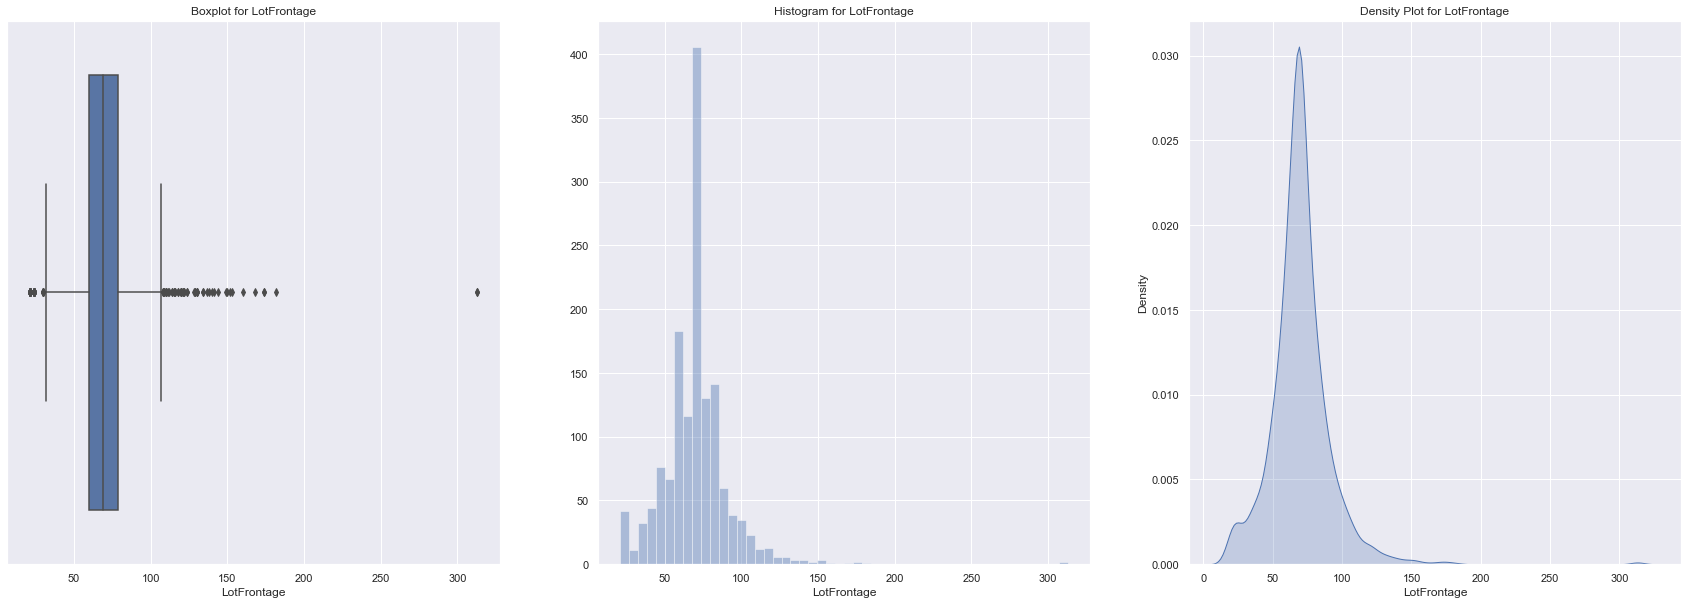

Data metrics for the column LotFrontage
count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

Skewness: 2.4091466665496006
Kurtosis: 21.91295419680548


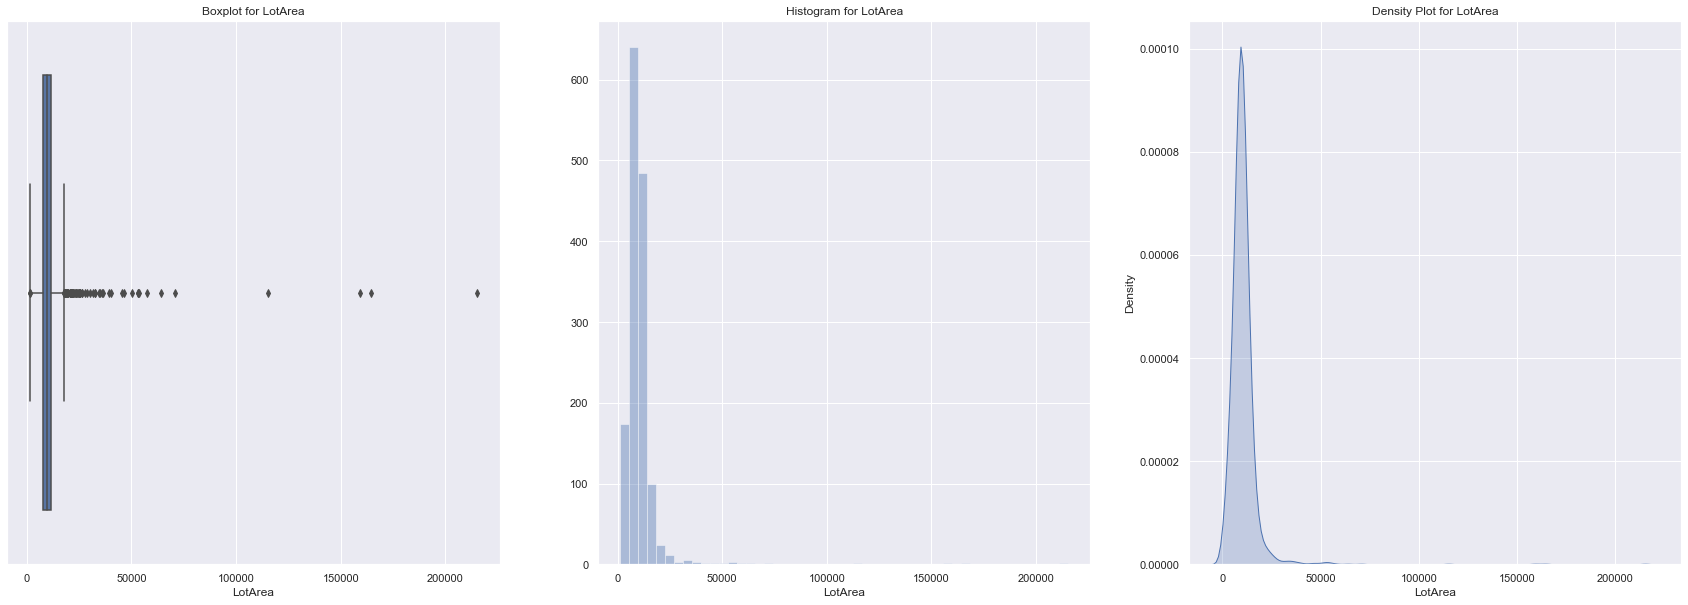

Data metrics for the column LotArea
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

Skewness: 12.207687851233496
Kurtosis: 203.24327101886033


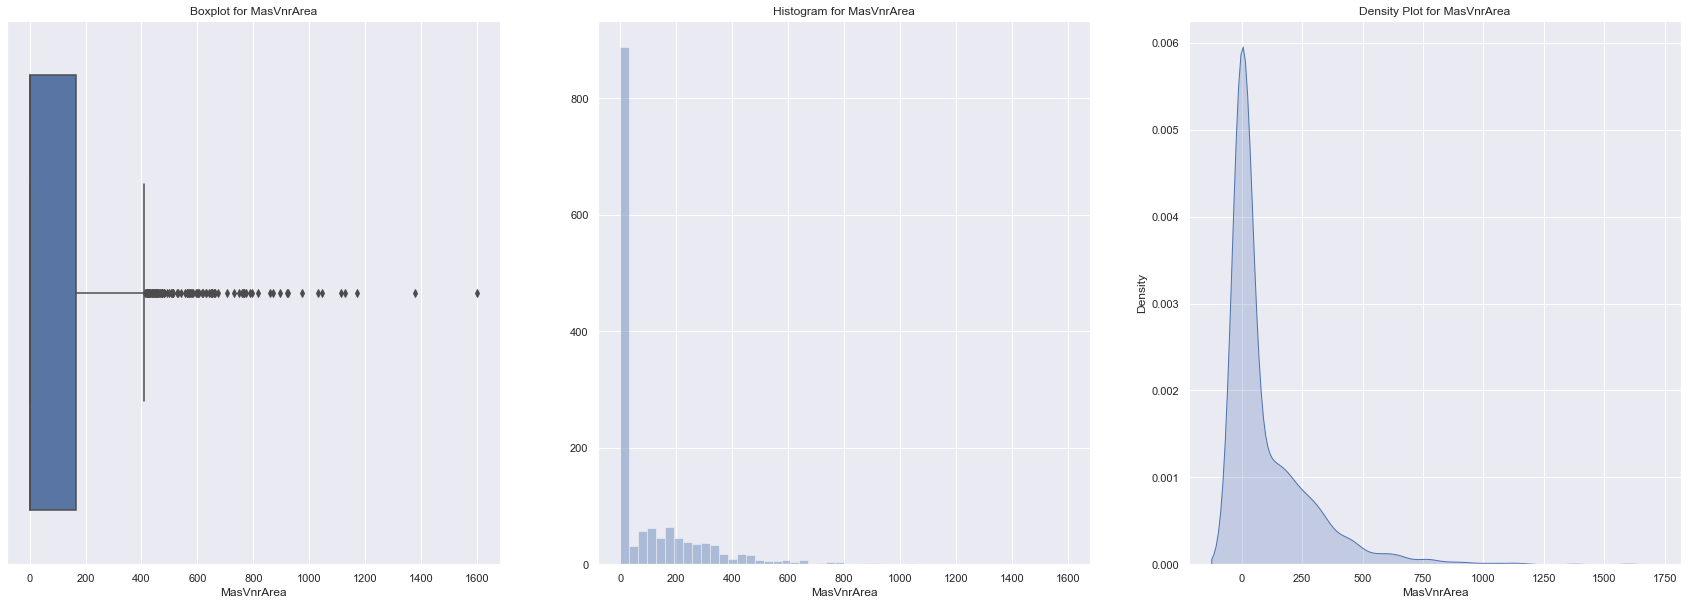

Data metrics for the column MasVnrArea
count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

Skewness: 2.6776164510820997
Kurtosis: 10.141416177298794


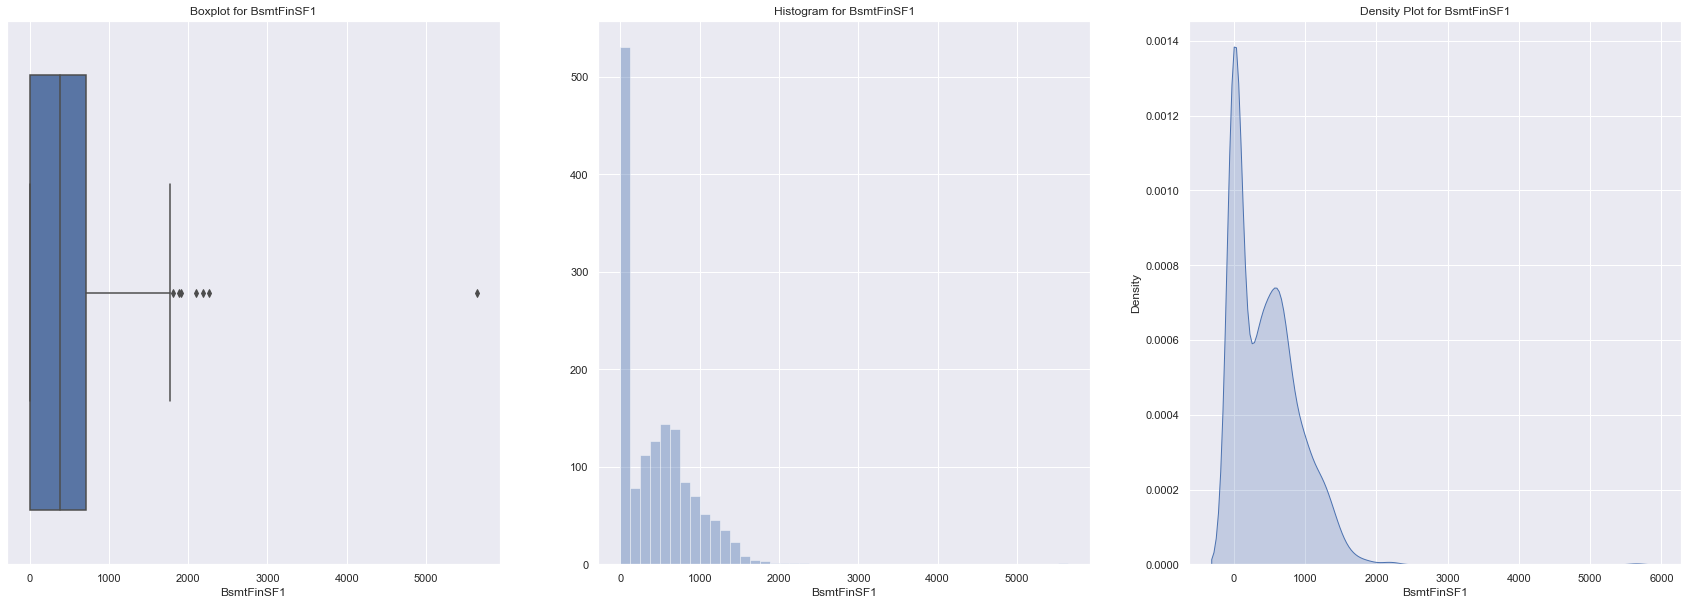

Data metrics for the column BsmtFinSF1
count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

Skewness: 1.685503071910789
Kurtosis: 11.118236291964712


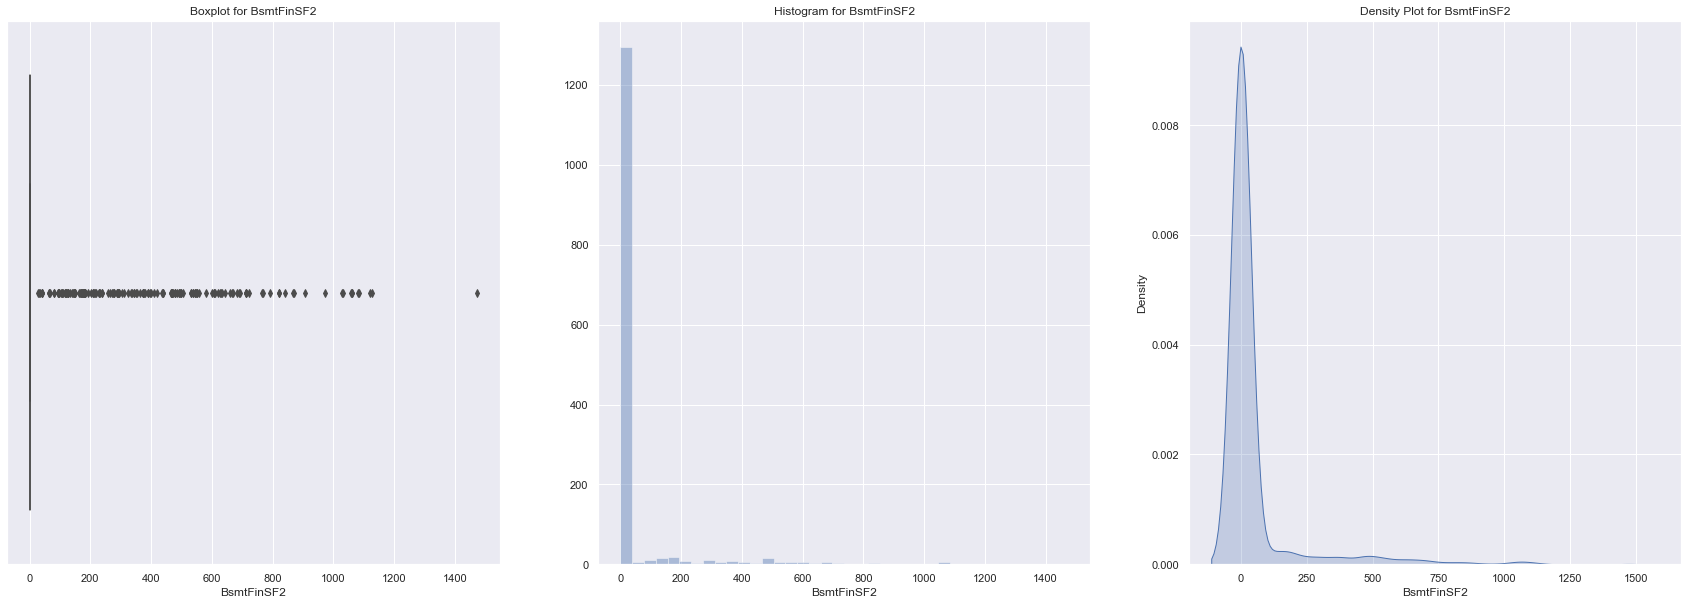

Data metrics for the column BsmtFinSF2
count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

Skewness: 4.255261108933303
Kurtosis: 20.11333754558646


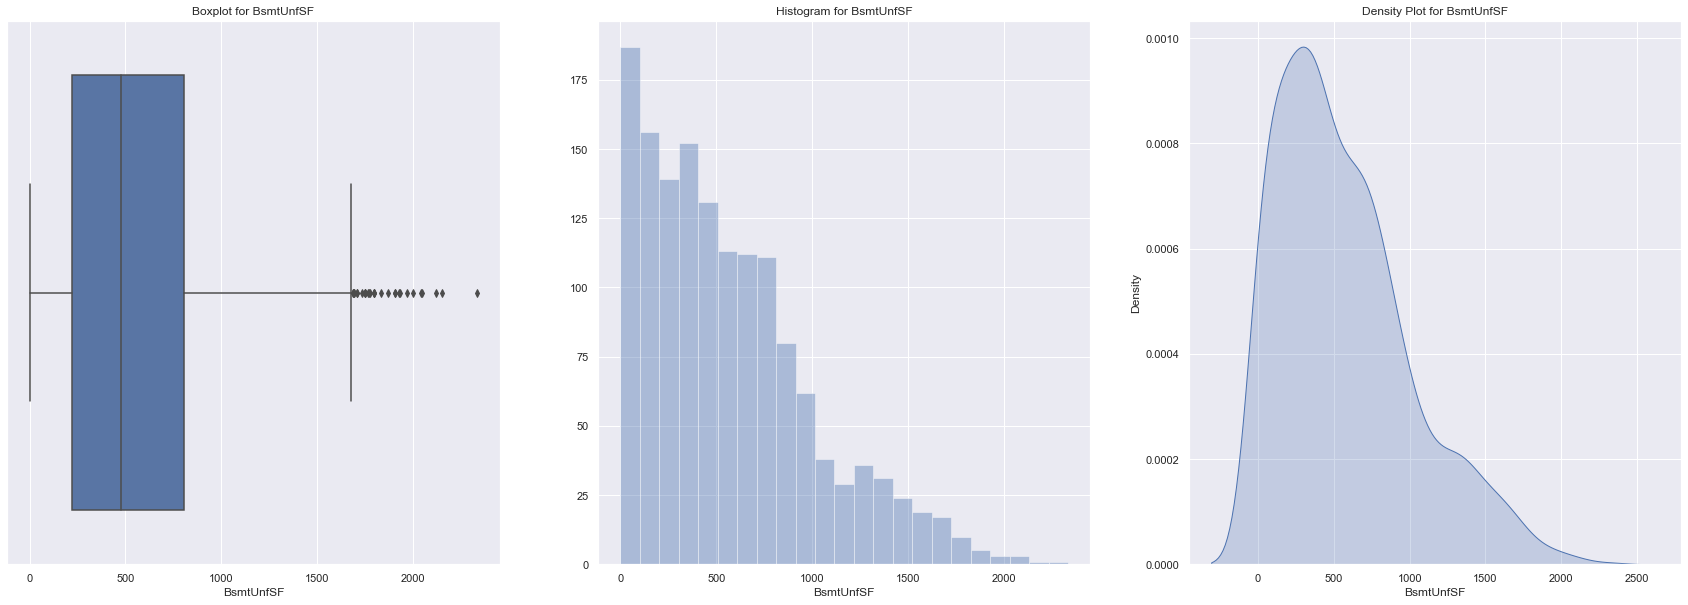

Data metrics for the column BsmtUnfSF
count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

Skewness: 0.9202684528039037
Kurtosis: 0.47499398780908475


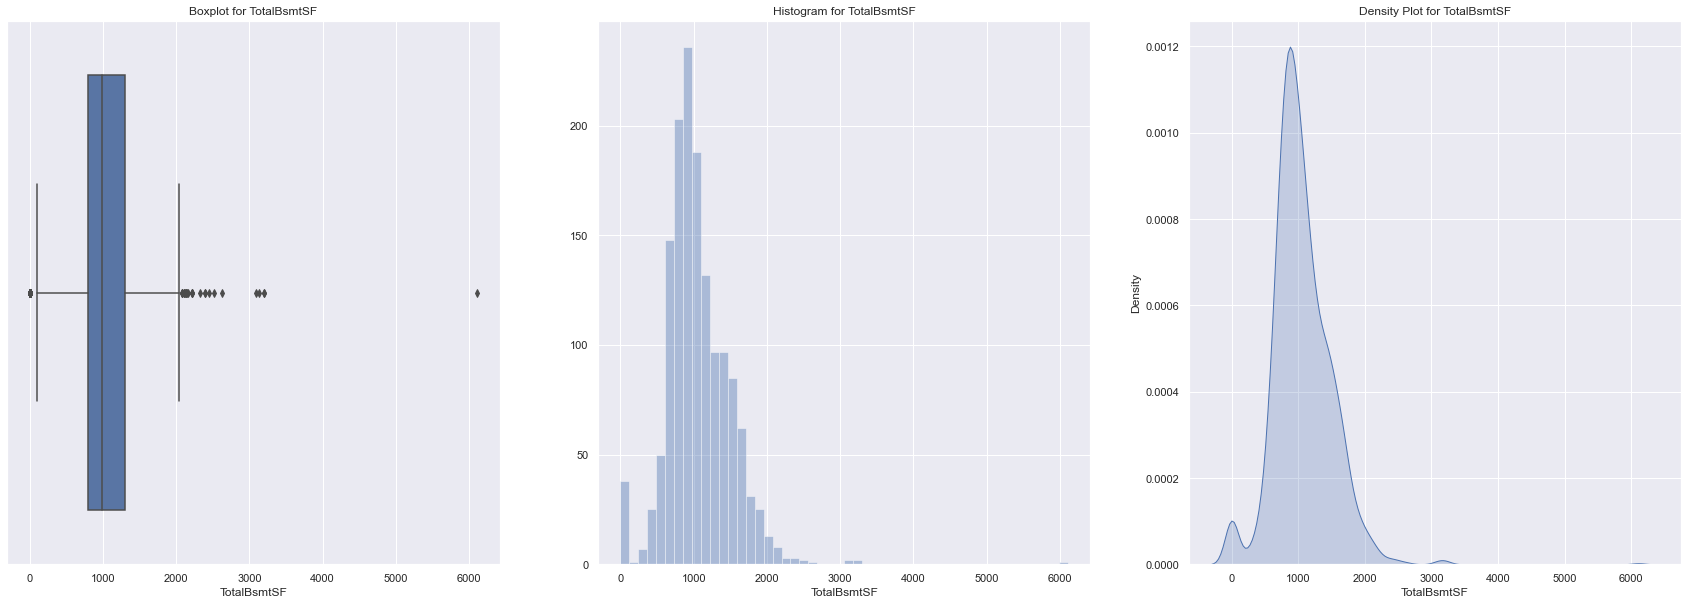

Data metrics for the column TotalBsmtSF
count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

Skewness: 1.5242545490627664
Kurtosis: 13.250483281984796


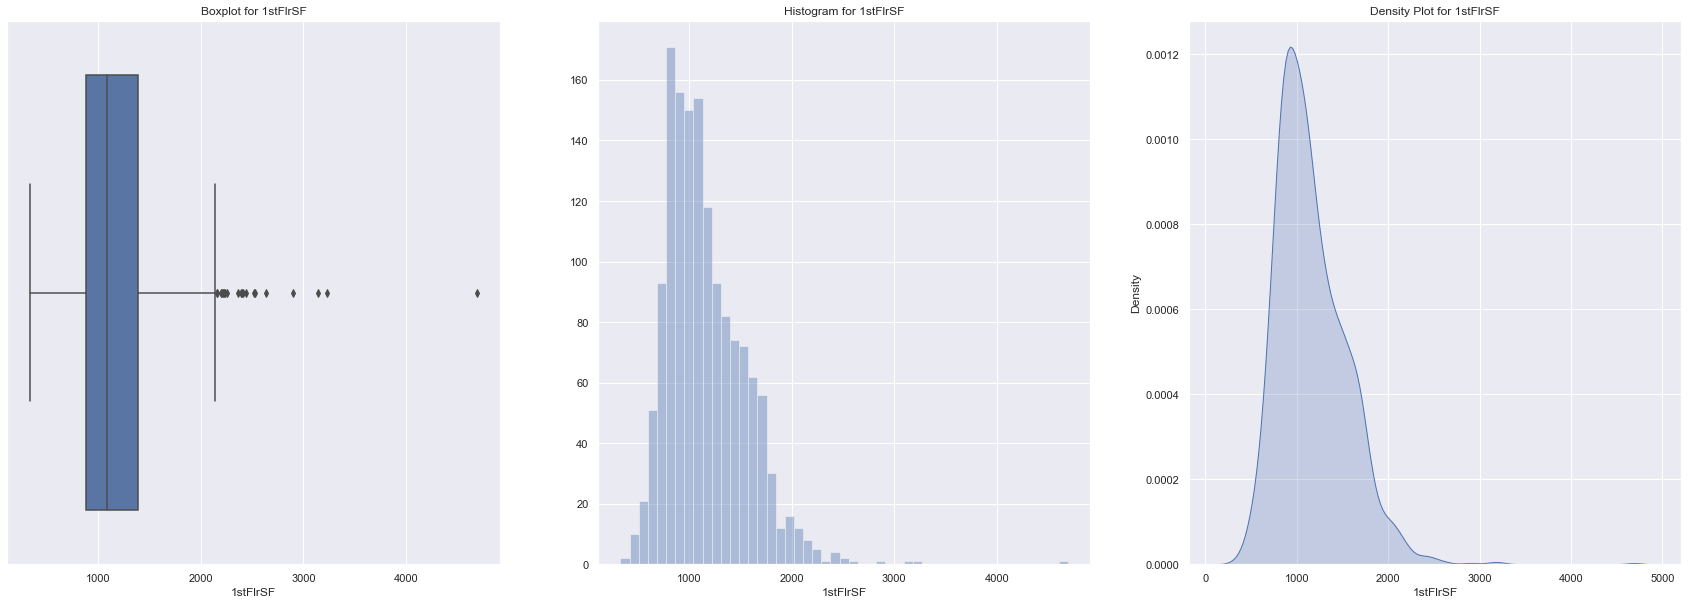

Data metrics for the column 1stFlrSF
count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

Skewness: 1.3767566220336365
Kurtosis: 5.74584148244079


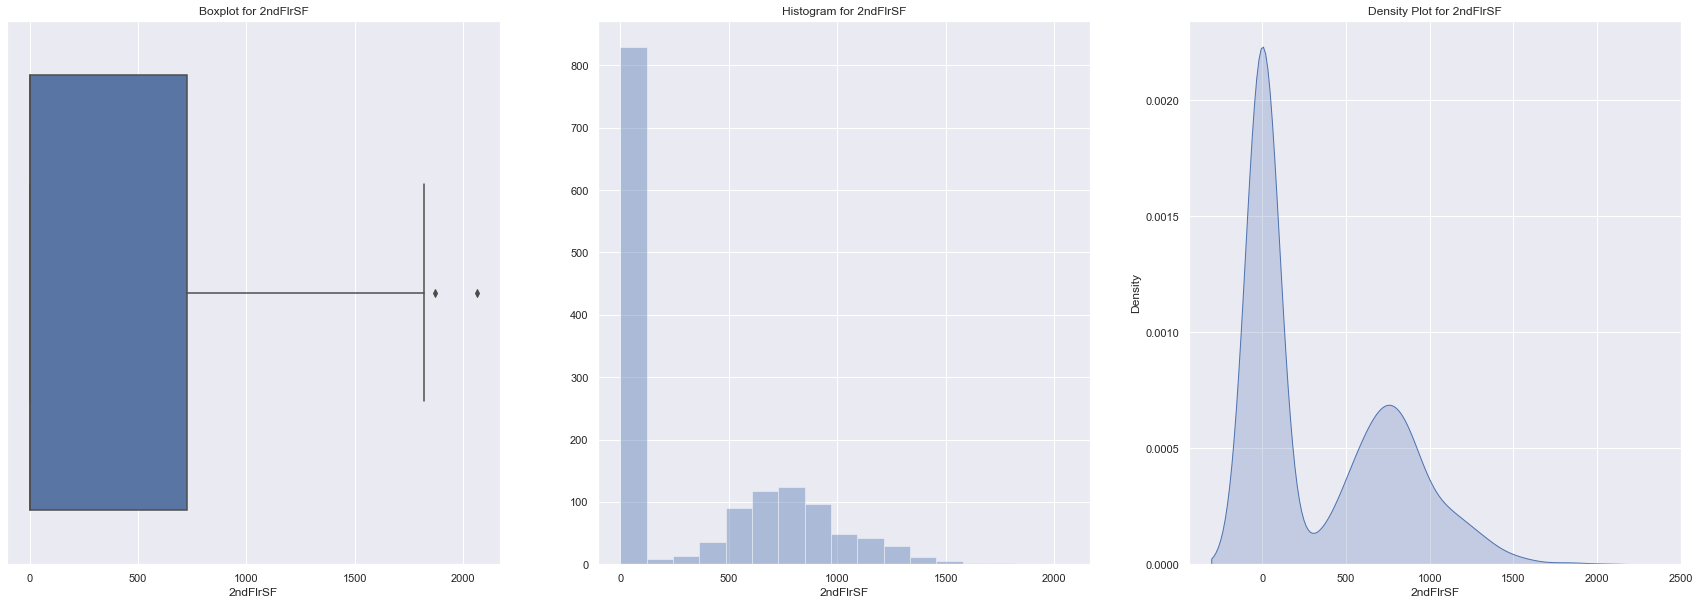

Data metrics for the column 2ndFlrSF
count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

Skewness: 0.8130298163023265
Kurtosis: -0.5534635576075795


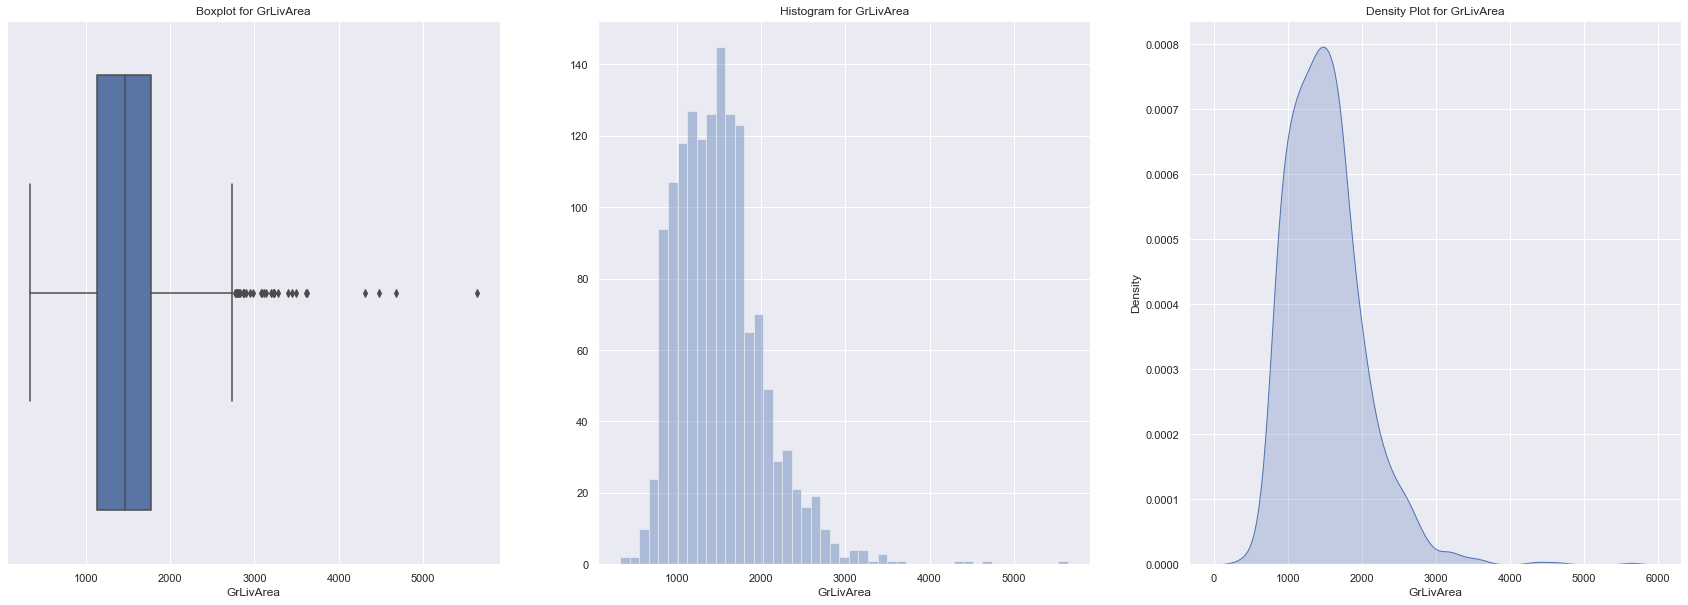

Data metrics for the column GrLivArea
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

Skewness: 1.3665603560164552
Kurtosis: 4.895120580693174


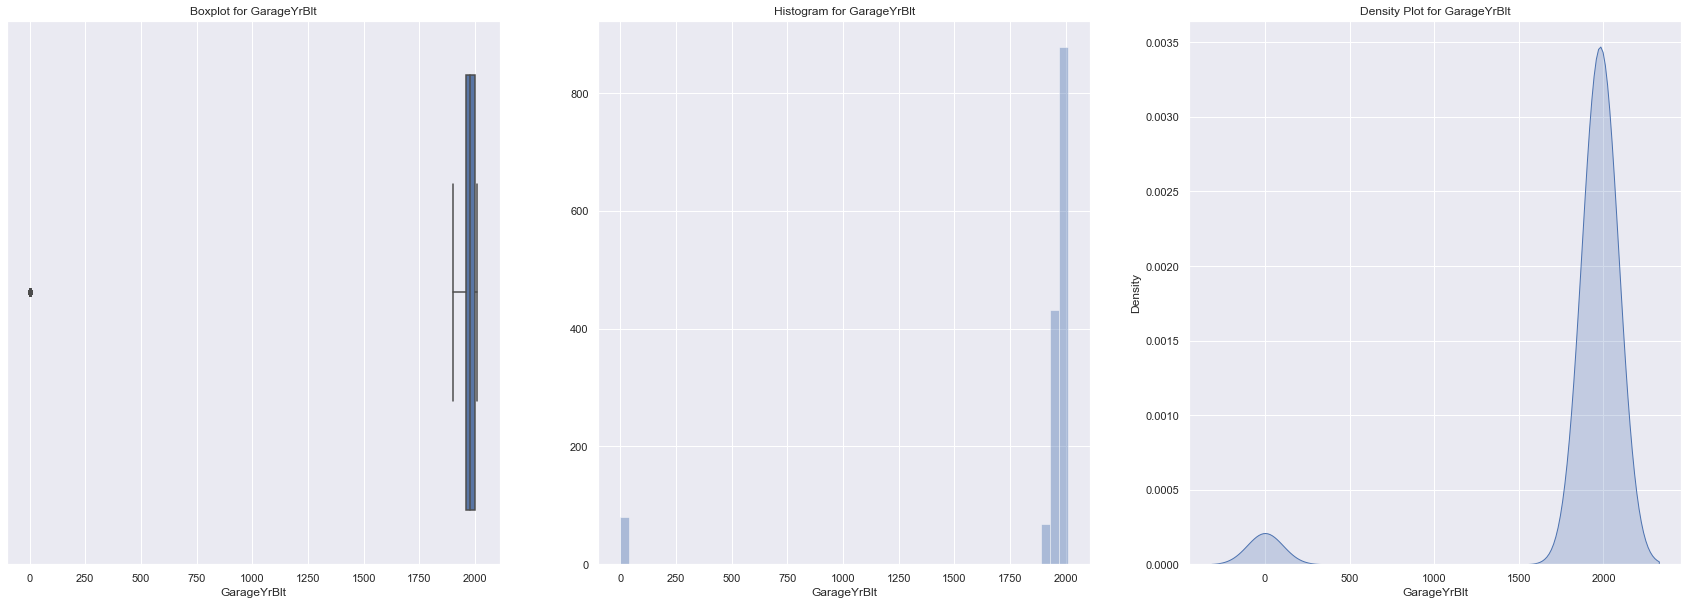

Data metrics for the column GarageYrBlt
count    1460.000000
mean     1868.739726
std       453.697295
min         0.000000
25%      1958.000000
50%      1977.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

Skewness: -3.869500821637888
Kurtosis: 13.043225677382697


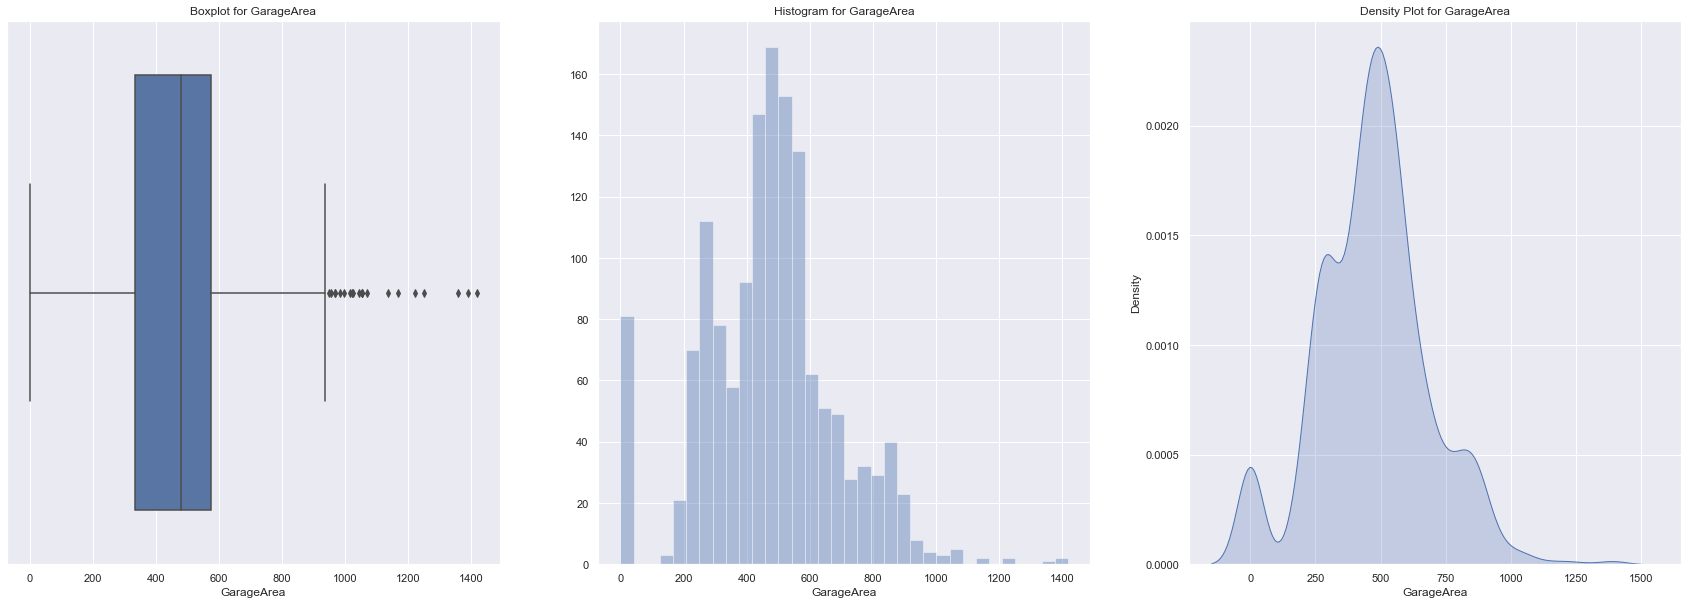

Data metrics for the column GarageArea
count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

Skewness: 0.17998090674623907
Kurtosis: 0.9170672022708684


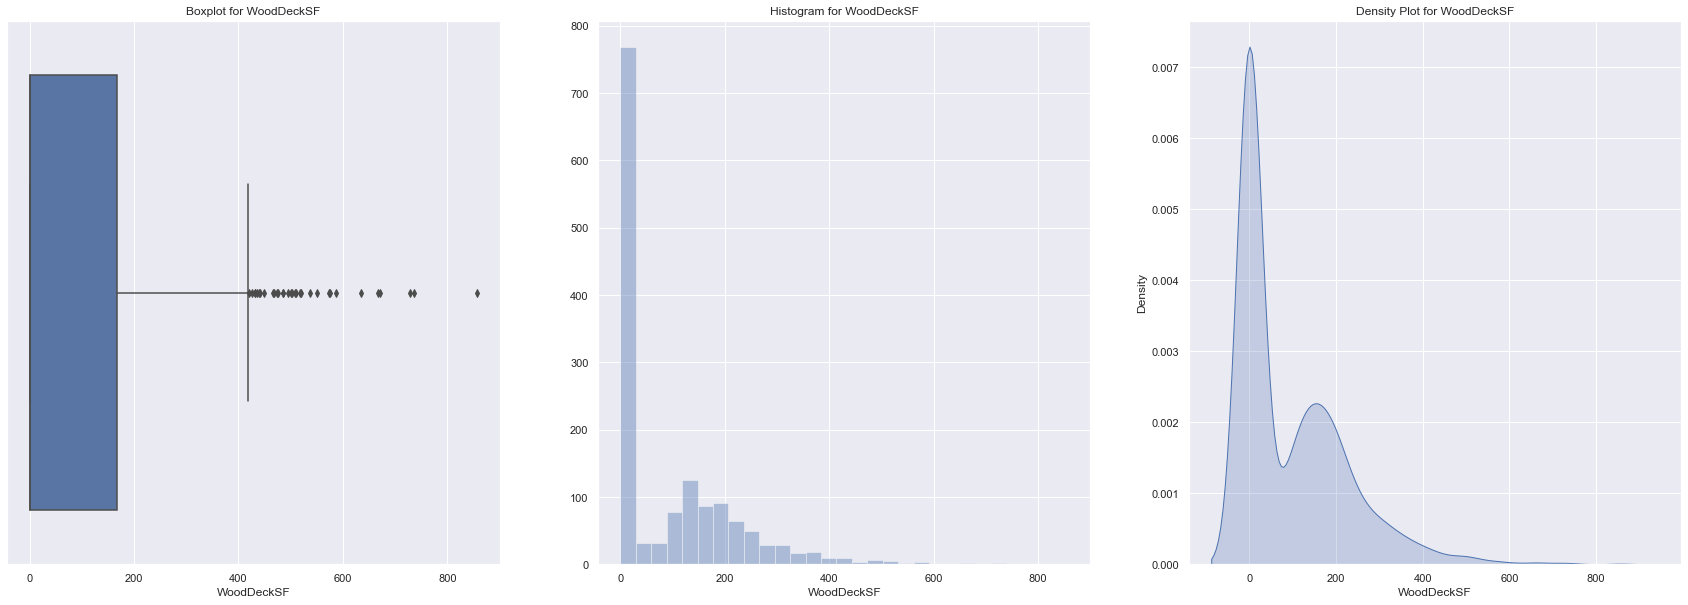

Data metrics for the column WoodDeckSF
count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64

Skewness: 1.5413757571931312
Kurtosis: 2.992950924703908


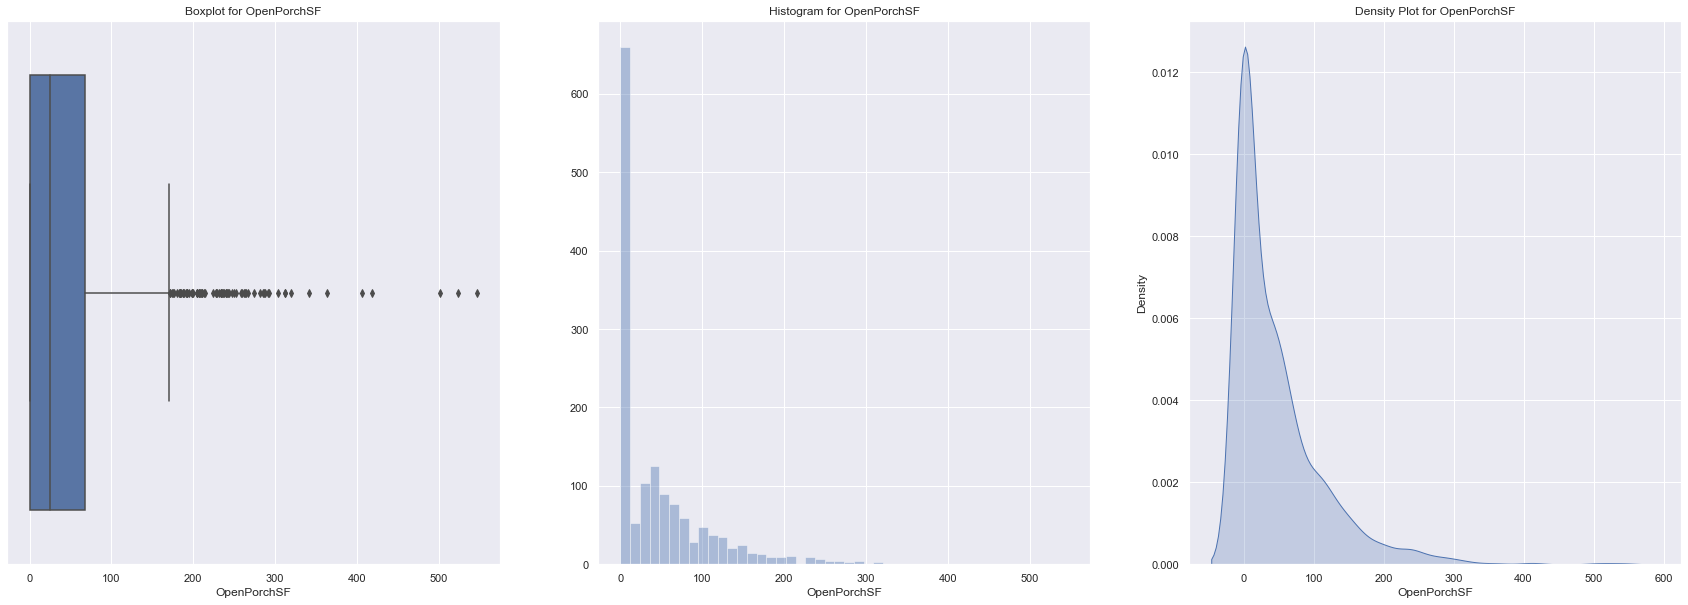

Data metrics for the column OpenPorchSF
count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64

Skewness: 2.3643417403694404
Kurtosis: 8.490335805910506


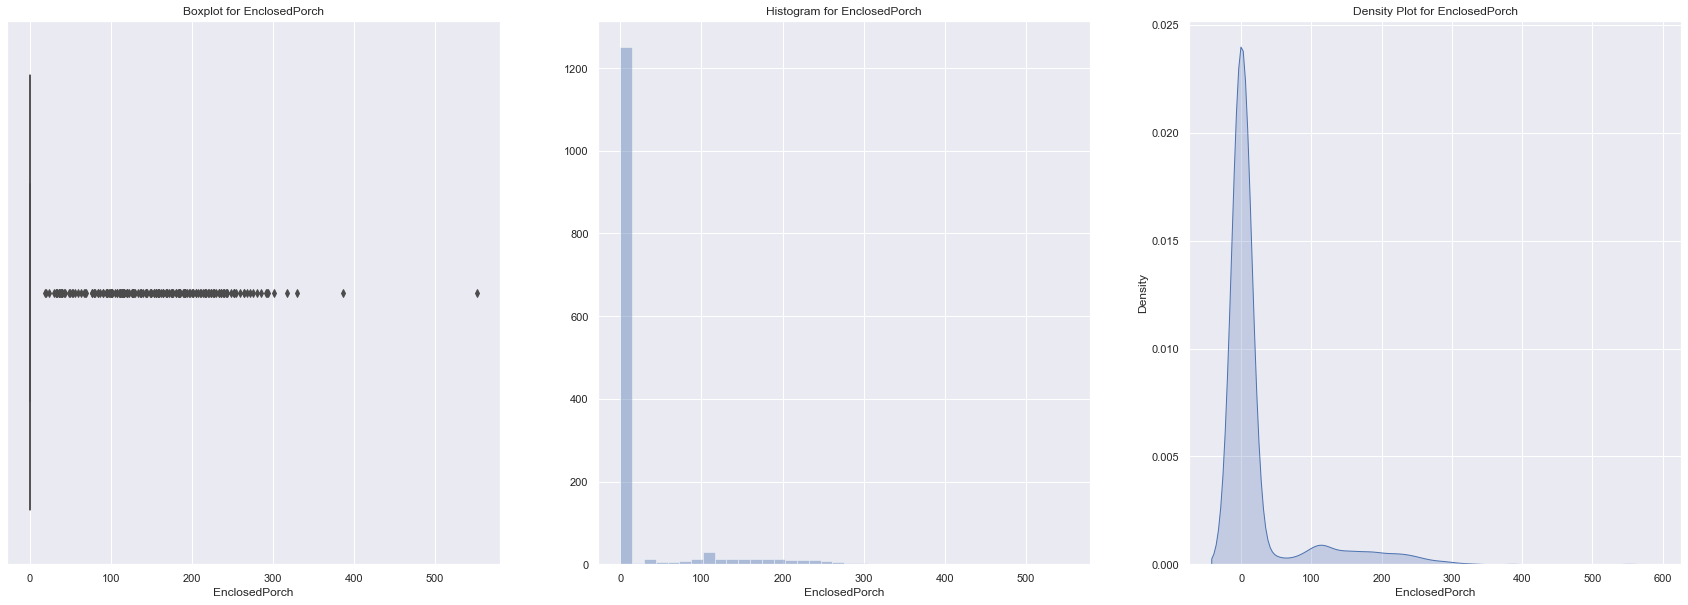

Data metrics for the column EnclosedPorch
count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64

Skewness: 3.08987190371177
Kurtosis: 10.430765944030428


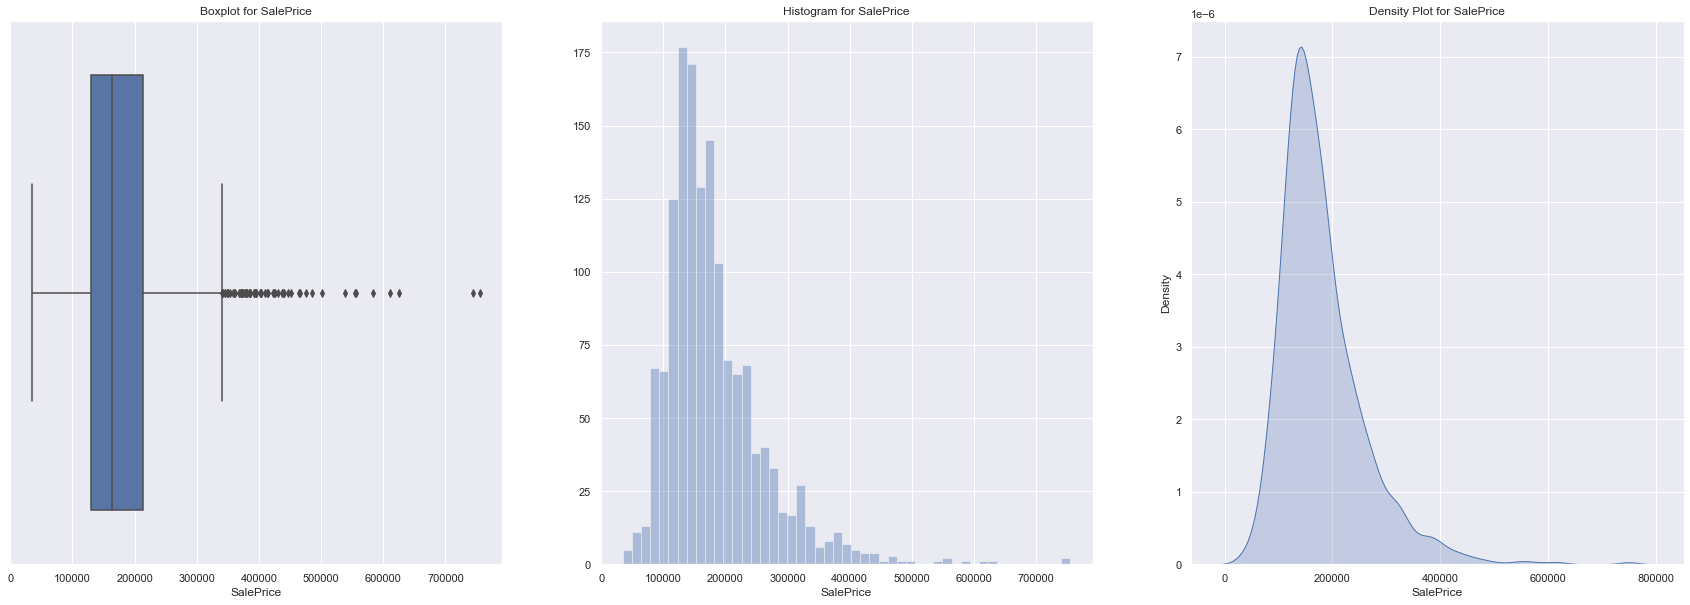

Data metrics for the column SalePrice
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


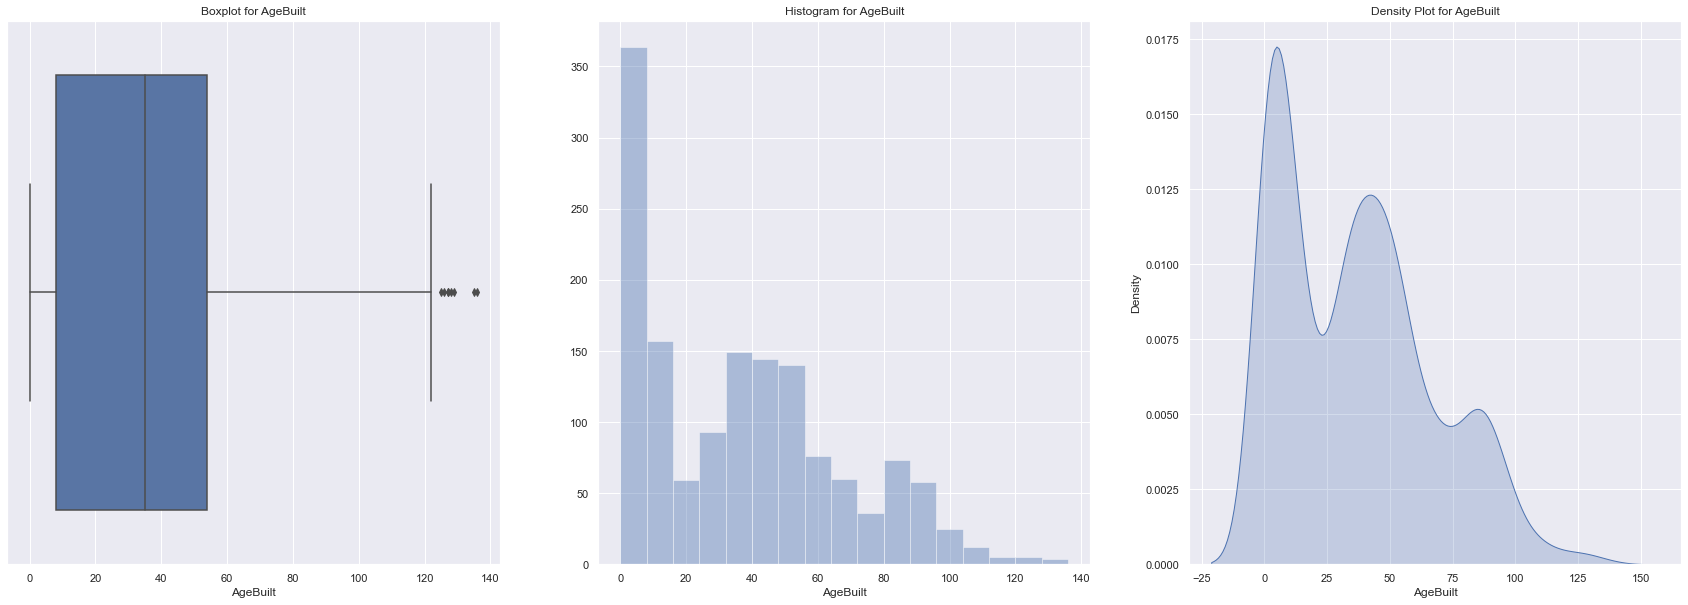

Data metrics for the column AgeBuilt
count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: AgeBuilt, dtype: float64

Skewness: 0.609030229450241
Kurtosis: -0.43682934062758916


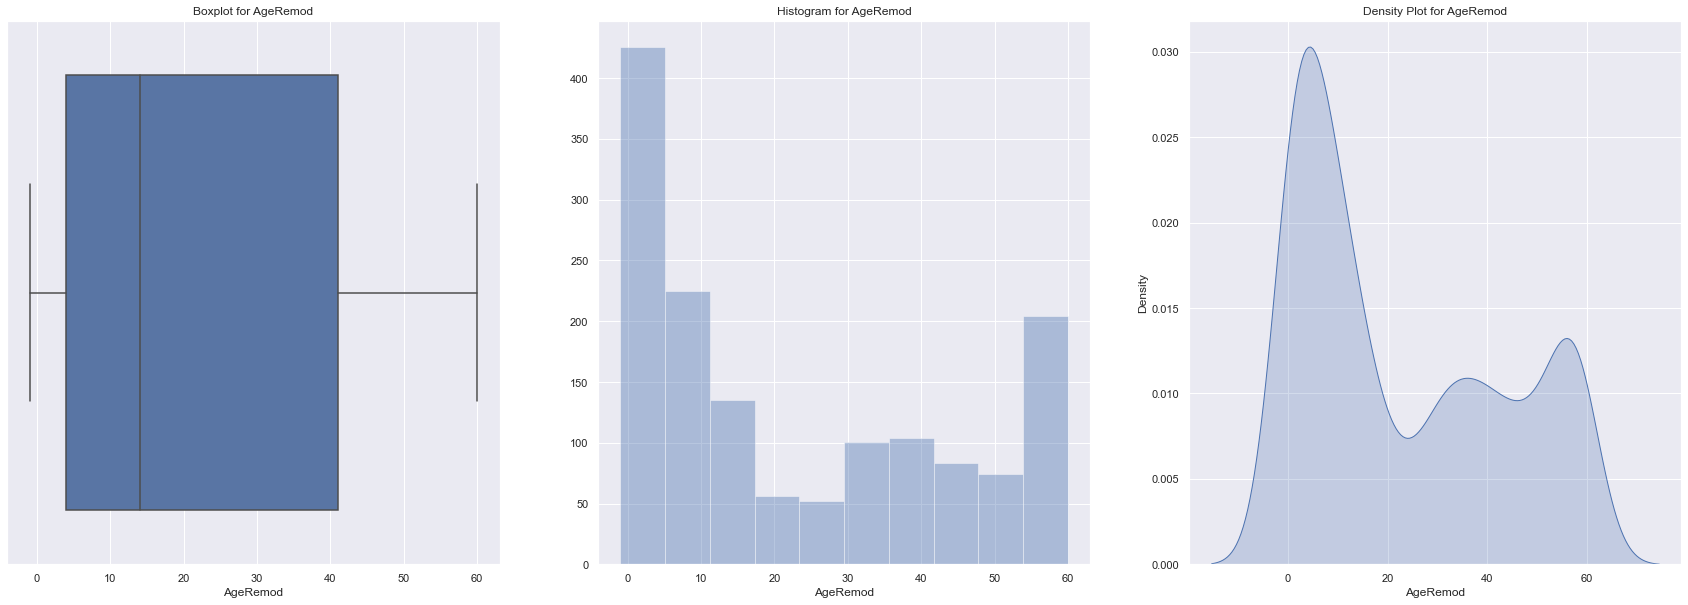

Data metrics for the column AgeRemod
count    1460.000000
mean       22.950000
std        20.640653
min        -1.000000
25%         4.000000
50%        14.000000
75%        41.000000
max        60.000000
Name: AgeRemod, dtype: float64

Skewness: 0.5024890321999378
Kurtosis: -1.2660279973332127


In [30]:
for col in cont_cols:
    plot_box_and_dist(housing_data,col)

In [31]:
print("Findings")
print("Univariate Analysis on Continuous Variables:")

# Iterate through each continuous column
for col in cont_cols:
    # Calculate mean and median
    col_mean = housing_data[col].mean()
    col_median = housing_data[col].median()
    
    # Print the findings
    print(f"{col} - Mean: {round(col_mean, 2)}, Median: {col_median}")


Findings
Univariate Analysis on Continuous Variables:
LotFrontage - Mean: 69.86, Median: 69.0
LotArea - Mean: 10516.83, Median: 9478.5
MasVnrArea - Mean: 103.12, Median: 0.0
BsmtFinSF1 - Mean: 443.64, Median: 383.5
BsmtFinSF2 - Mean: 46.55, Median: 0.0
BsmtUnfSF - Mean: 567.24, Median: 477.5
TotalBsmtSF - Mean: 1057.43, Median: 991.5
1stFlrSF - Mean: 1162.63, Median: 1087.0
2ndFlrSF - Mean: 346.99, Median: 0.0
GrLivArea - Mean: 1515.46, Median: 1464.0
GarageYrBlt - Mean: 1868.74, Median: 1977.0
GarageArea - Mean: 472.98, Median: 480.0
WoodDeckSF - Mean: 94.24, Median: 0.0
OpenPorchSF - Mean: 46.66, Median: 25.0
EnclosedPorch - Mean: 21.95, Median: 0.0
SalePrice - Mean: 180921.2, Median: 163000.0
AgeBuilt - Mean: 36.55, Median: 35.0
AgeRemod - Mean: 22.95, Median: 14.0


In [32]:
def plot_count(df, col):
    plt.figure(figsize=(15, 5))
    sns.countplot(data=df, x=col, order=sorted(df[col].unique()))
    plt.title("Countplot for " + col)
    plt.xticks(rotation=90)
    plt.show()
    
    # Print value counts
    print(df[col].value_counts())

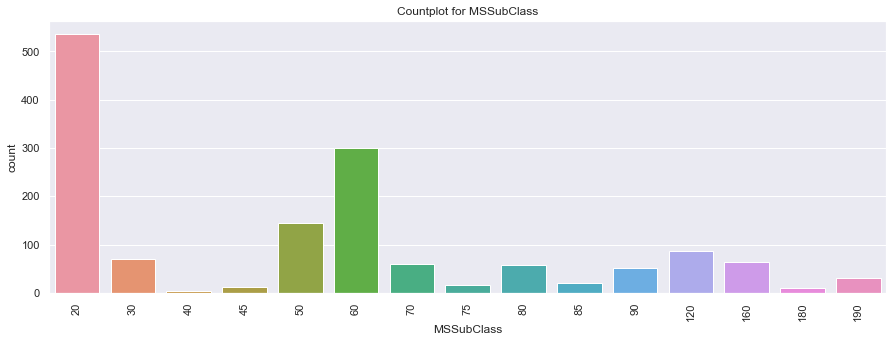

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


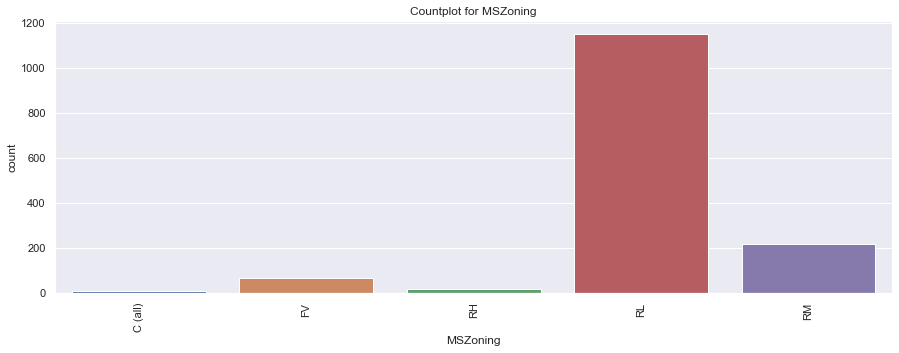

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


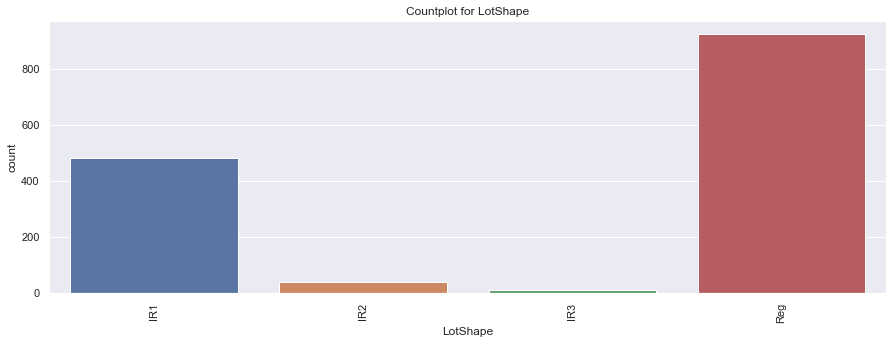

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


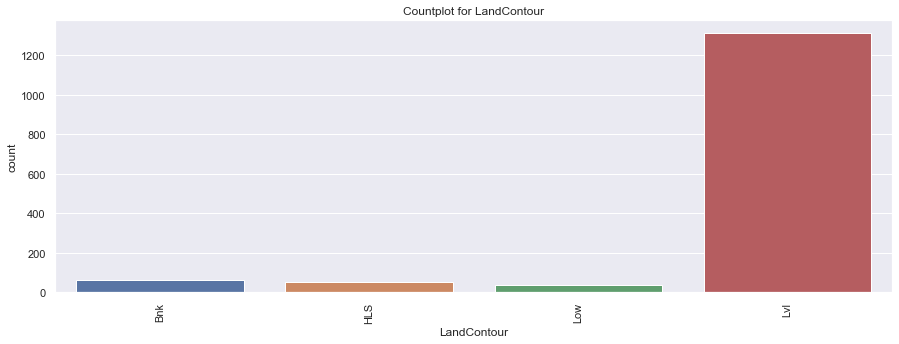

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


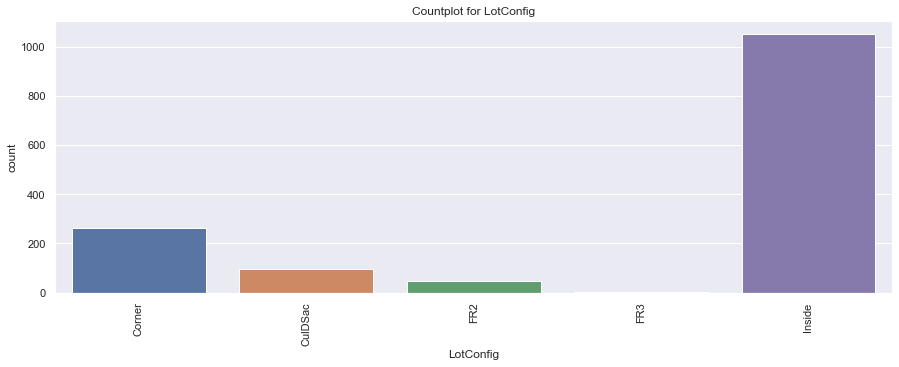

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


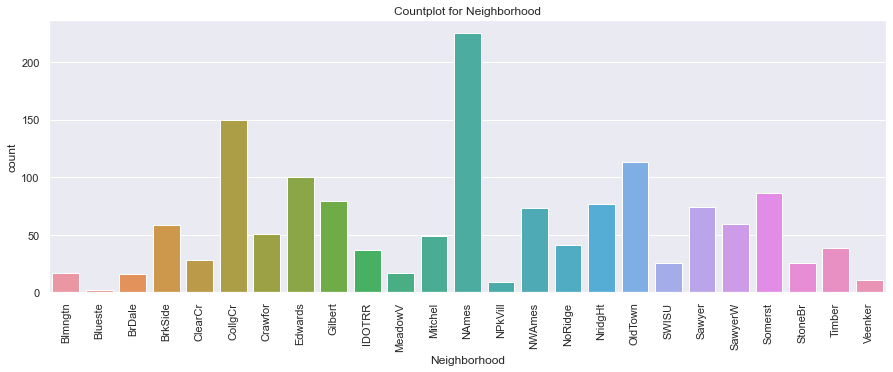

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


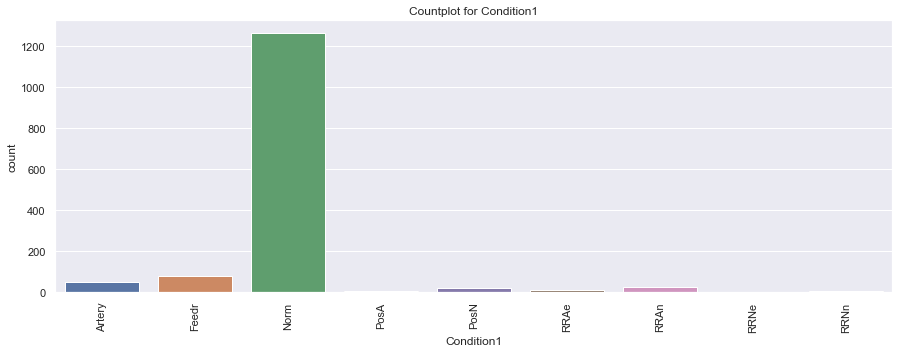

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


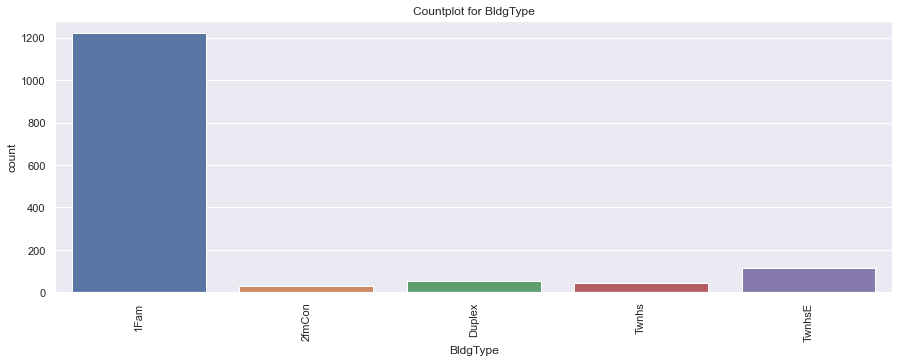

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


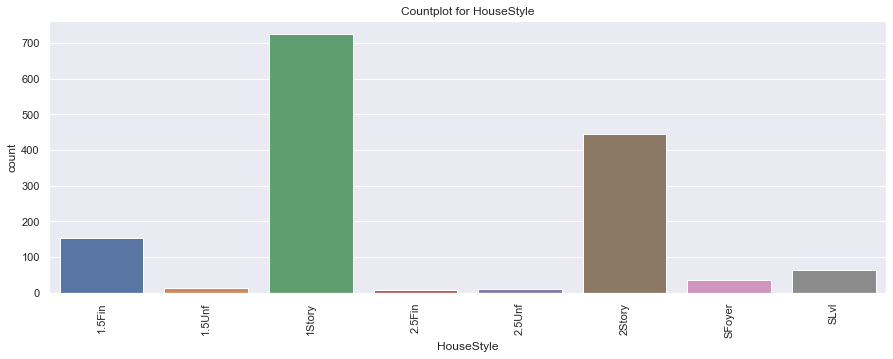

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


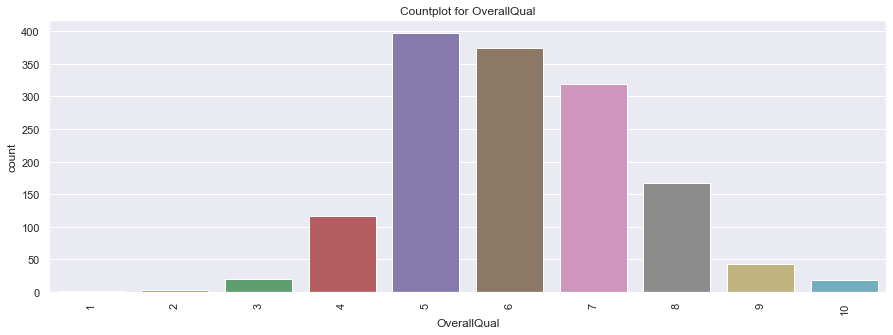

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


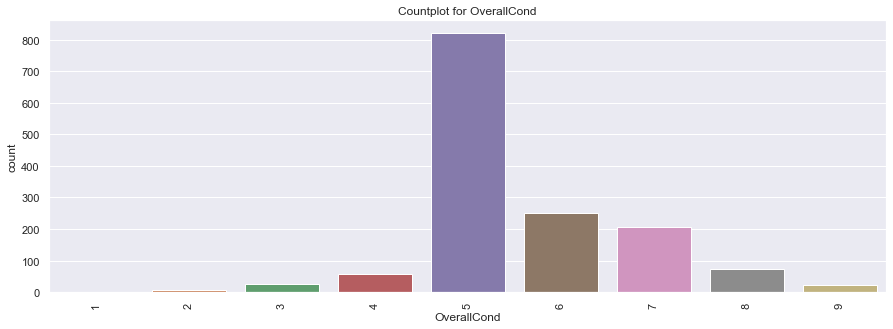

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64


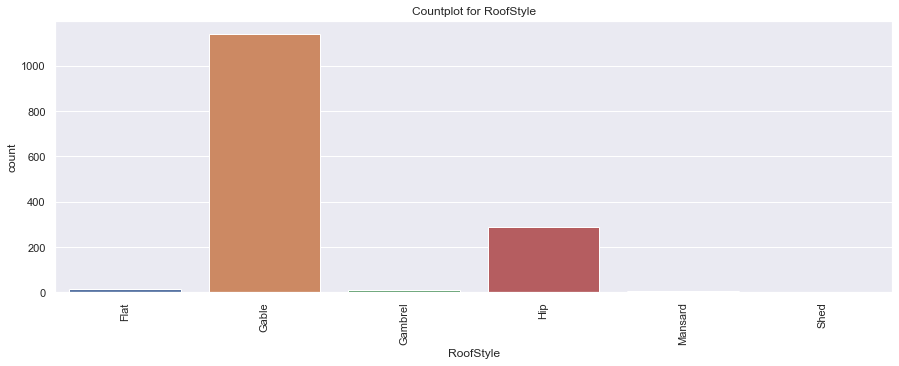

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64


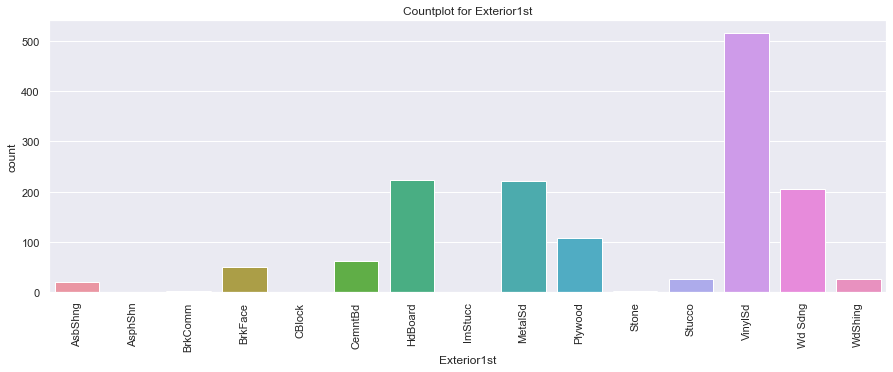

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64


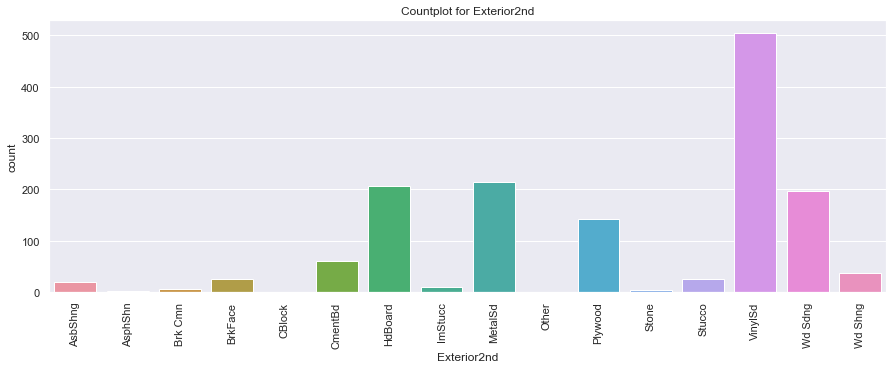

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64


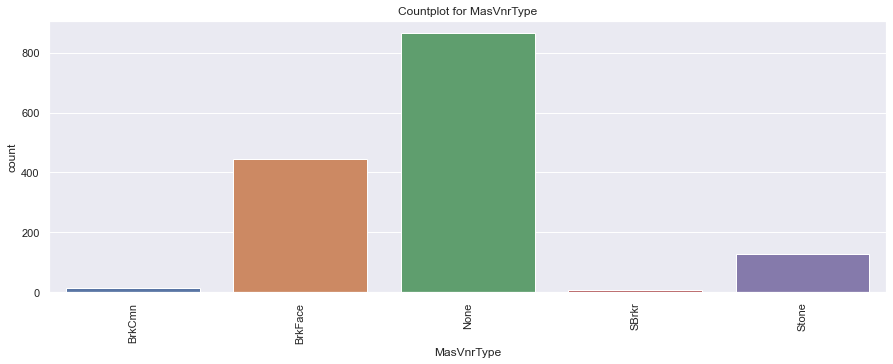

None       864
BrkFace    445
Stone      128
BrkCmn      15
SBrkr        8
Name: MasVnrType, dtype: int64


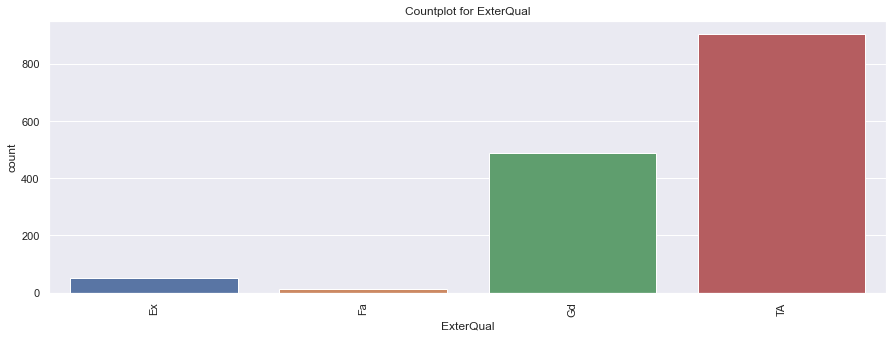

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64


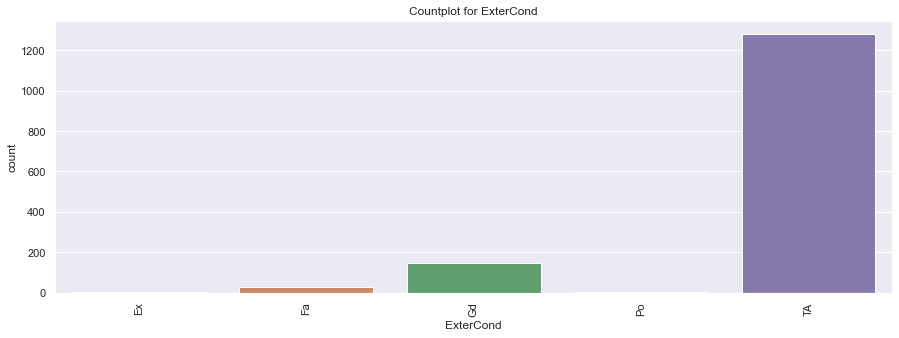

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64


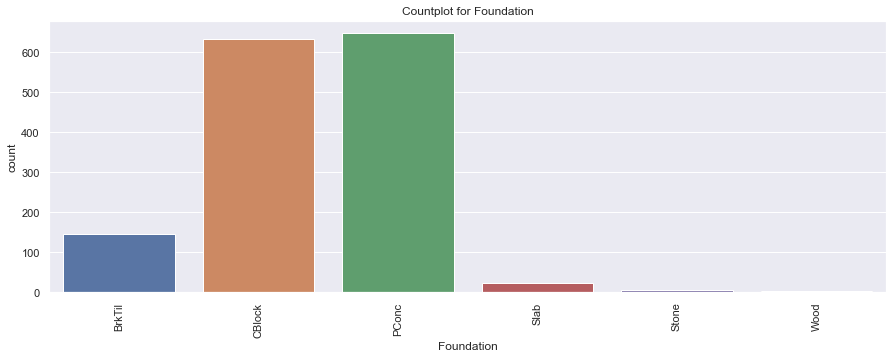

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


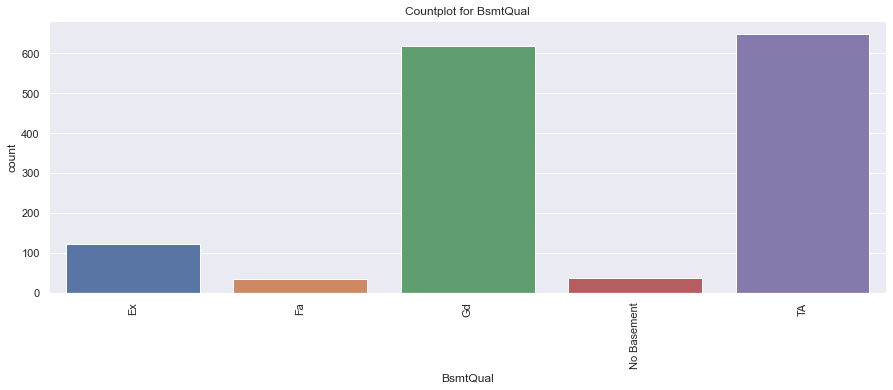

TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64


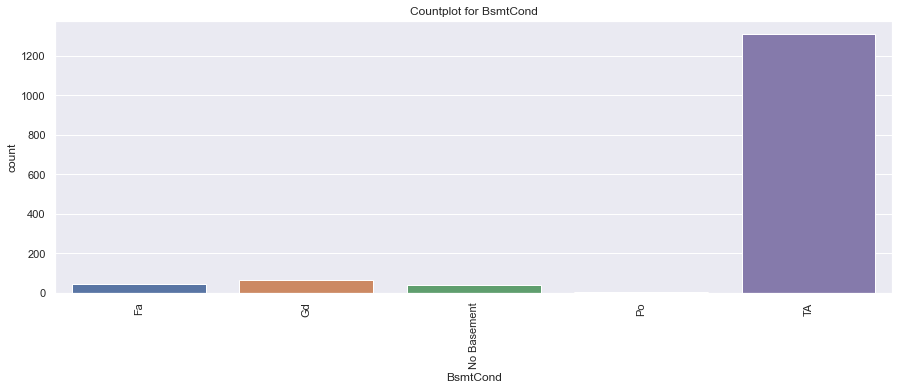

TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64


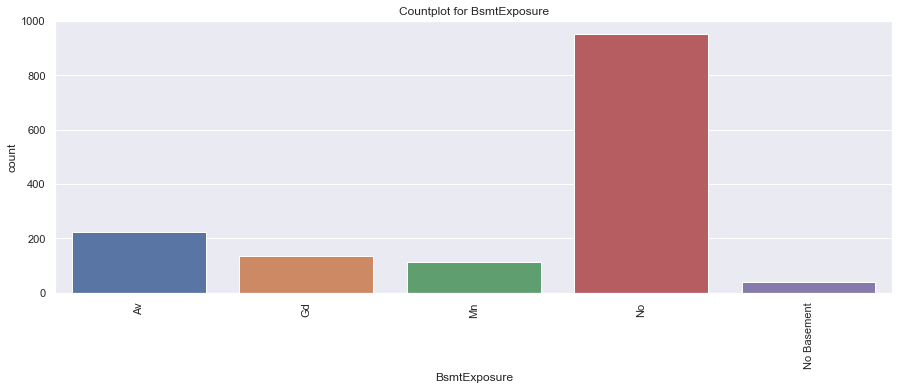

No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64


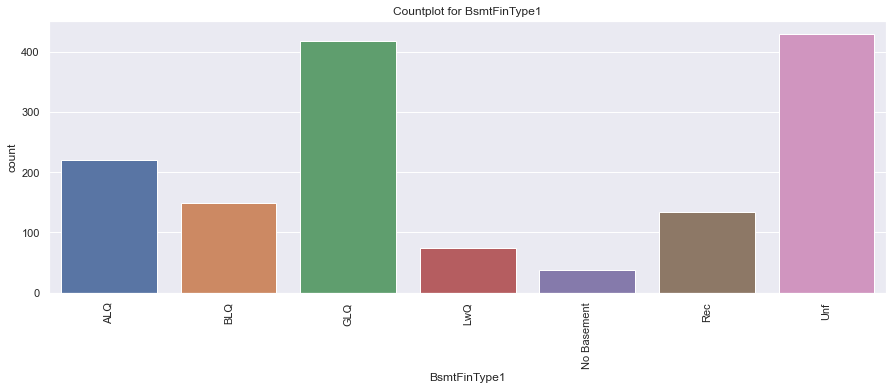

Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64


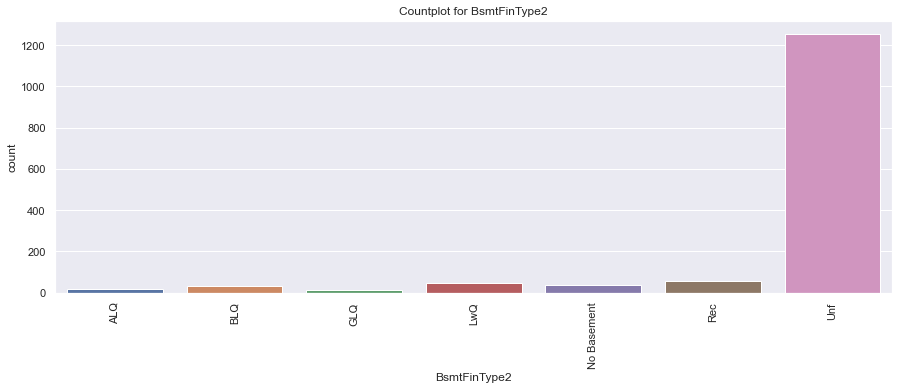

Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64


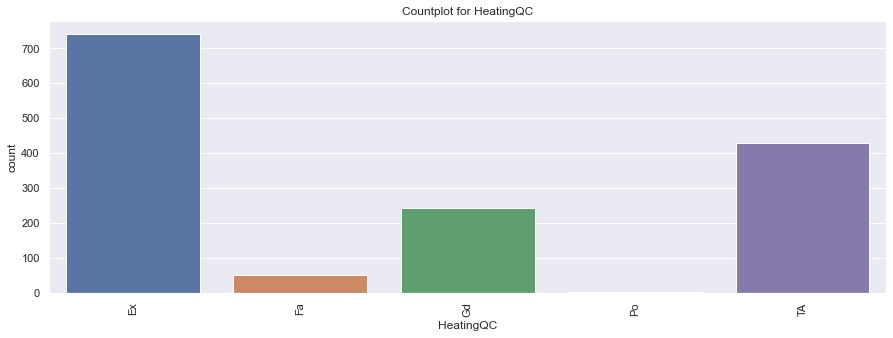

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64


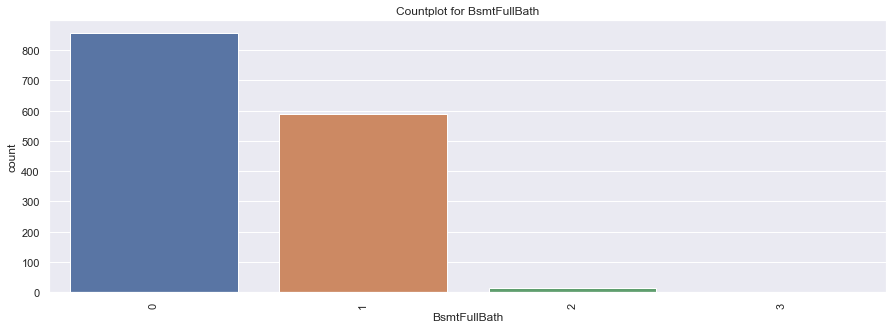

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64


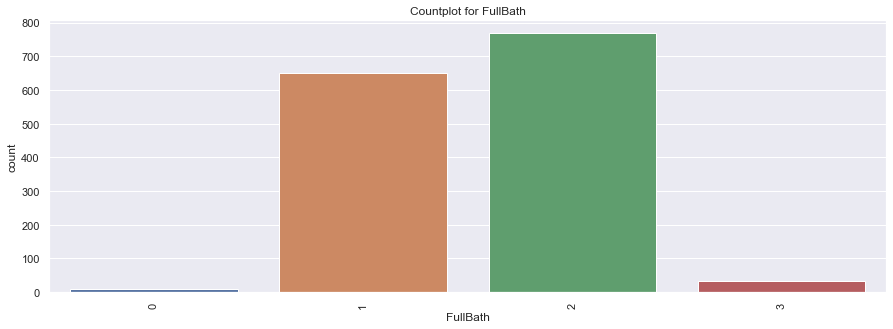

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64


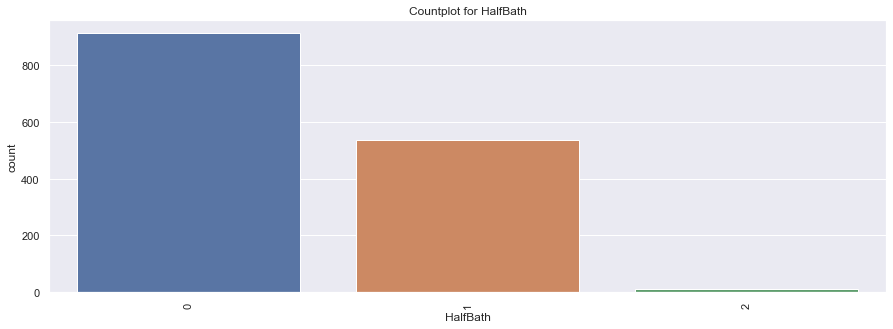

0    913
1    535
2     12
Name: HalfBath, dtype: int64


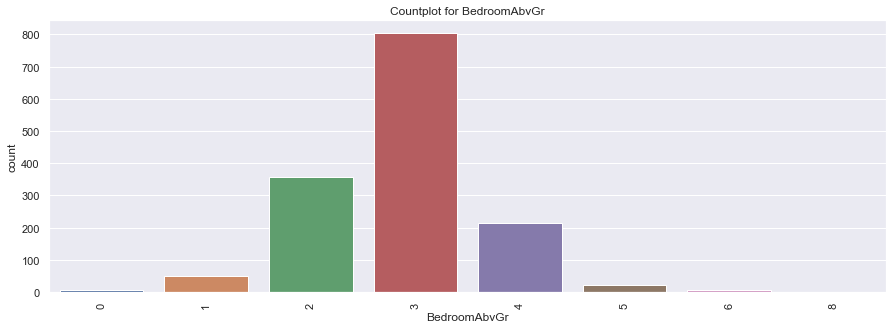

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64


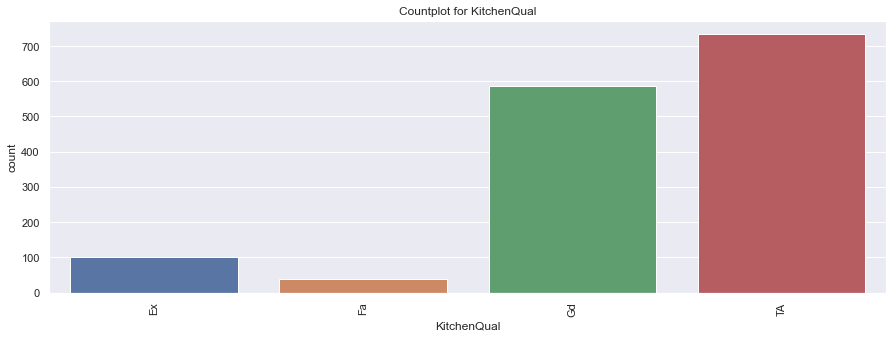

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64


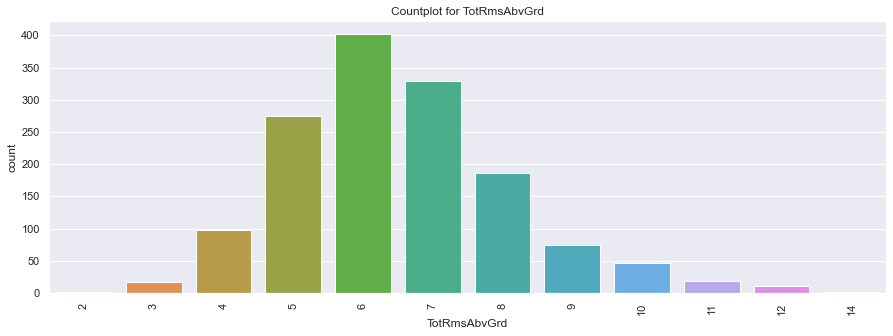

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64


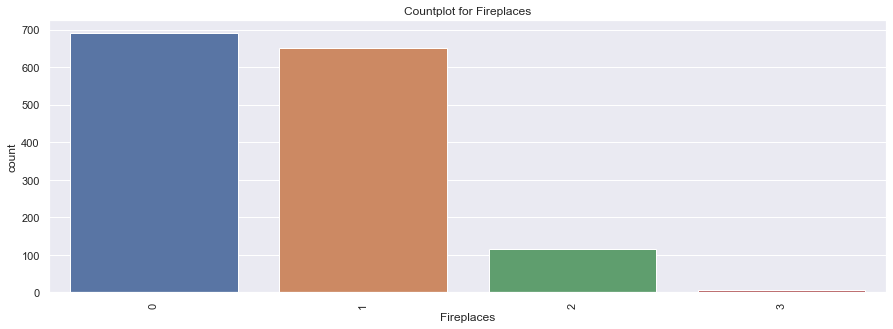

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64


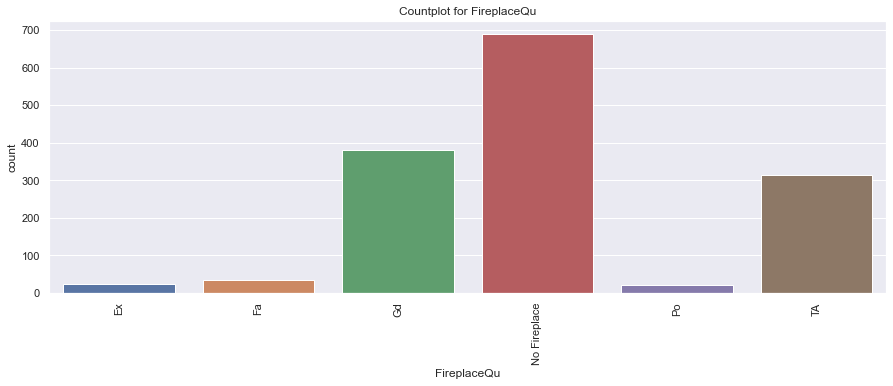

No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64


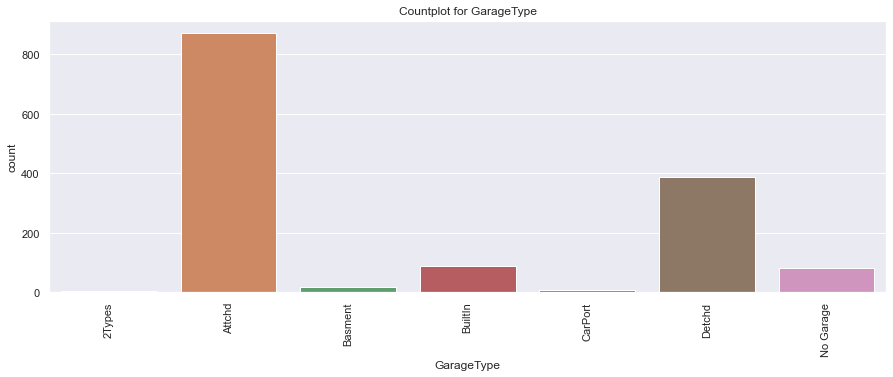

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64


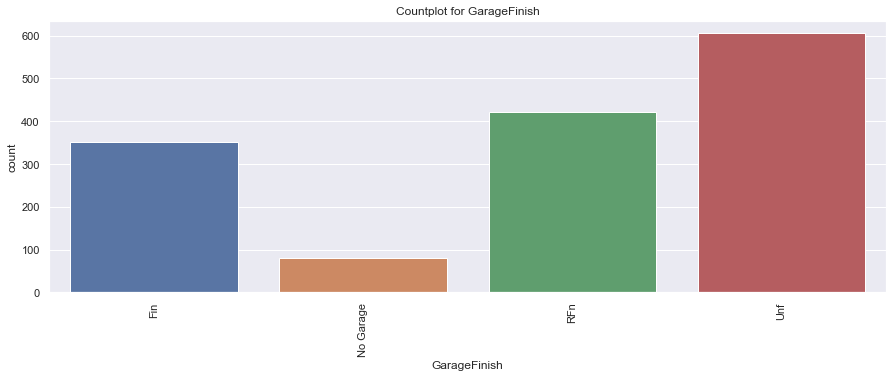

Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64


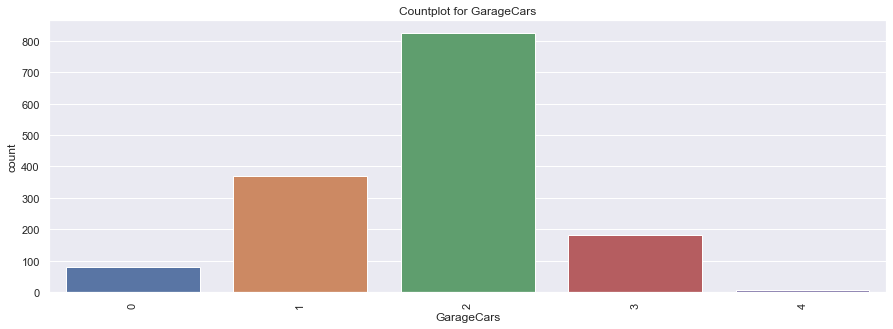

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64


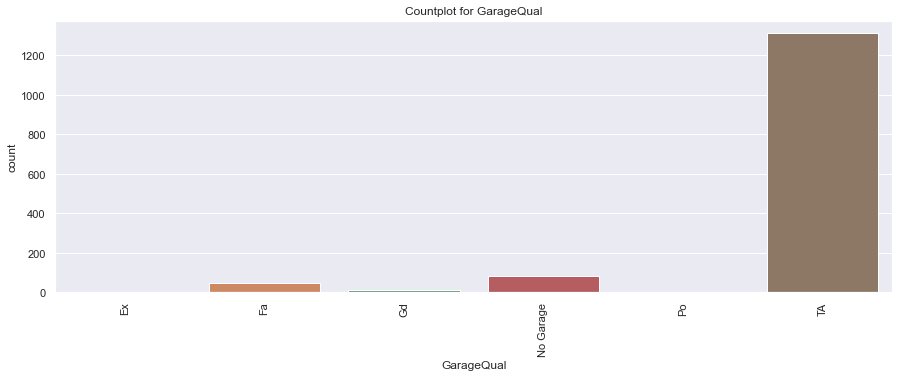

TA           1311
No Garage      81
Fa             48
Gd             14
Ex              3
Po              3
Name: GarageQual, dtype: int64


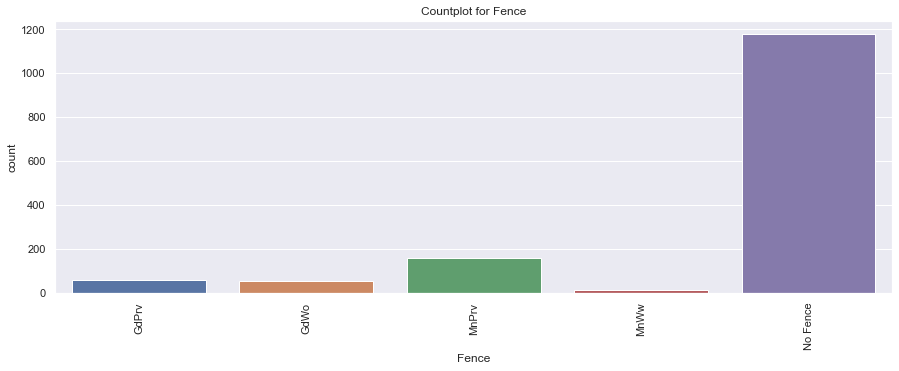

No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64


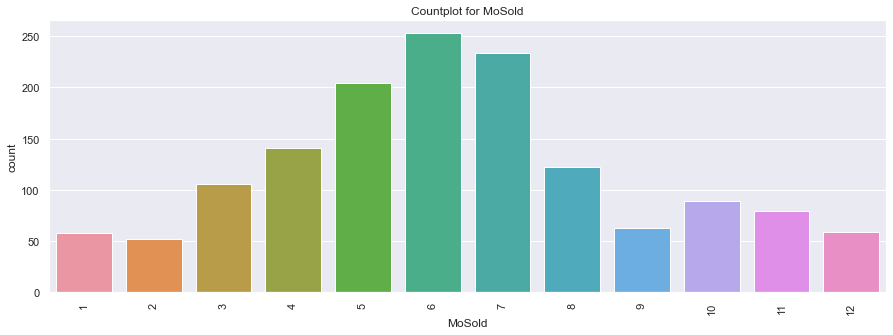

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64


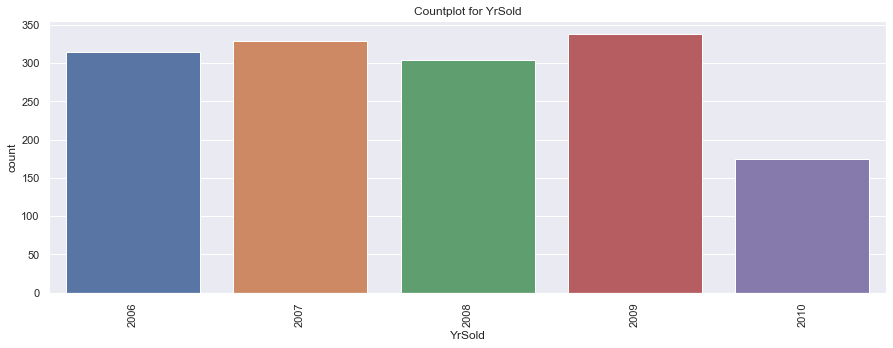

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64


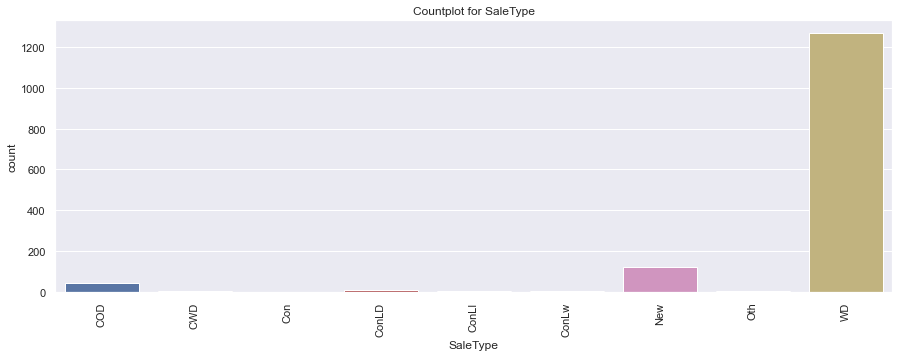

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


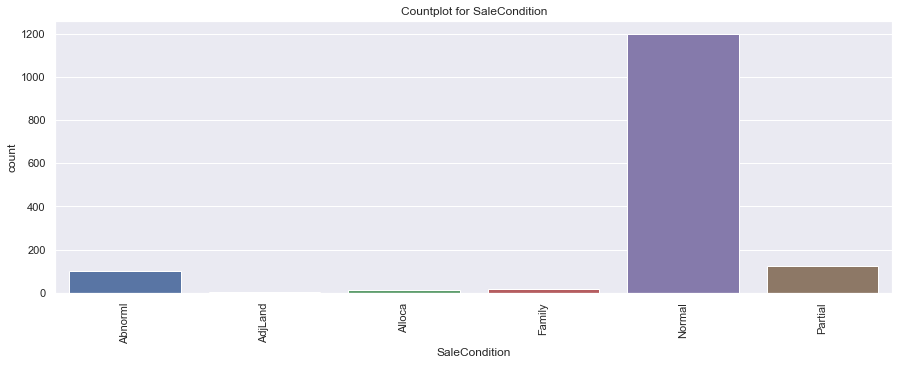

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


In [33]:
for col in cat_cols:
    plot_count(housing_data,col)

In [34]:
print("Findings")
print("Univariate Analysis on Categorical Variables:")

# Create an empty DataFrame to store mode values
df2 = pd.DataFrame()

# Iterate through each categorical column
for col in cat_cols:
    # Find the mode value for the column and add it to the DataFrame
    df2[col] = [housing_data[col].mode()[0]]

# Transpose the DataFrame for better readability
df2 = df2.T
df2.columns = ['Mode Value']
print(df2)


Findings
Univariate Analysis on Categorical Variables:
                 Mode Value
MSSubClass               20
MSZoning                 RL
LotShape                Reg
LandContour             Lvl
LotConfig            Inside
Neighborhood          NAmes
Condition1             Norm
BldgType               1Fam
HouseStyle           1Story
OverallQual               5
OverallCond               5
RoofStyle             Gable
Exterior1st         VinylSd
Exterior2nd         VinylSd
MasVnrType             None
ExterQual                TA
ExterCond                TA
Foundation            PConc
BsmtQual                 TA
BsmtCond                 TA
BsmtExposure             No
BsmtFinType1            Unf
BsmtFinType2            Unf
HeatingQC                Ex
BsmtFullBath              0
FullBath                  2
HalfBath                  0
BedroomAbvGr              3
KitchenQual              TA
TotRmsAbvGrd              6
Fireplaces                0
FireplaceQu    No Fireplace
GarageType           

## Bivariate Analysis

In [35]:

def plot_scatter_cont(df, cols):
    sns.set_theme(color_codes=True)
    num_cols = len(cols)
    num_rows = math.ceil(num_cols / 3)  # Calculate number of rows needed
    plt.figure(figsize=(20, 10*num_rows))
    for i, col in enumerate(cols):
        plt.subplot(num_rows, 3, i+1)
        sns.regplot(x=df[col], y=df["SalePrice"])
        plt.title("Scatter plot for SalePrice and " + col)
        plt.xticks(rotation=90)
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

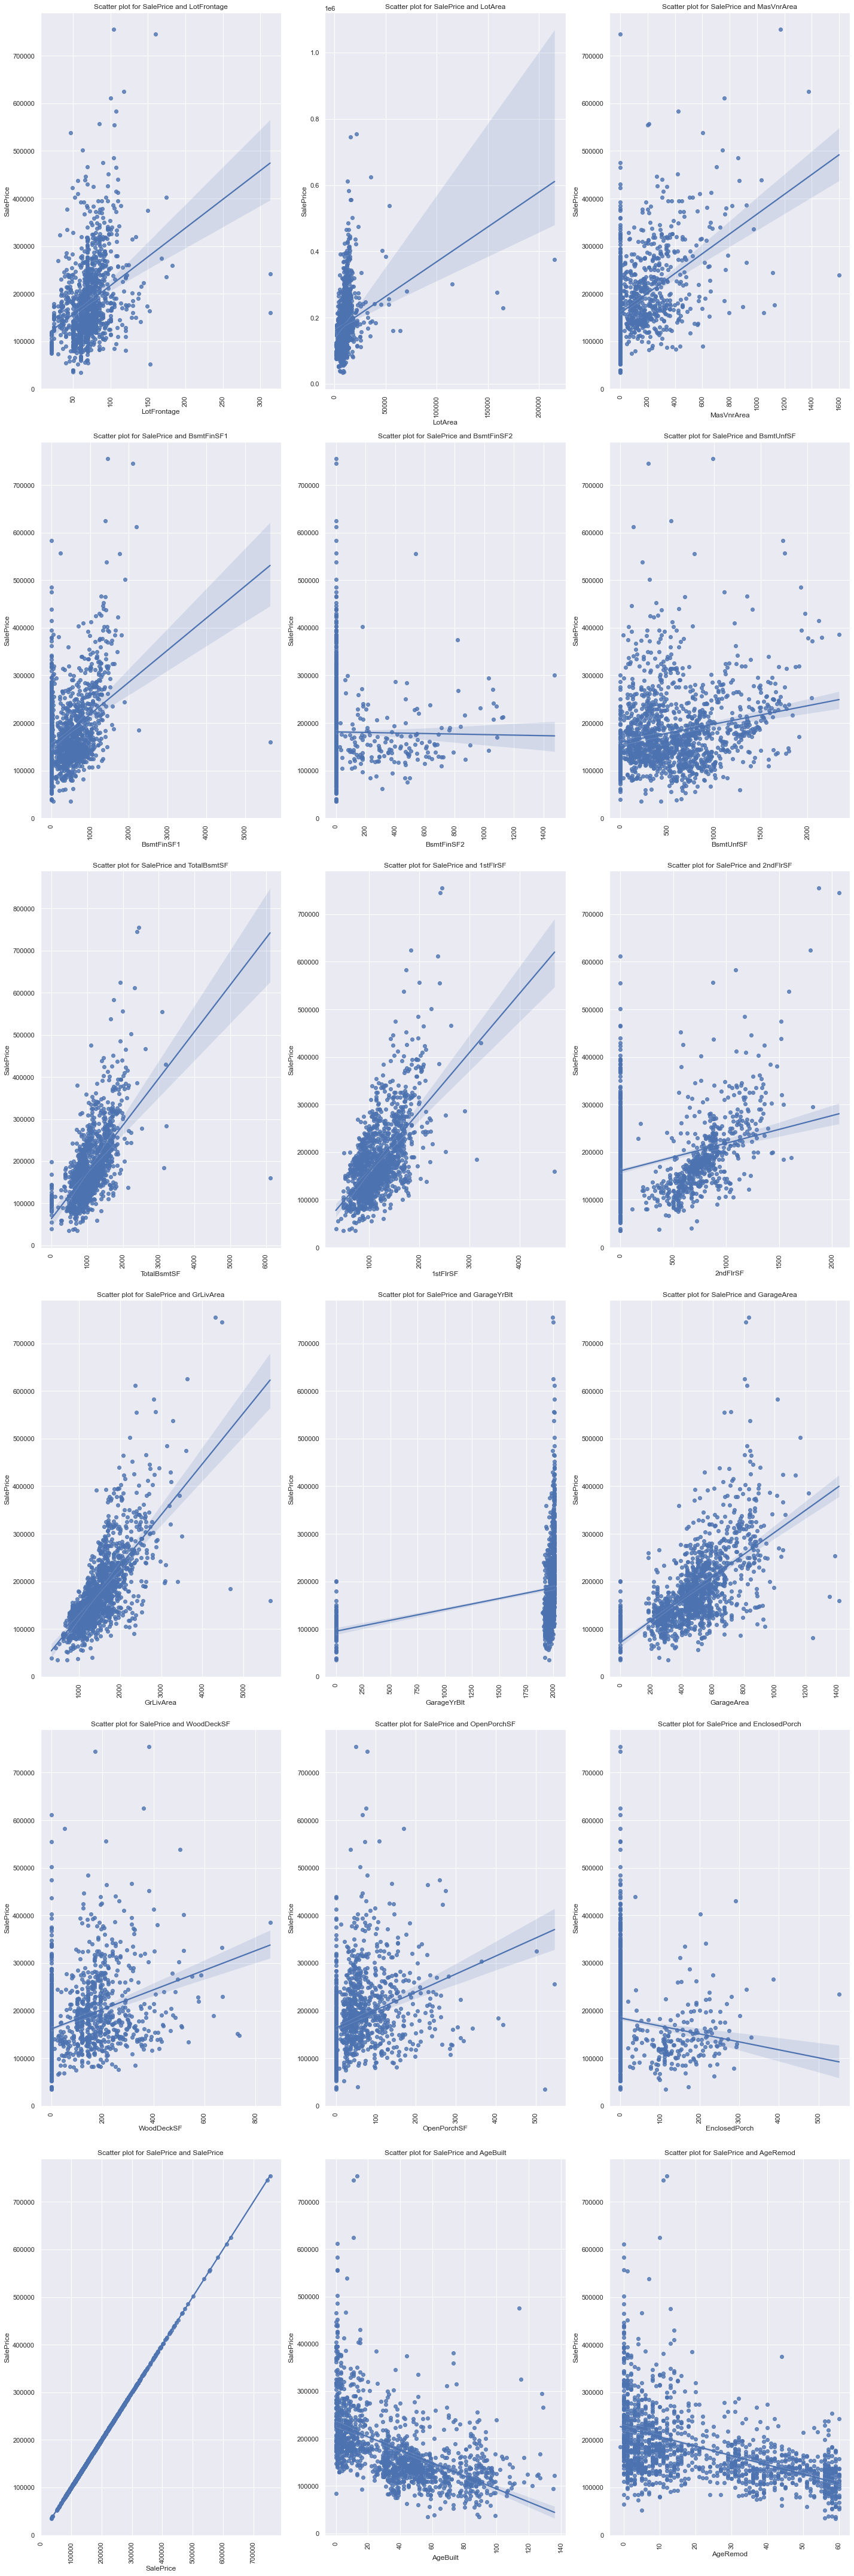

In [36]:
plot_scatter_cont(housing_data,cont_cols)

### Findings
Bivariate Analysis on Continuous columns

Below are the List of features which have linear relationsip with the target feature
* TotalBsmtSF
* 1stFlrSF
* 2ndFlrSF
* GrLivArea
* GarageArea
* AgeBuild
* AgeRemod

In [37]:
def plot_box_cat(df, col):
    plt.figure(figsize=(10, 10))
    sns.boxplot(x=df[col], y=df["SalePrice"])
    plt.title("Boxplot for SalePrice and " + col)
    plt.xticks(rotation=90)
    plt.show()

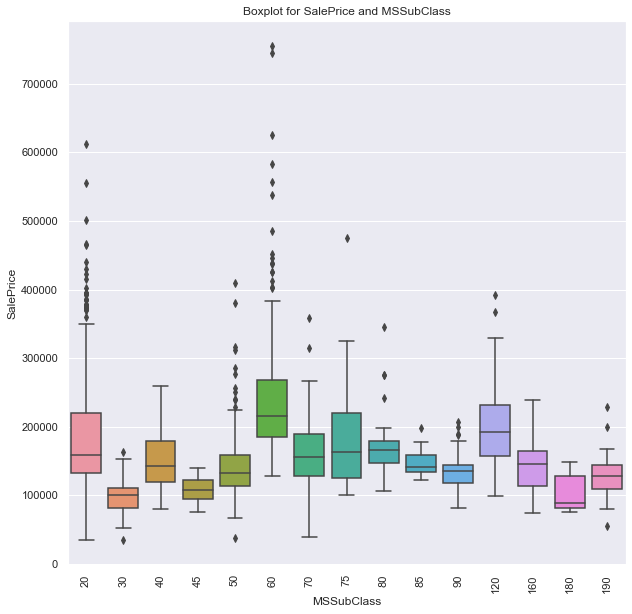

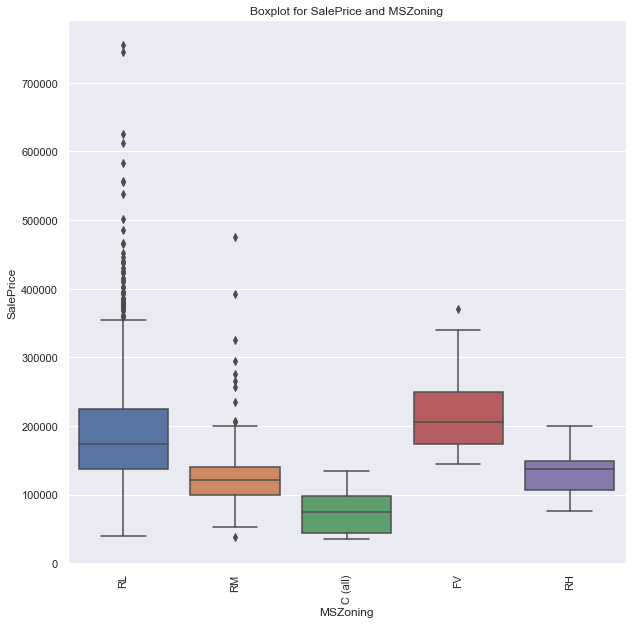

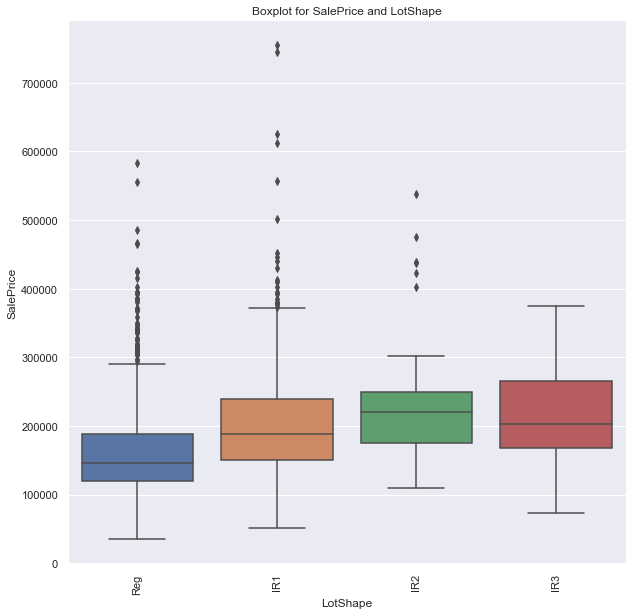

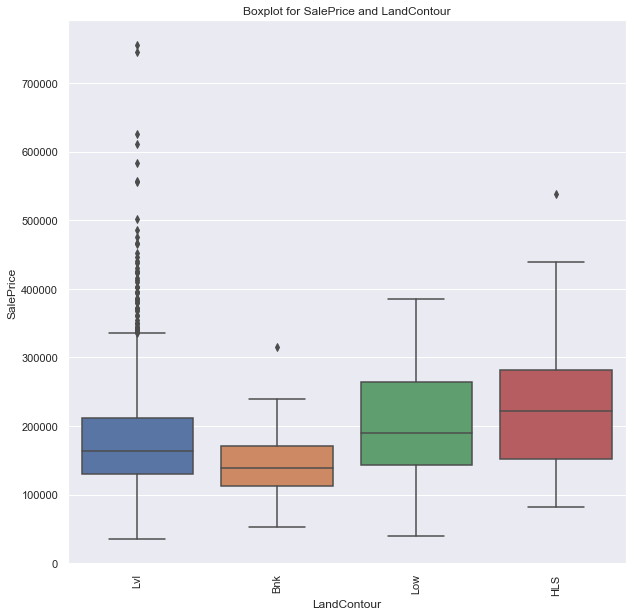

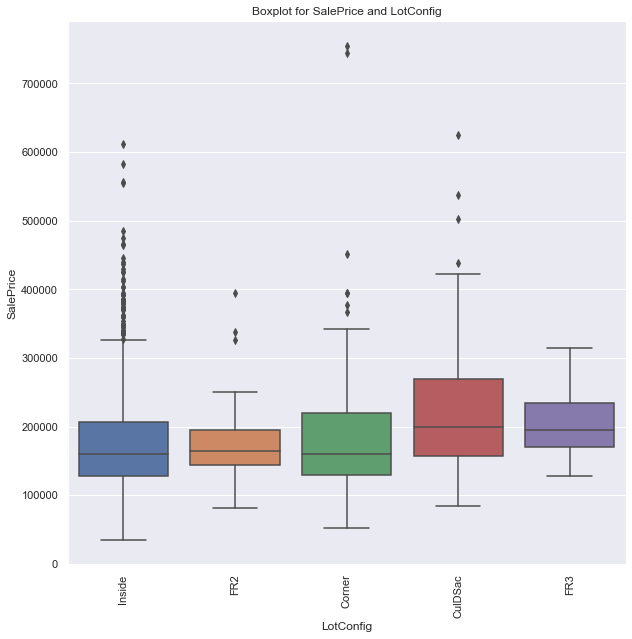

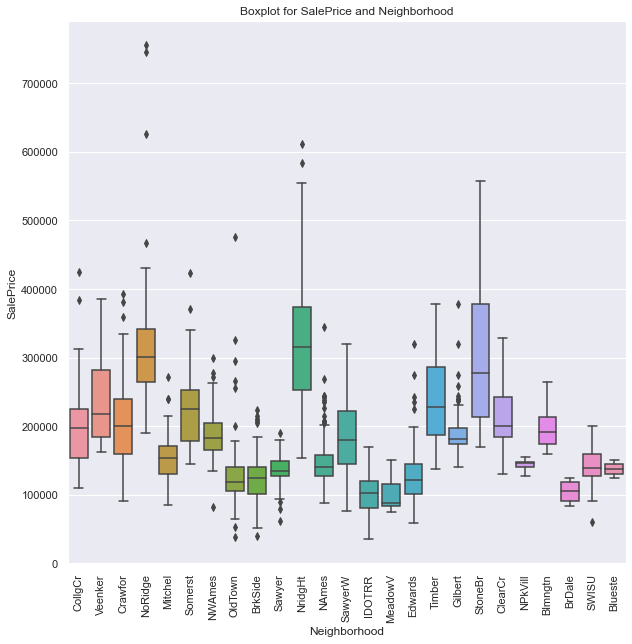

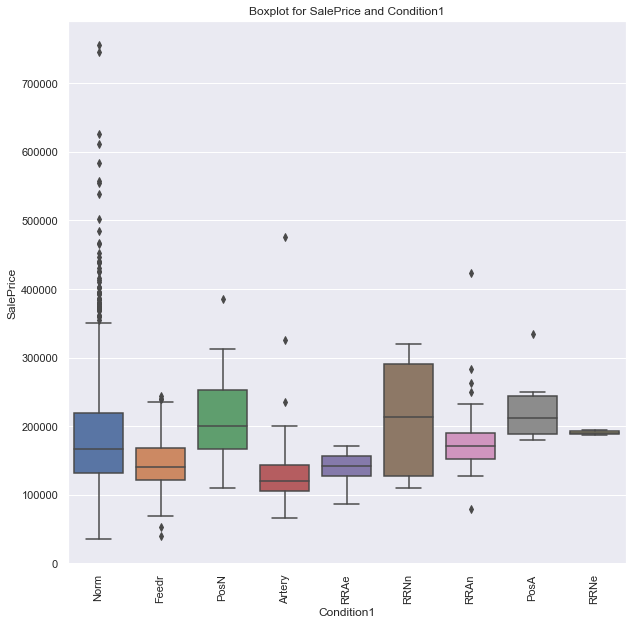

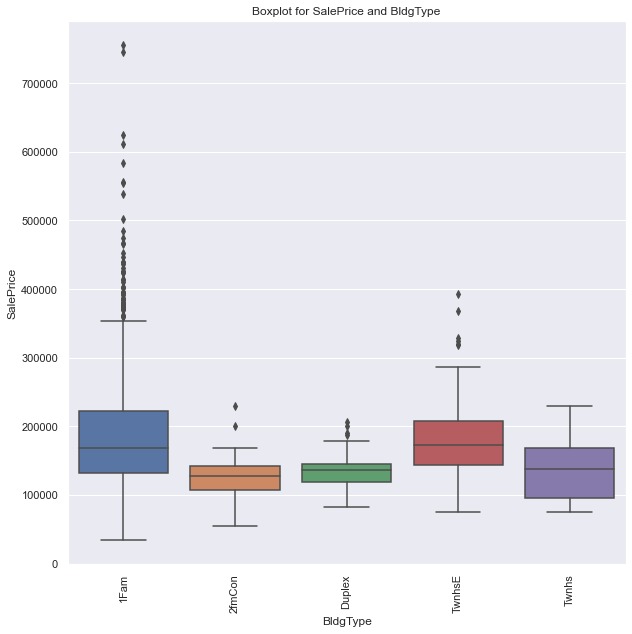

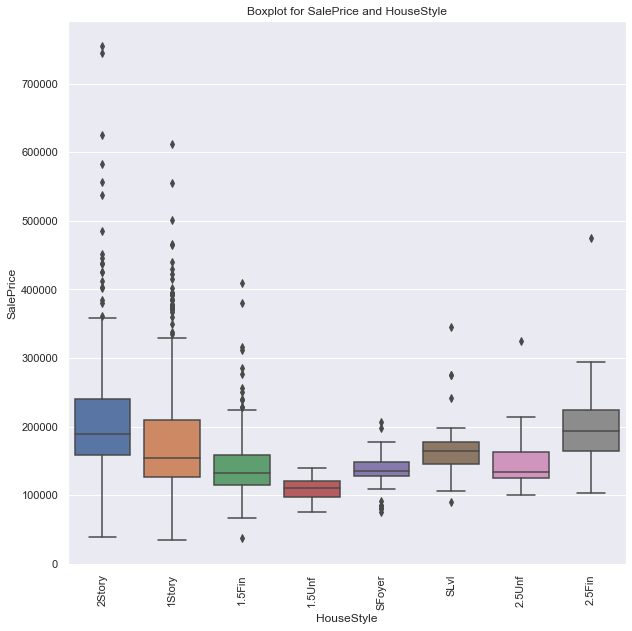

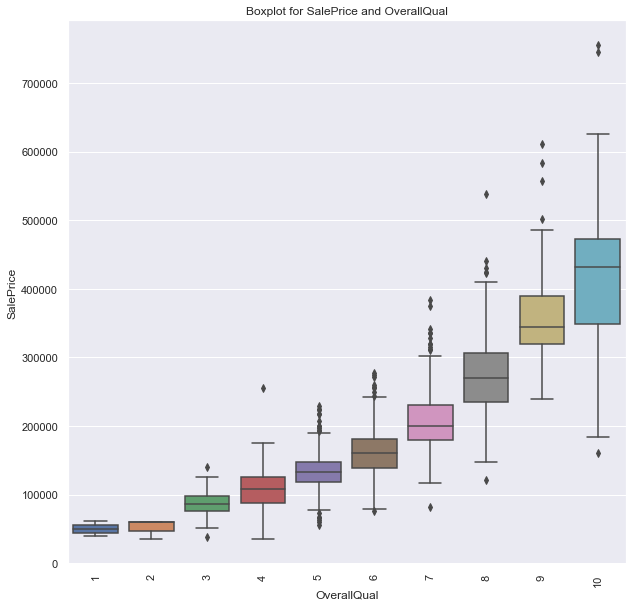

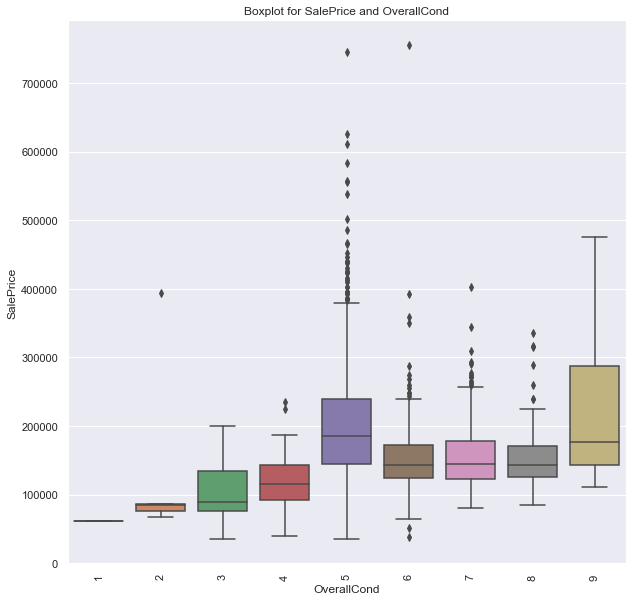

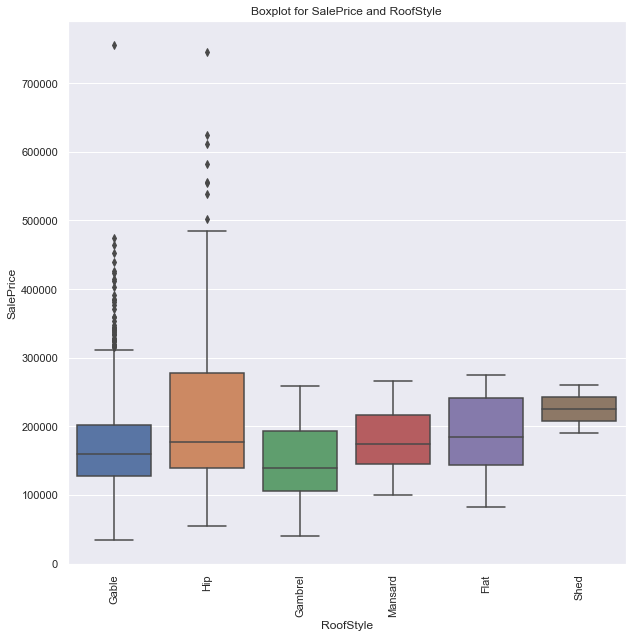

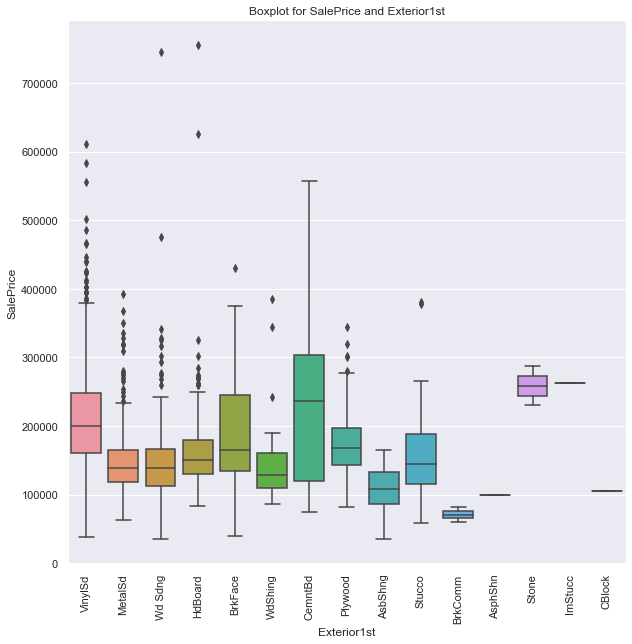

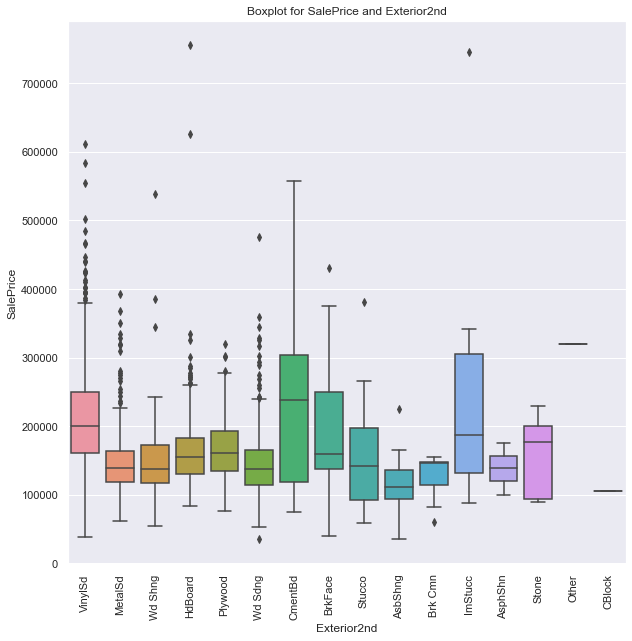

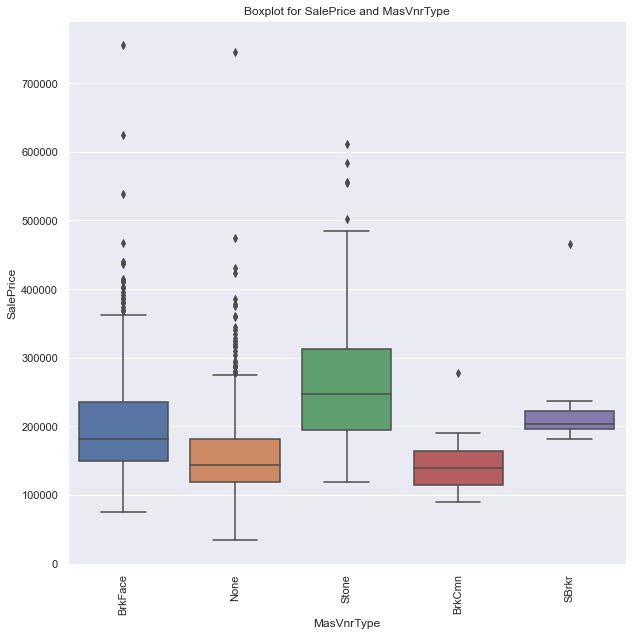

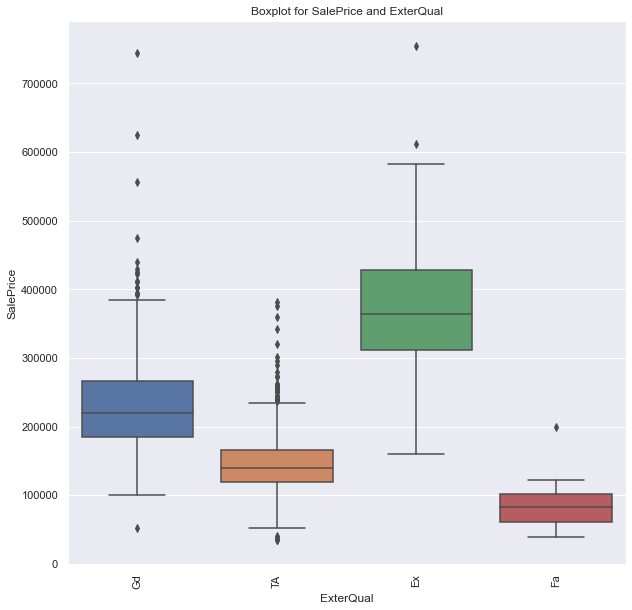

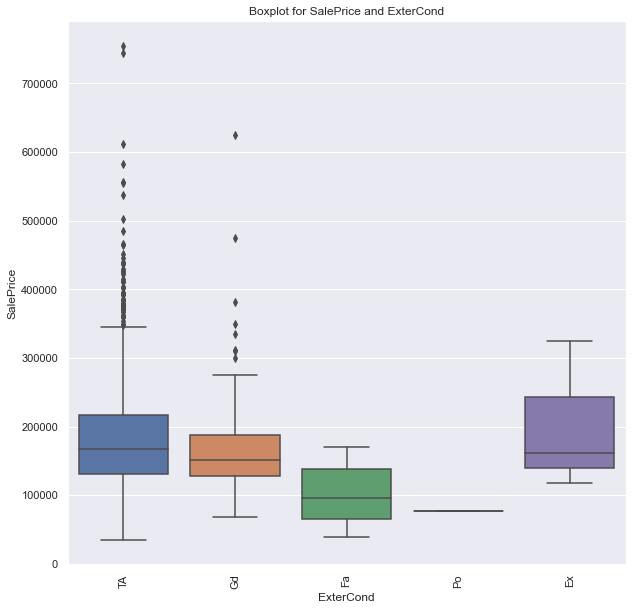

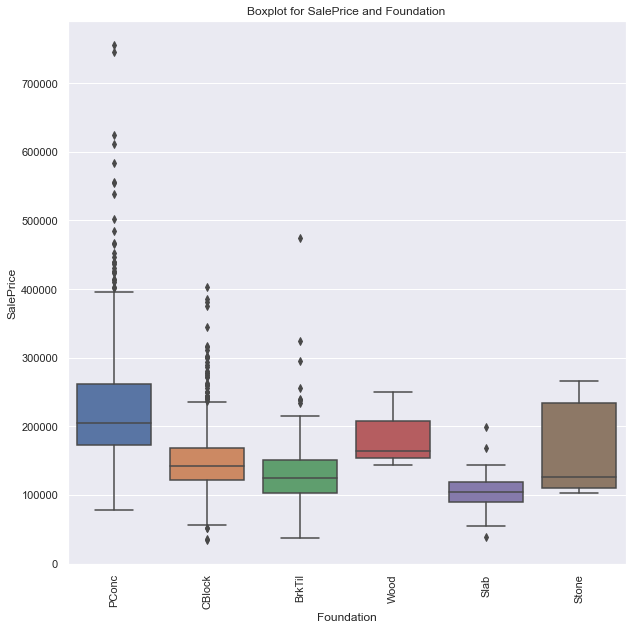

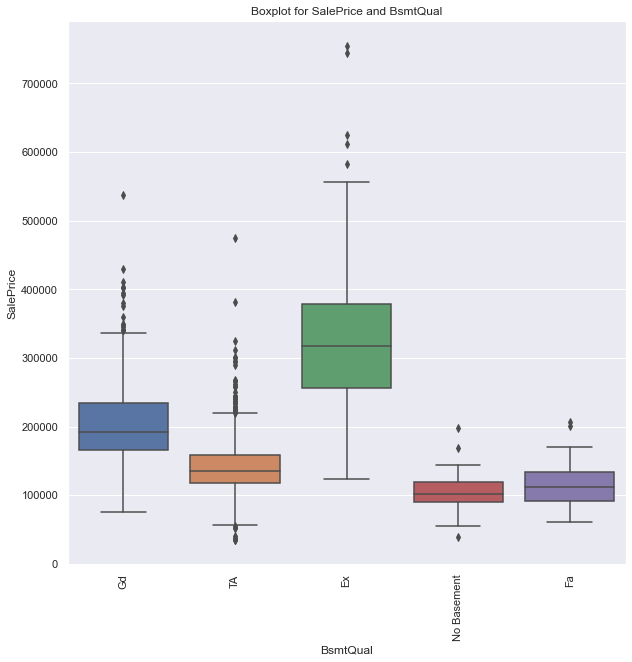

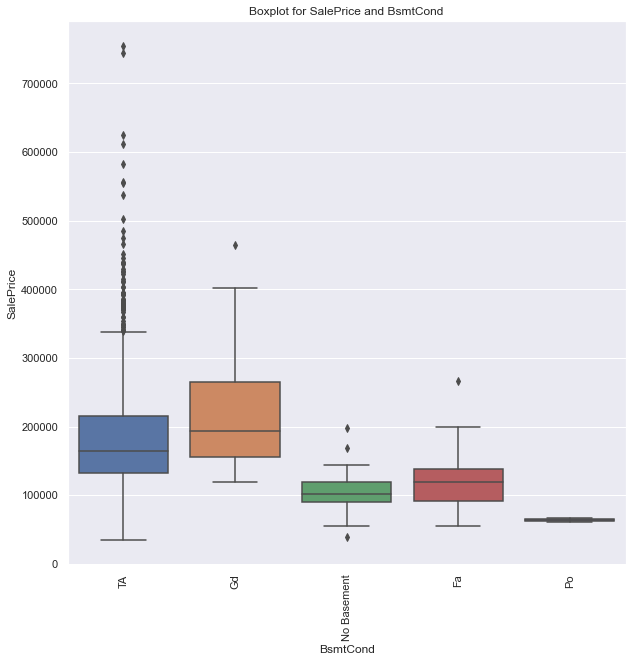

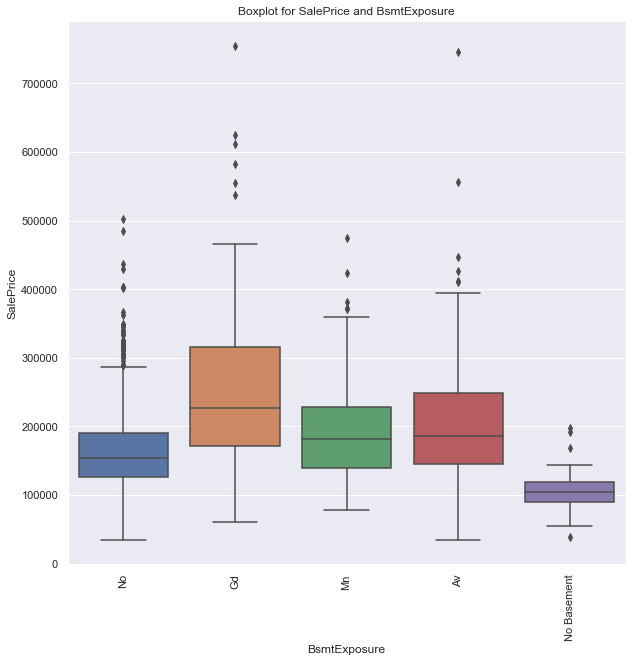

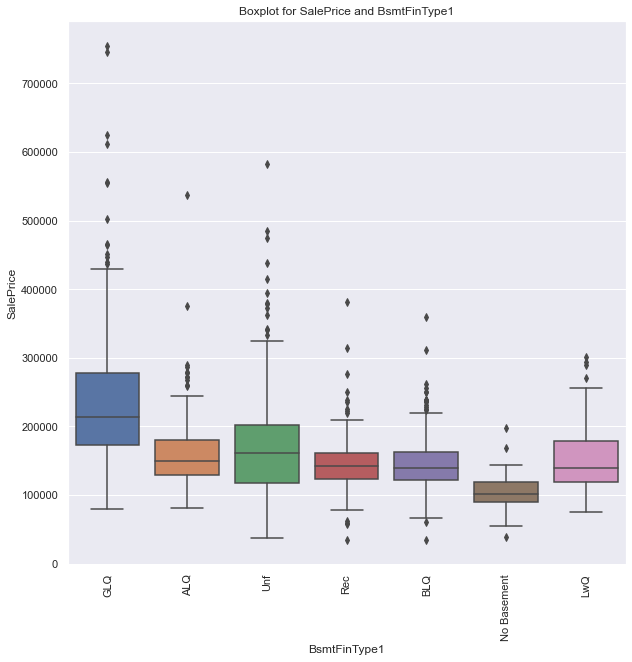

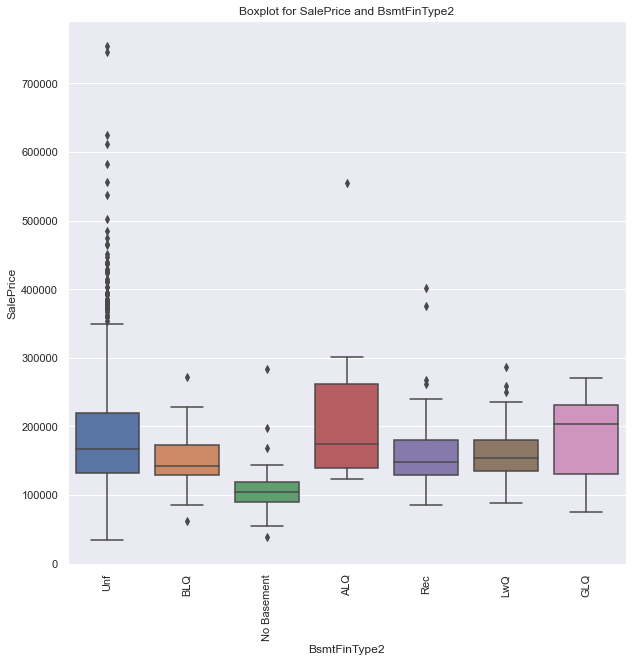

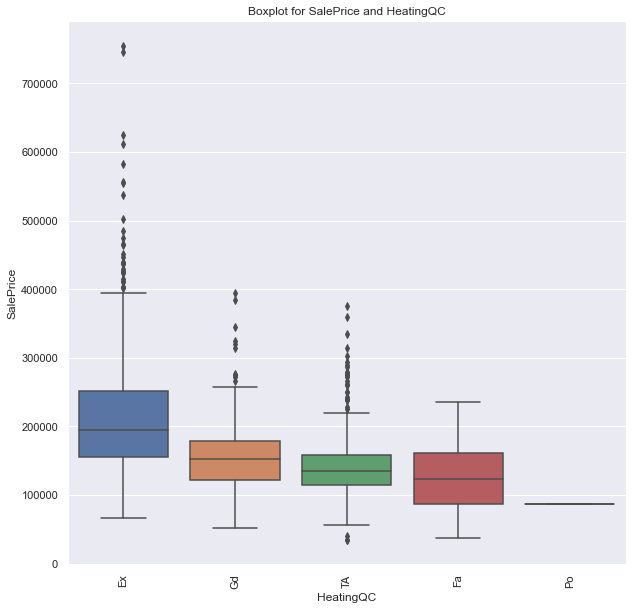

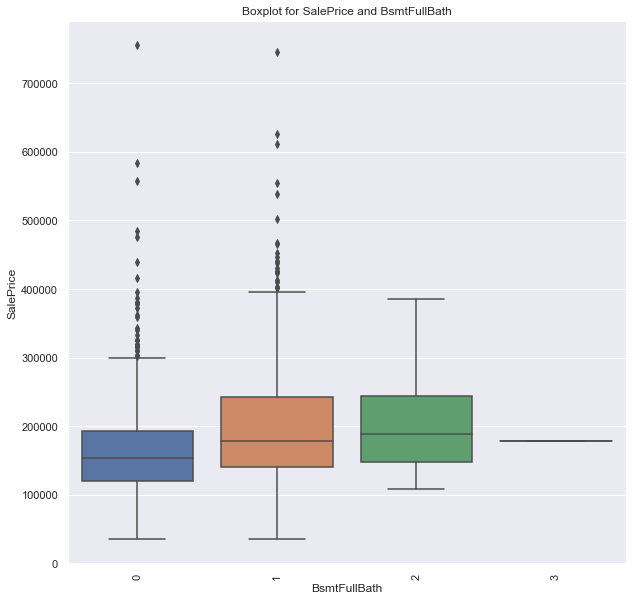

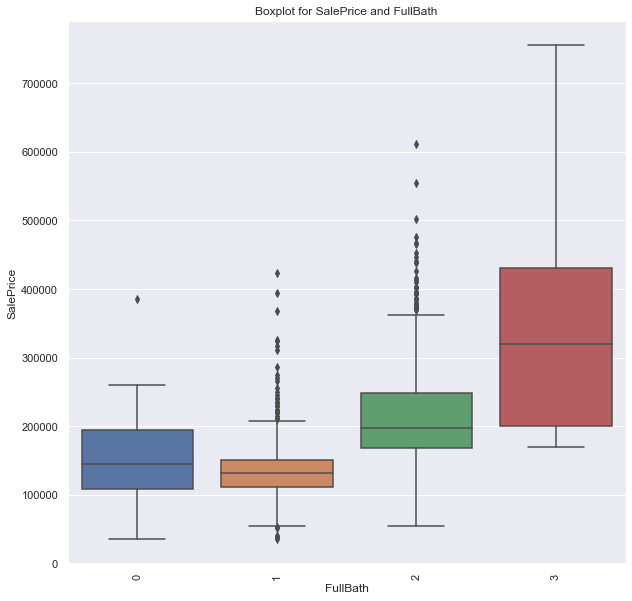

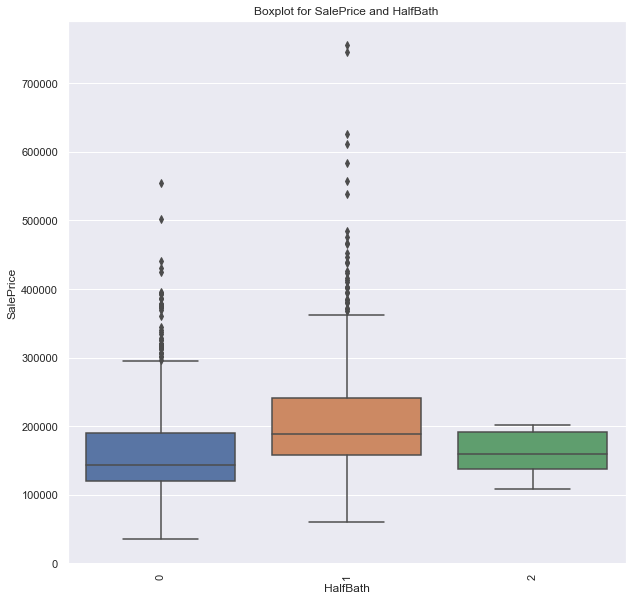

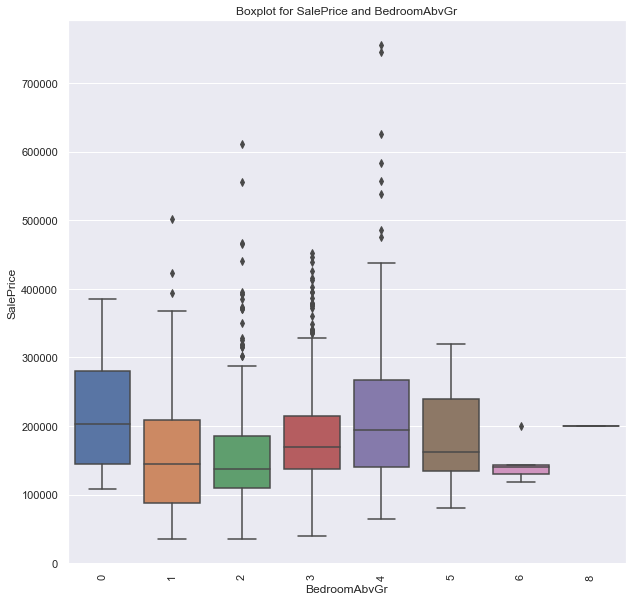

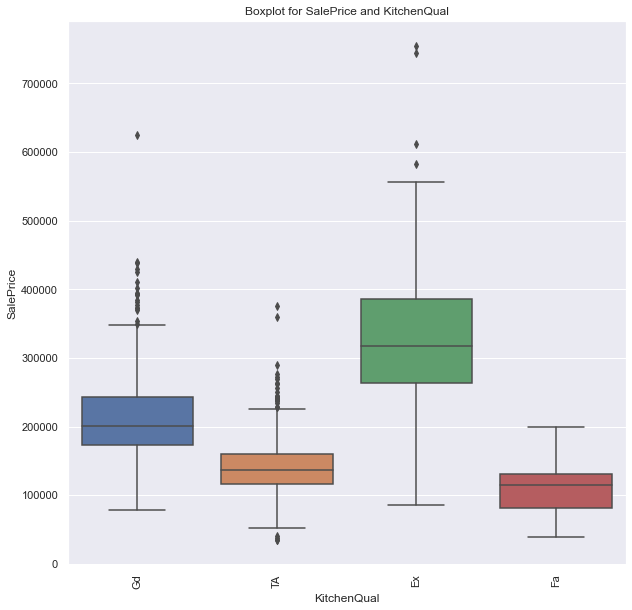

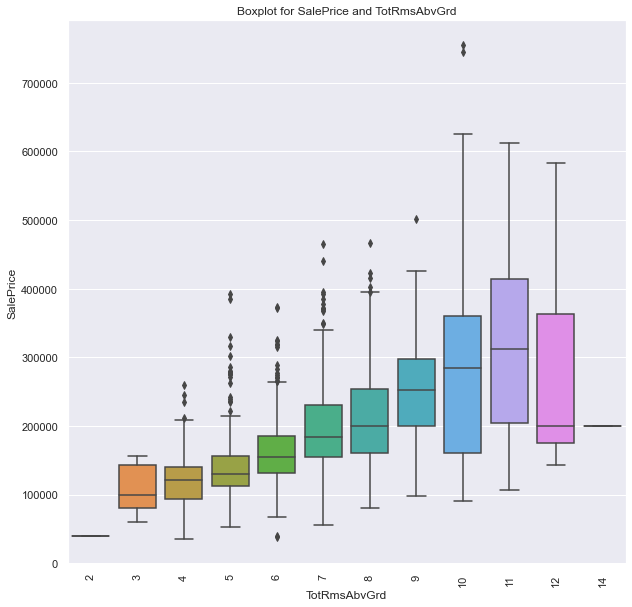

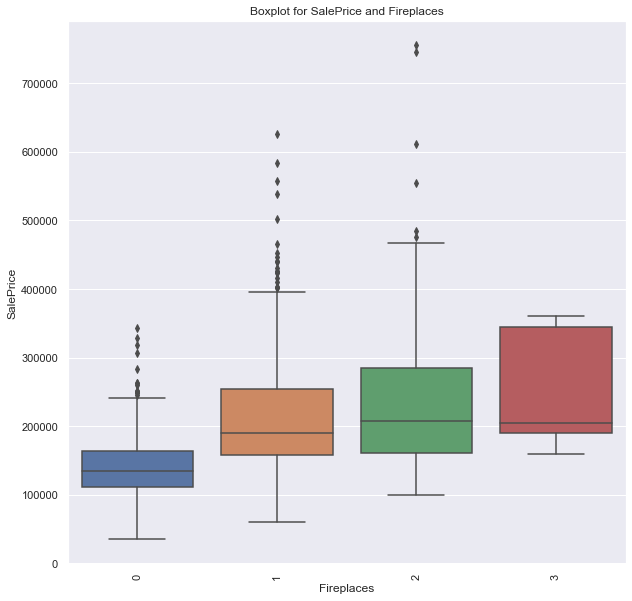

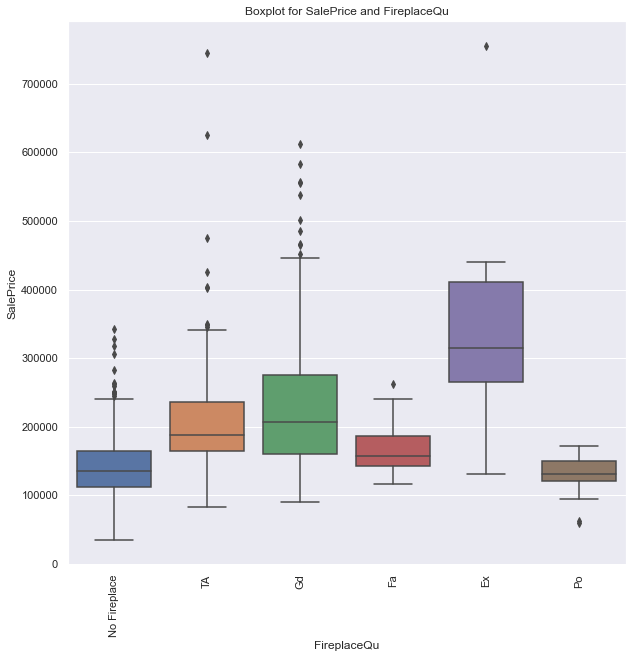

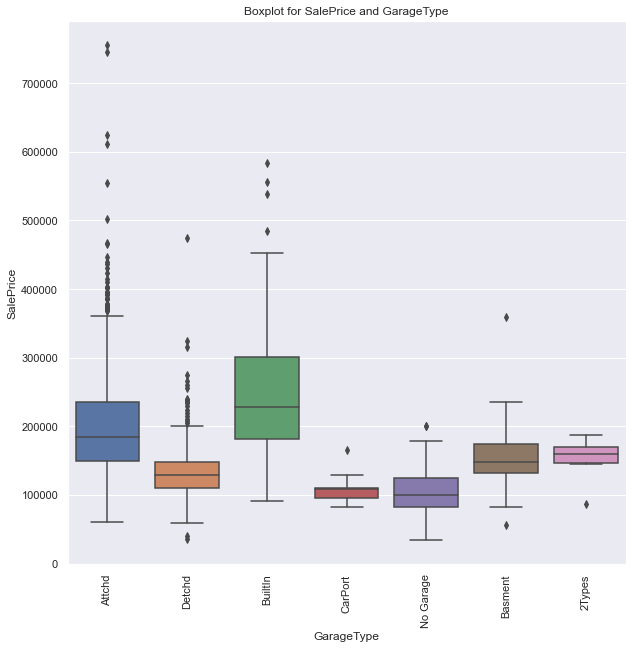

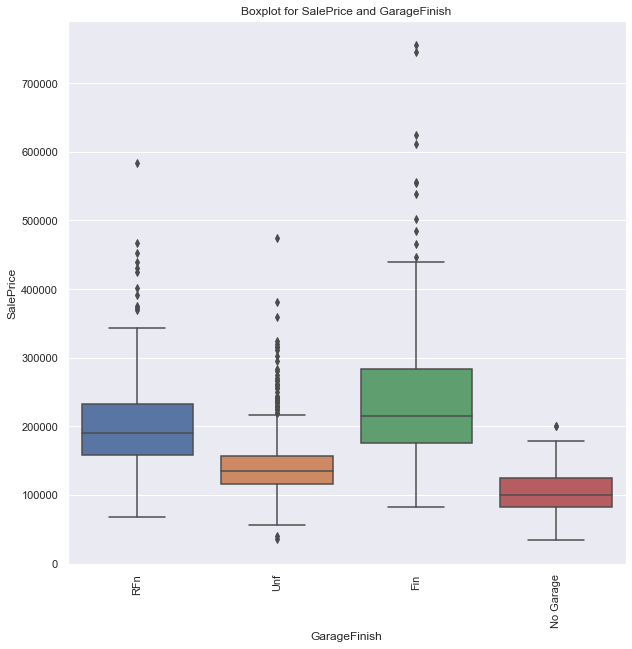

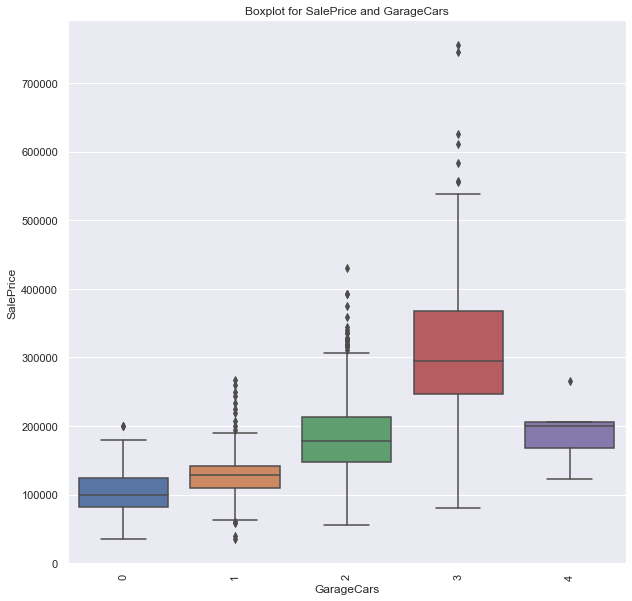

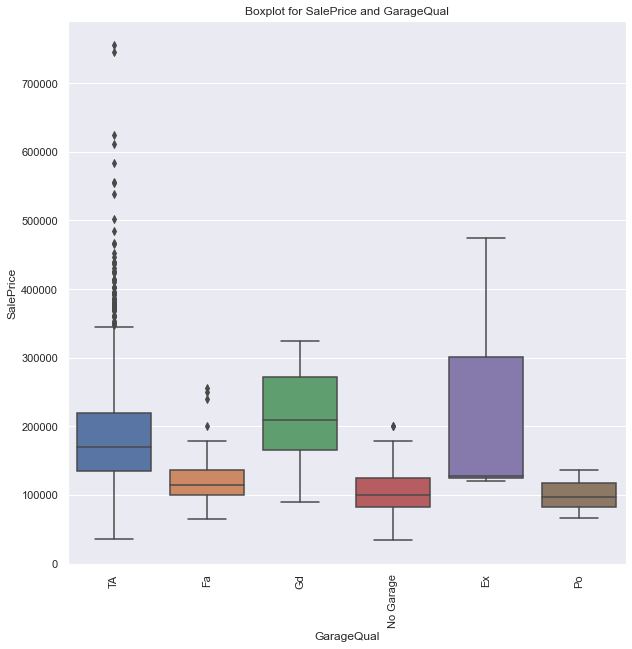

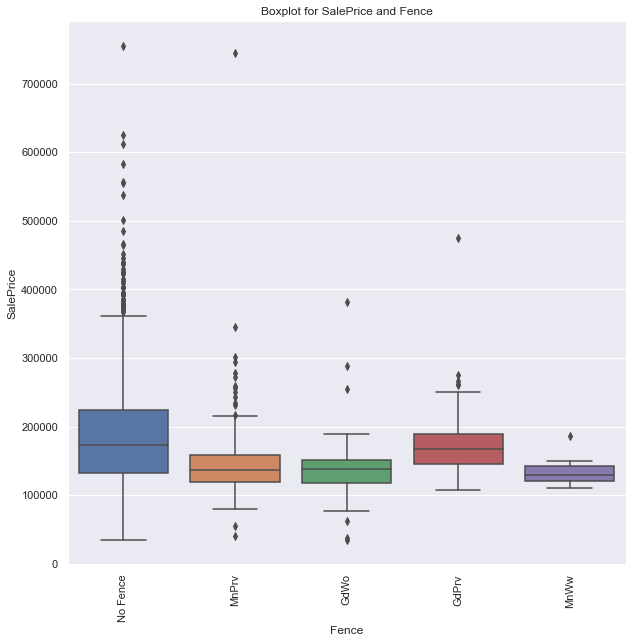

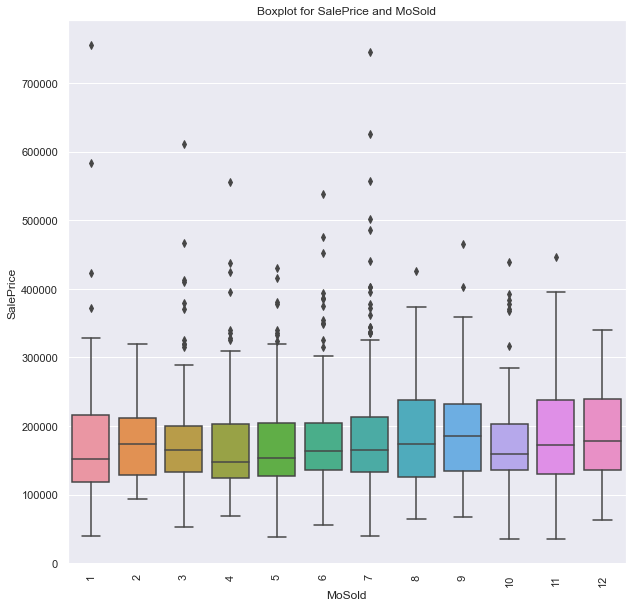

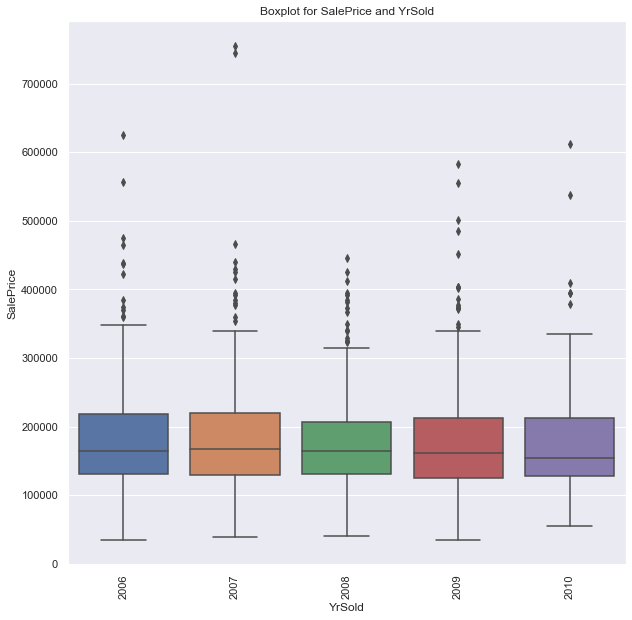

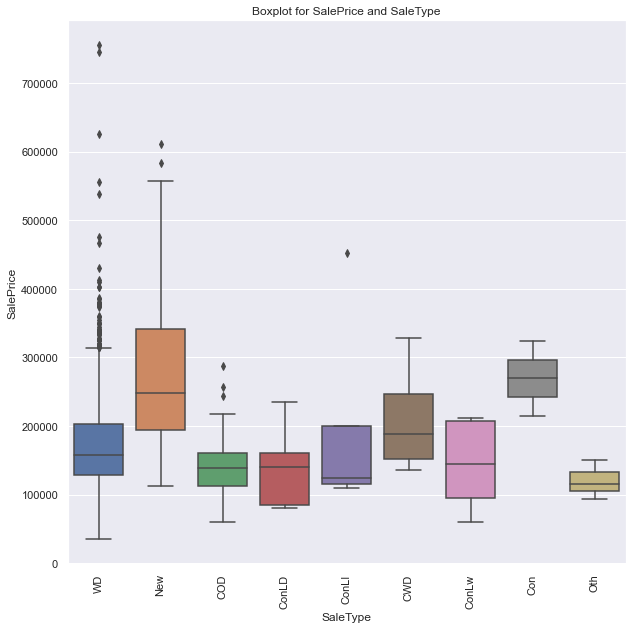

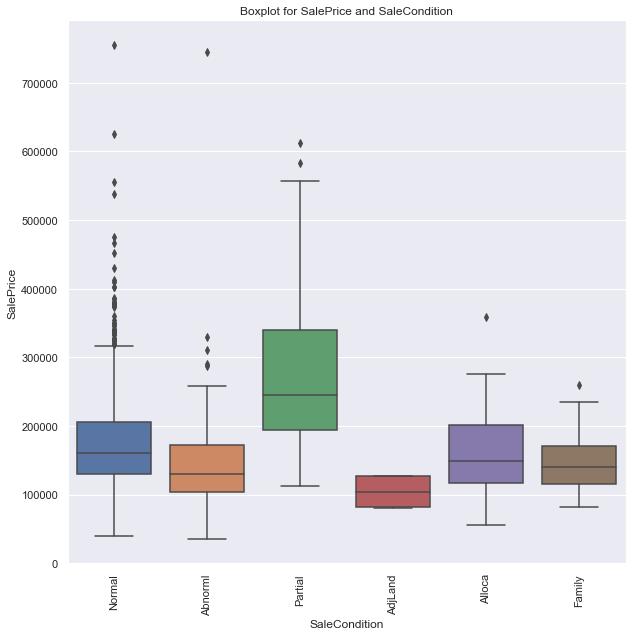

In [38]:
for col in cat_cols:
    plot_box_cat(housing_data,col)

### Findings
Bivariate Analysis on Categorical columns

* MSSubClass - 20, 50, 75, 120 have higher SalePrice than other MSSubClass
* MSZoning - RL and FV have higher SalePrice than other MSZoning
* LotShape - IR2 and IR1 have slightly higher avarage SalesPrice than other LotShape
* LandContour - HLS has slightly higher avarage SalesPrice than other LandContour
* LotConfig - CulDSac has slightly higher avarage SalesPrice than other LotConfig
* Neighborhood - NoRidge, NridgHt, Timber and StoneBr have higher SalePrice than other Neighborhood
* Condiction1 - PosN and RRNn have slightly higher SalePrice than other Condiction1 
* BldgType - 1Fam and TwnhsE have slightly higher SalePrice than other BldgType 
* HouseStyle - 2Story, 1Story and 2.5Fin have higher SalePrice than other HouseStyle
* OverallQual - As the OverallQual increases the the SalePrice increases steeply
* OverallCond - As the OverallCond increases the the SalePrice increases
* RoofStyle - No effect of RoofStyle on the SalePrice
* Exterior1st - VinylSd, CemntBd and Stone have higher SalePrice than other Exterior1st
* Exterior2nd - VinylSd, CemntBd and ImStucc have higher SalePrice than other Exterior2nd
* MasVnrType - Stone and SBrkr have higher avarage SalesPrice than other MasVnrType
* ExterQual - Ex has significant higher SalePrice than other ExterQual
* ExterCond - No effect of ExterCond on the SalePrice
* Foundation - PConc has higher avarage SalesPrice than other Foundation
* BsmtQual - Ex and Gd have significant higher SalePrice than other BsmtQual
* BsmtCond - TA and Gd have higher SalePrice than other BsmtCond
* BsmtExposure - Gd has higher SalePrice than other BsmtExposure
* BsmtFinType1 - GL Q has higher SalePrice than other BsmtFinType1
* BsmtFinType2 - GL Q has higher SalePrice than other BsmtFinType2
* HeatingQC  - As HeatingQC becomes poor the SalePrice decreases 
* BsmtFullBath - No effect of BsmtFullBath on the SalePrice
* FullBath - 2 and 3 ave significant higher SalePrice than other FullBath
* HalfBath - 1 has slightly higher avarage SalePrice than other HalfBath
* BedroomAbvGr - 0 and 4 have slightly higher avarage SalePrice than other BedroomAbvGr
* KitchenQual - Ex has significant higher SalePrice than other KitchenQual
* TotRmsAbvGrd - As the TotRmsAbvGrd increases the the SalePrice increases
* FirePlaces - As the FirePlaces increases the the SalePrice increases
* FireplaceQu - Ex has significant higher SalePrice than other FireplaceQu
* GarageType - Attchd and BuiltIn have higher SalePrice than other GarageType
* GarageFinish - Fin has higher SalePrice than other GarageFinish
* GarageCars - As the GarageCars increases the the SalePrice increases except for 4
* GarageQual - Gd and Ex have higher SalePrice than other GarageQual
* Fence - No effect of Fence on the SalePrice
* MoSold - No effect of MoSold on the SalePrice
* YrSold - No effect of YrSold on the SalePrice
* SaleType - New, CWD and Con have higher SalePrice than other SaleType
* SaleCondition - Partial has significant higher SalePrice than other SaleCondition

In [39]:
def plot_box_conti(df, col):
    plt.figure(figsize=(10, 10))
    bins = pd.cut(df[col], 10)
    sns.boxplot(x=bins, y=df["SalePrice"])
    plt.title("Boxplot for SalePrice and " + col)
    plt.xticks(rotation=90)
    plt.show()

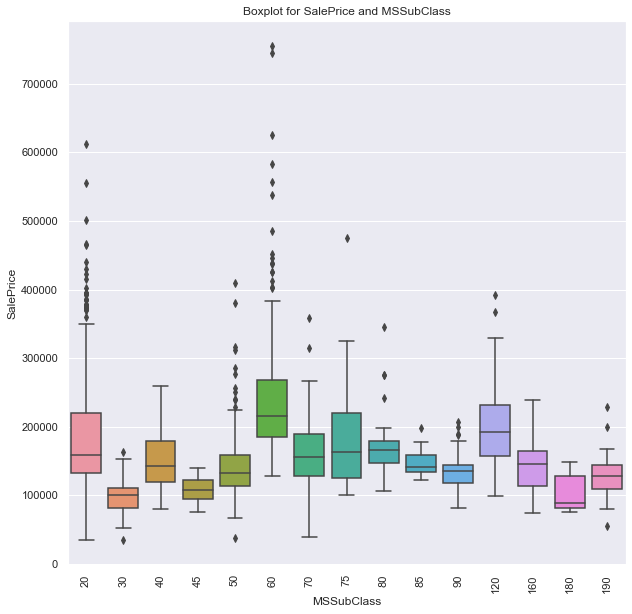

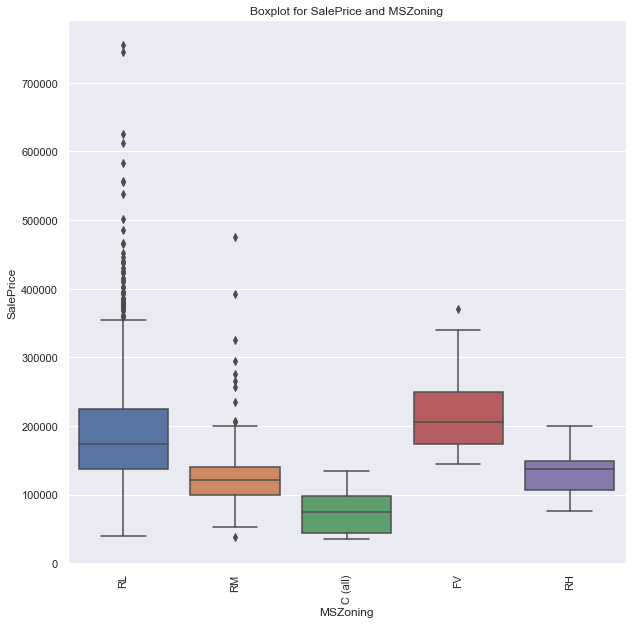

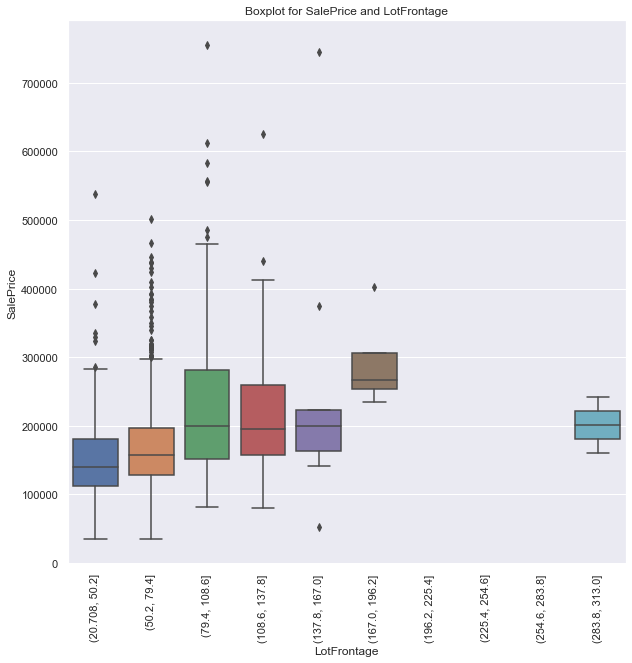

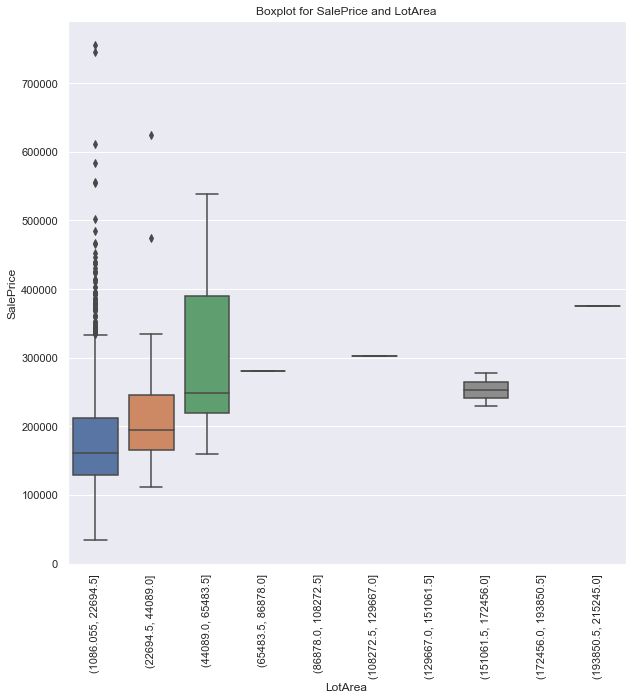

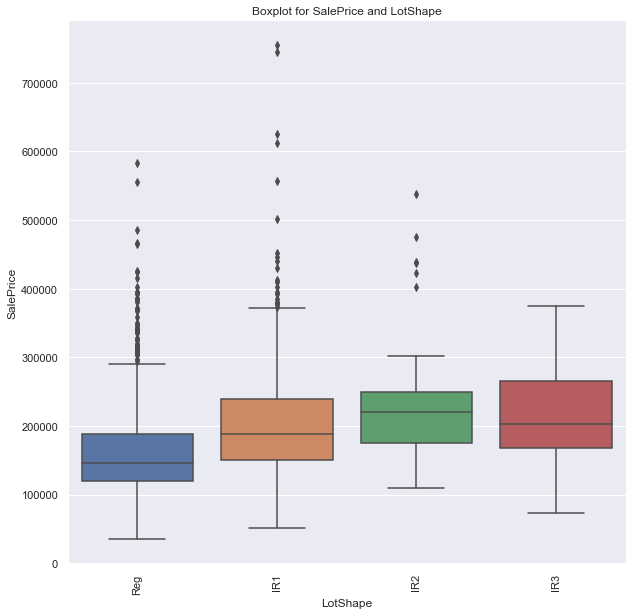

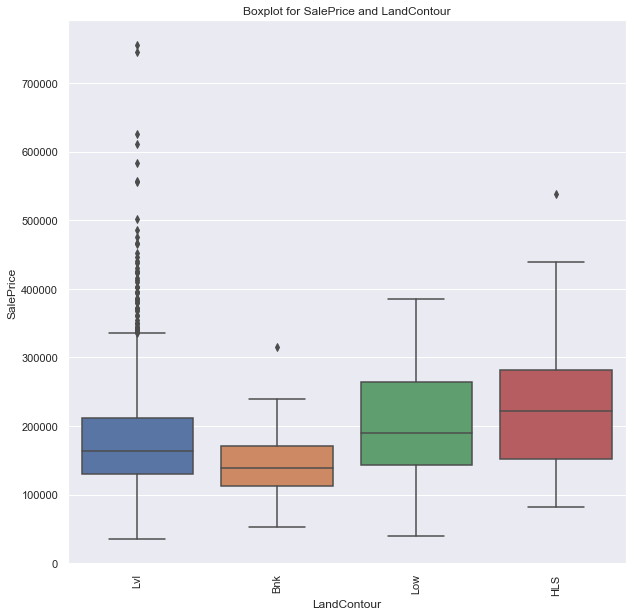

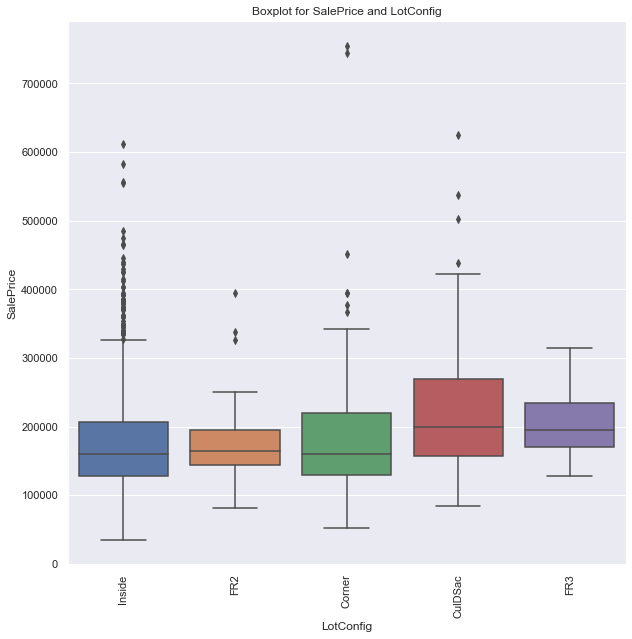

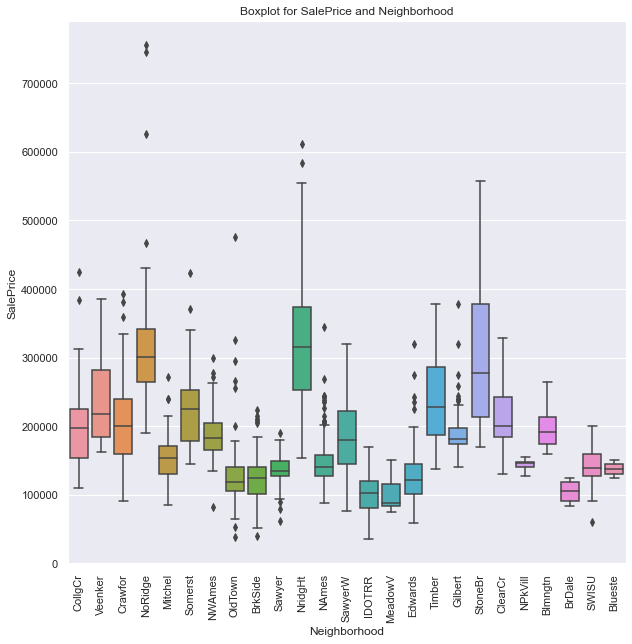

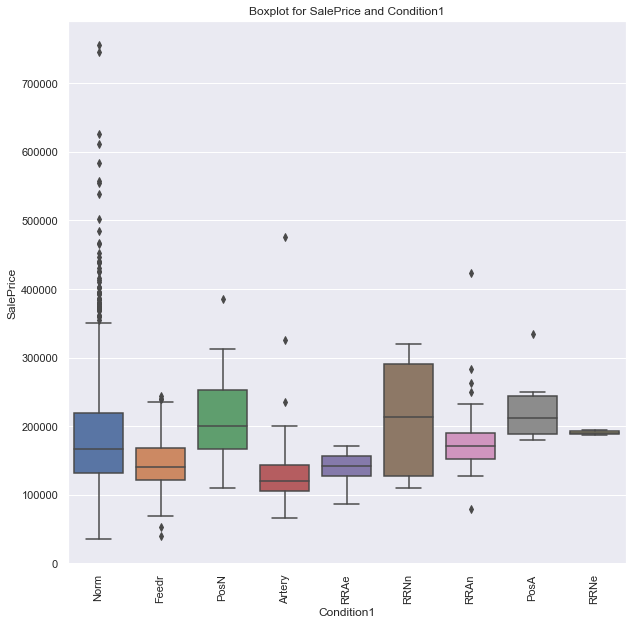

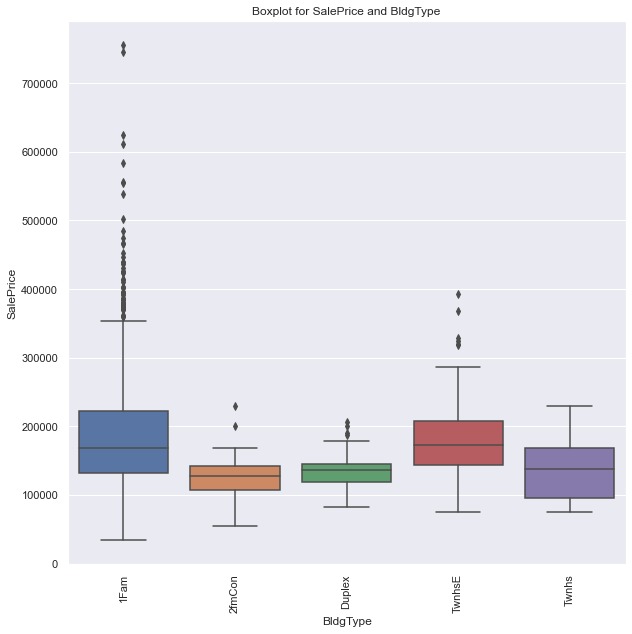

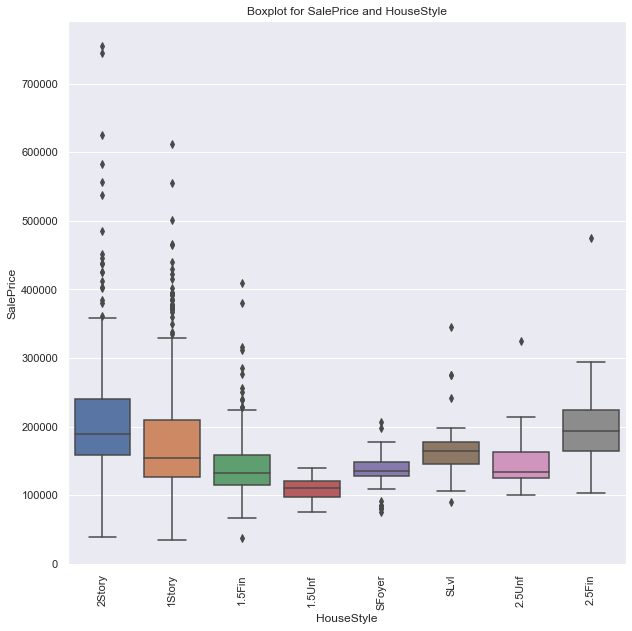

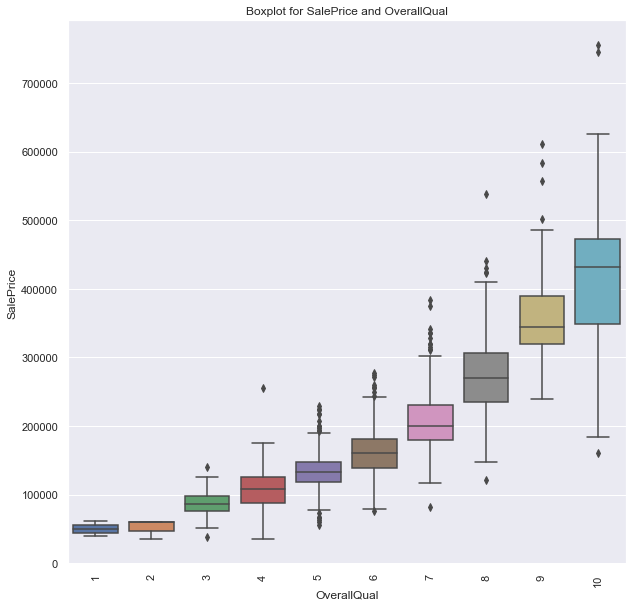

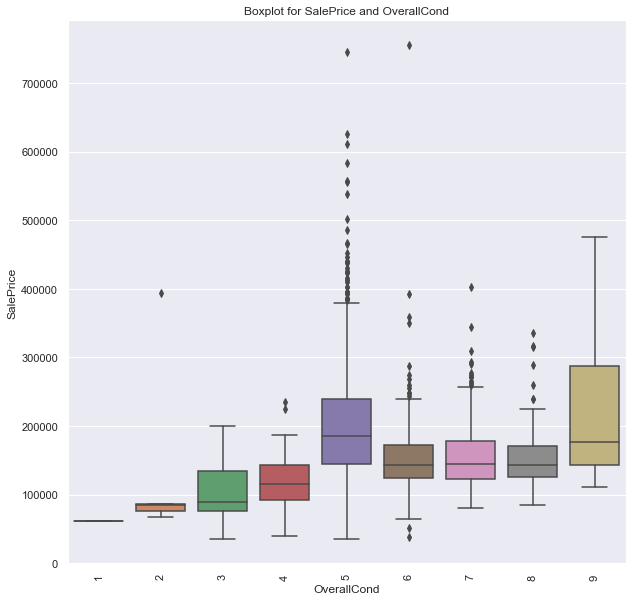

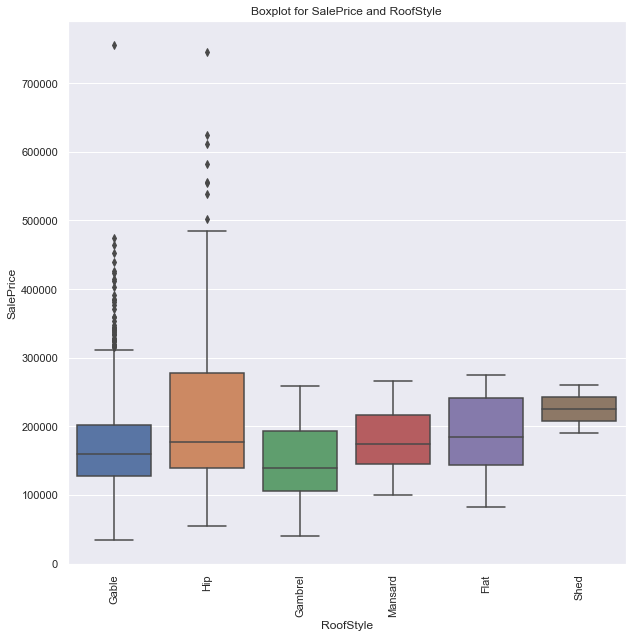

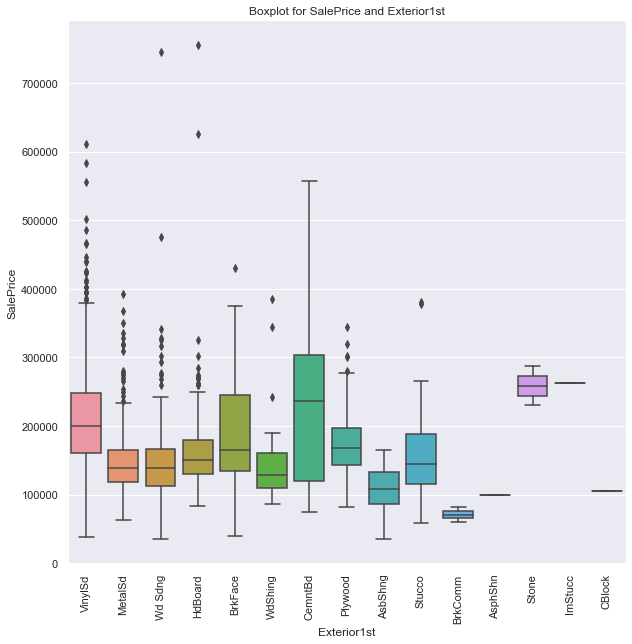

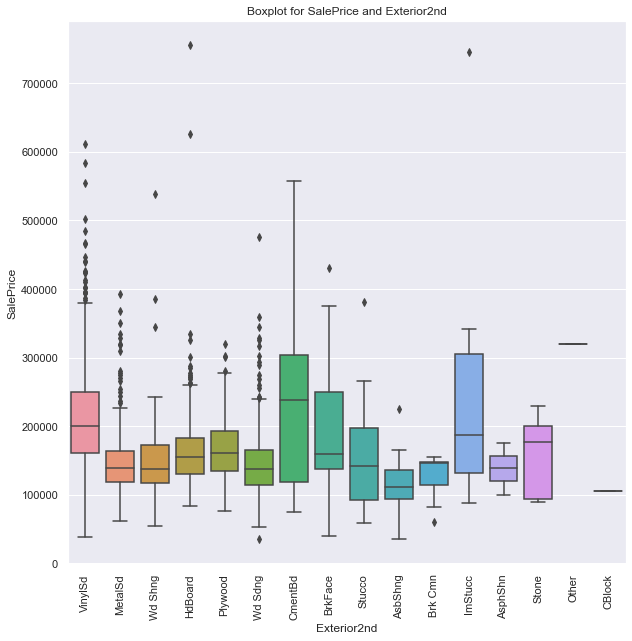

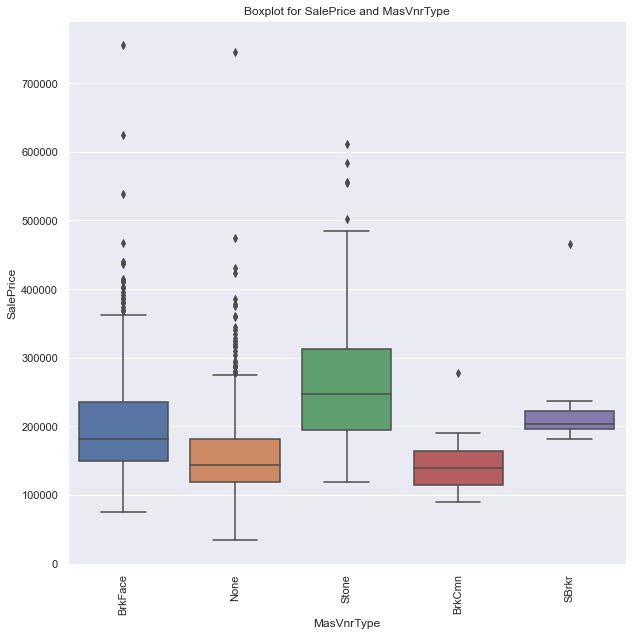

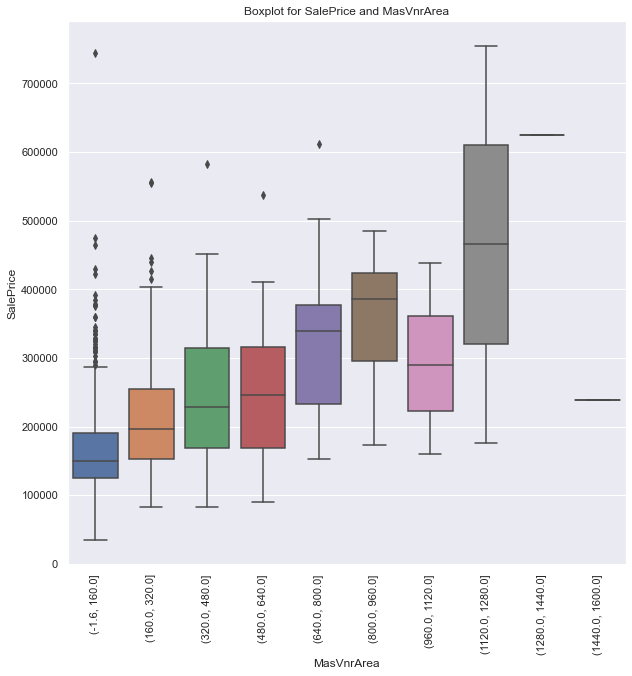

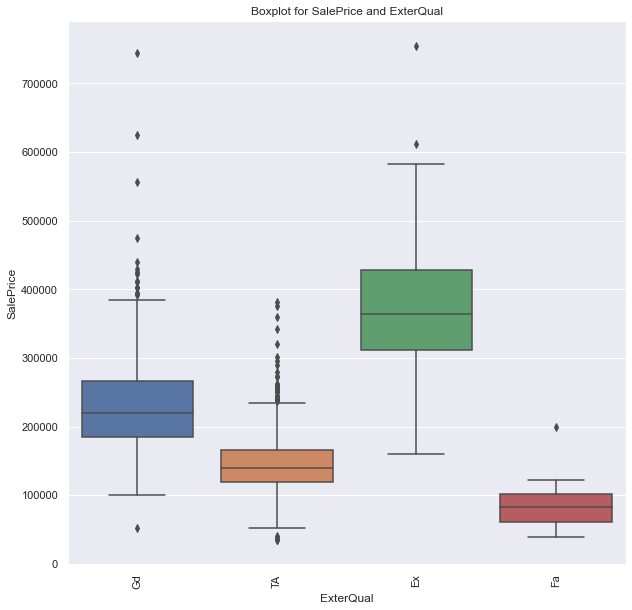

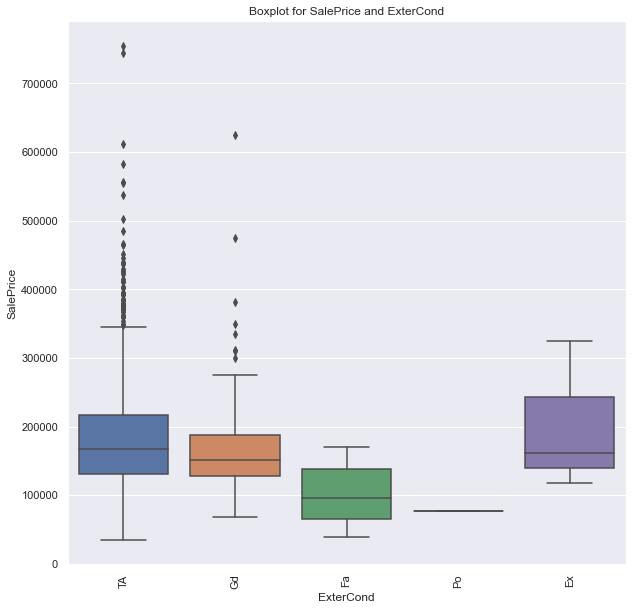

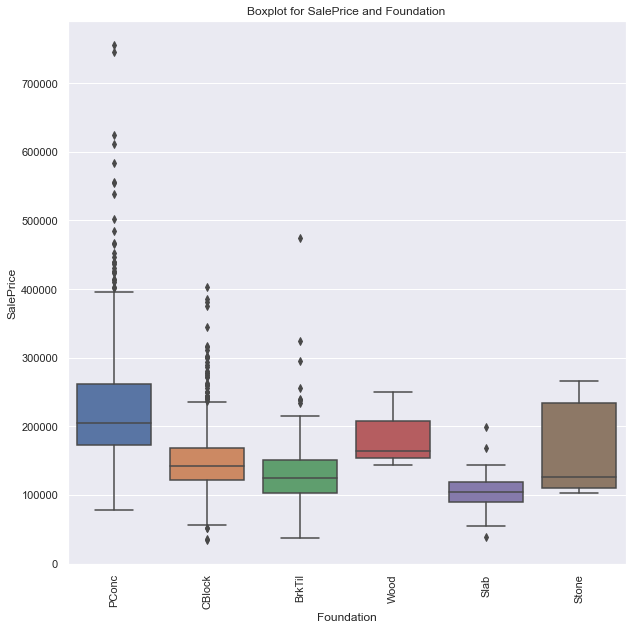

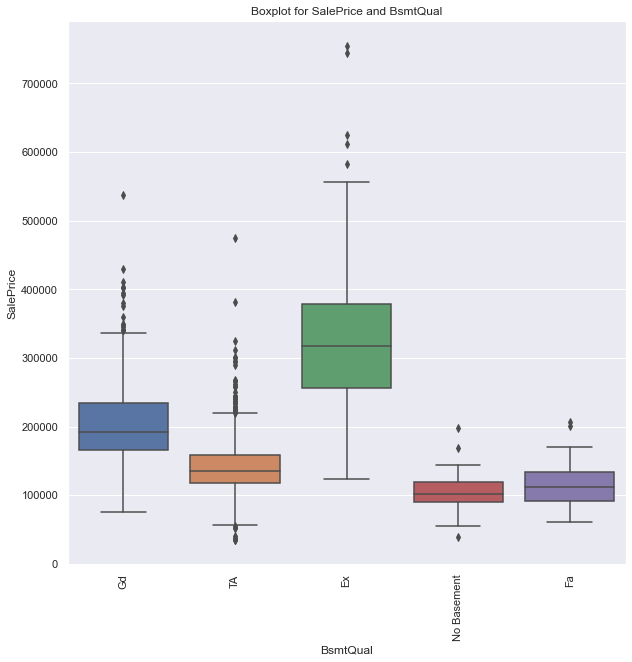

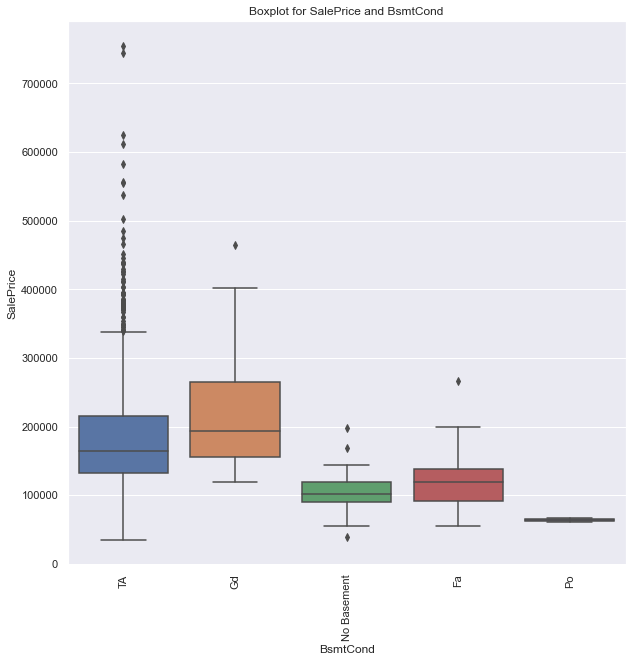

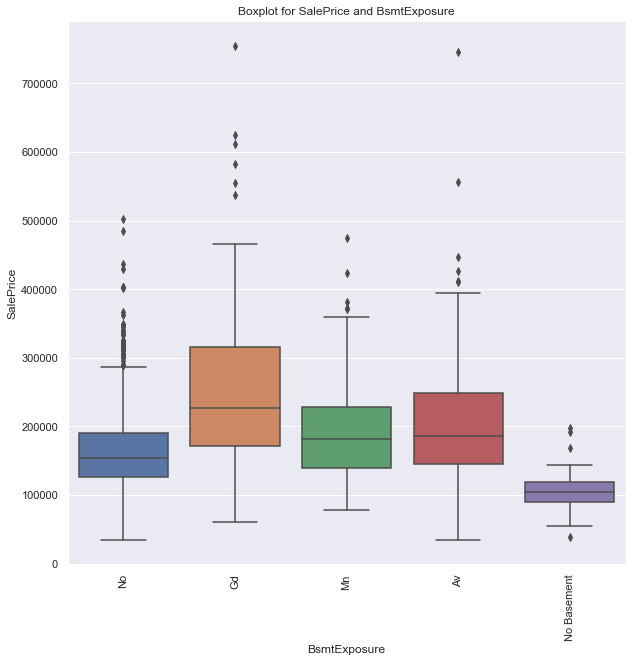

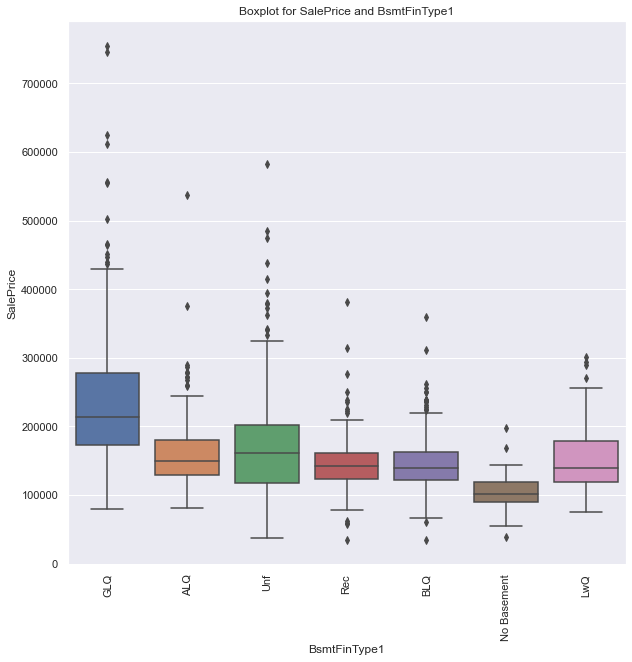

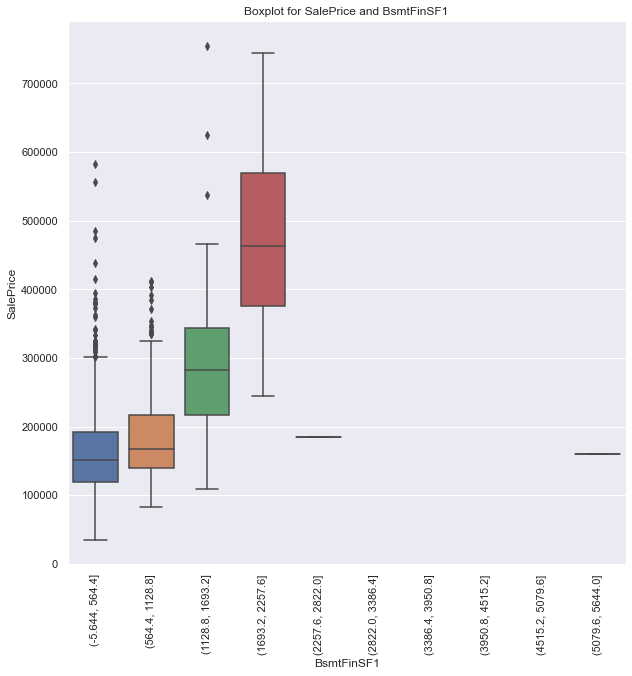

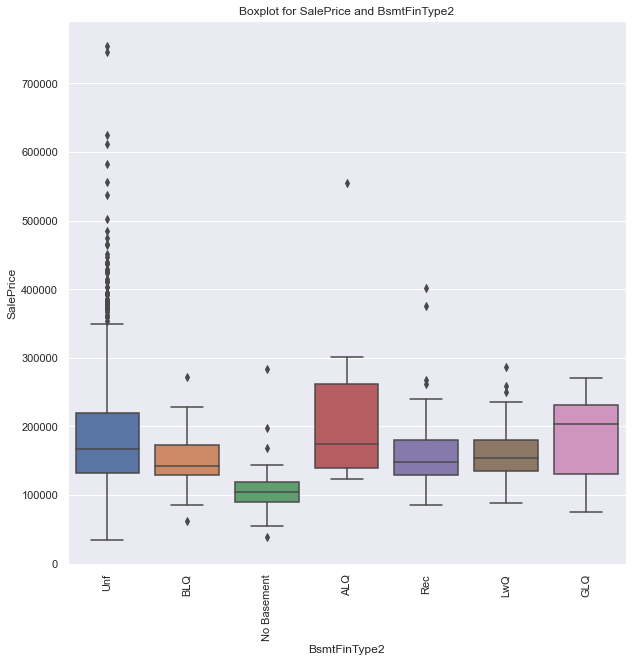

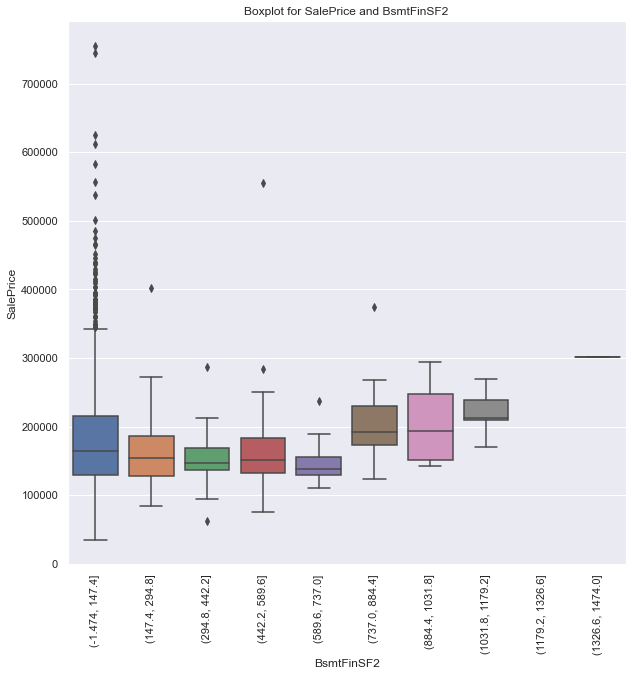

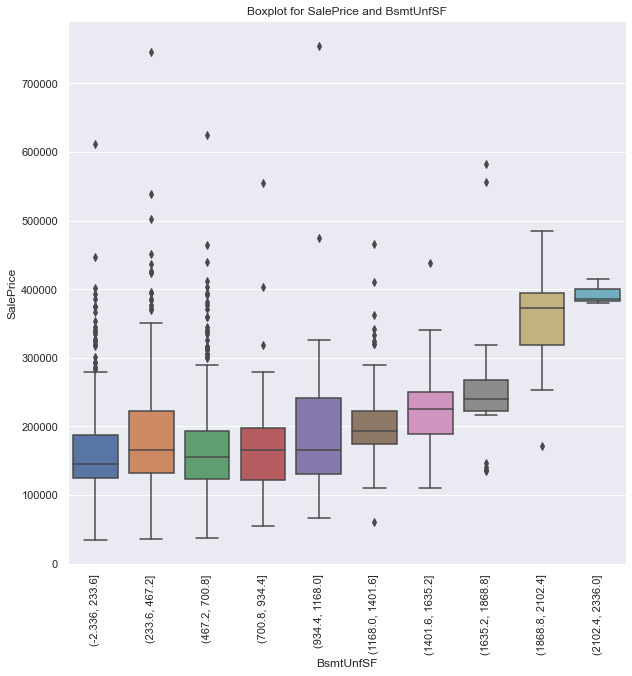

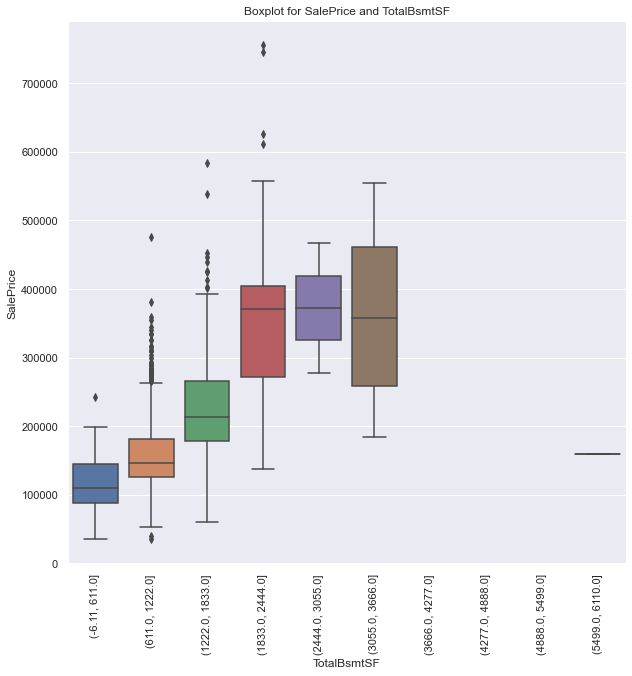

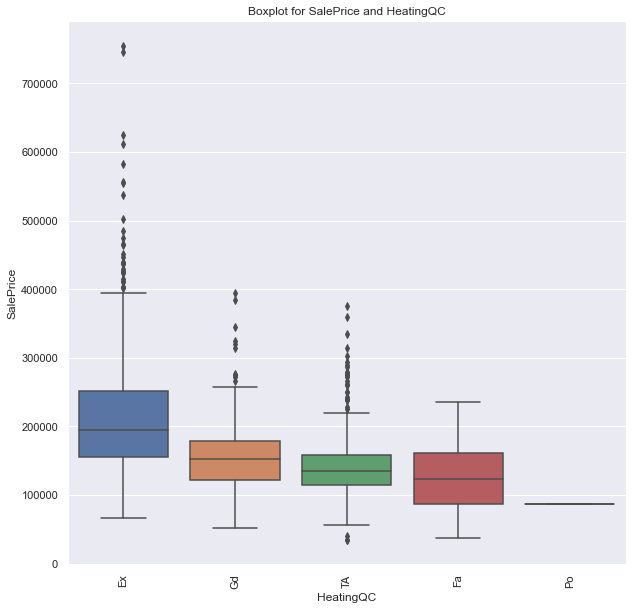

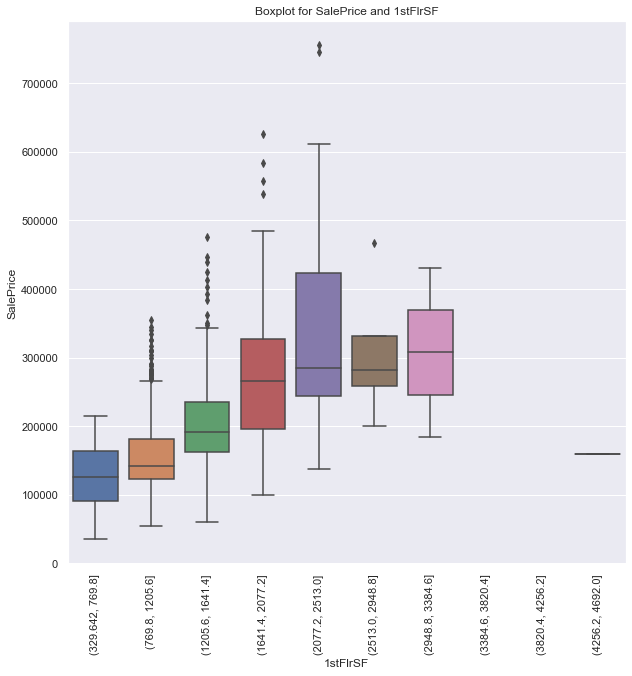

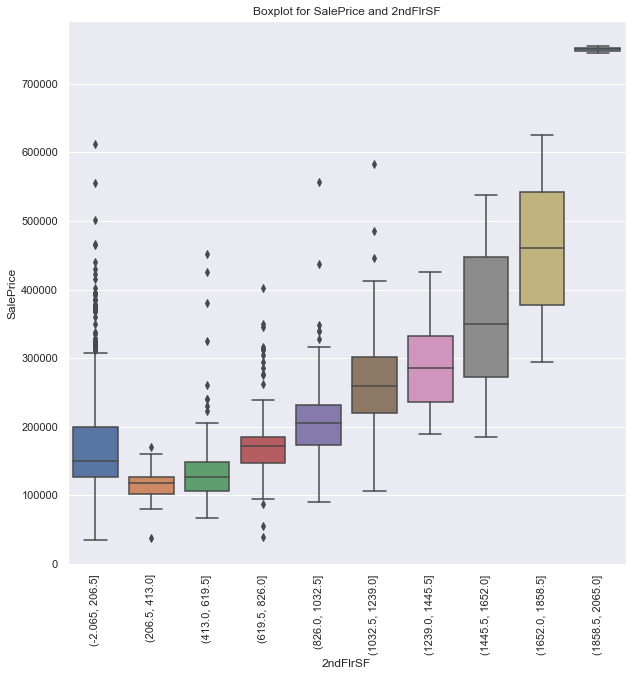

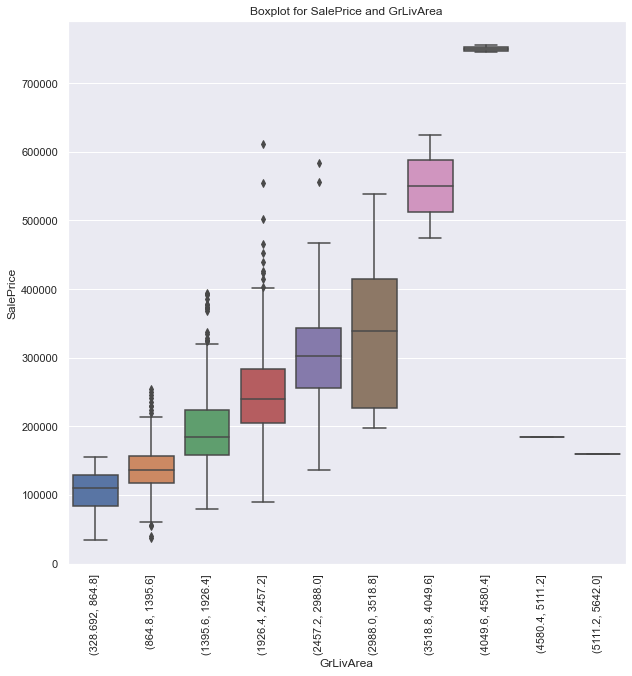

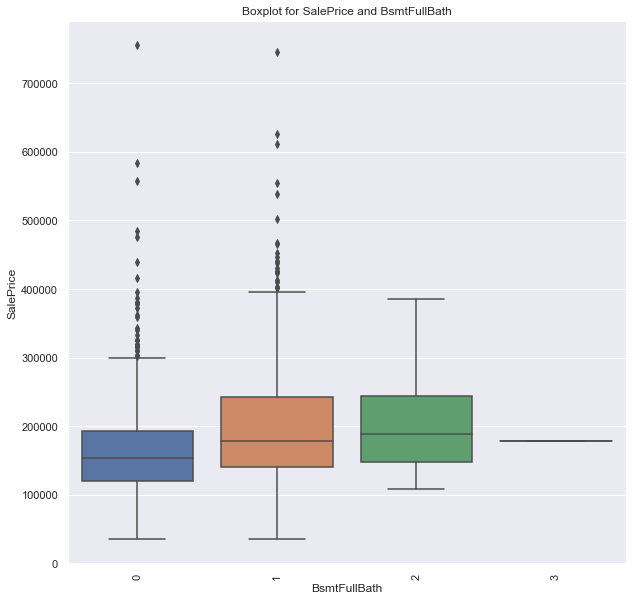

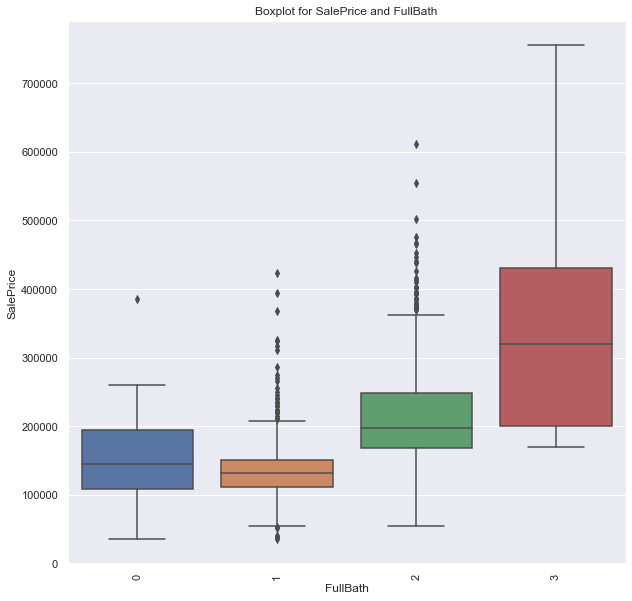

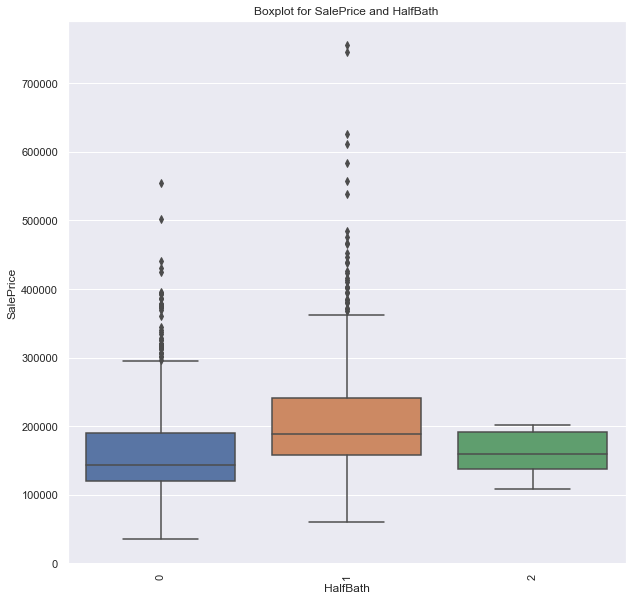

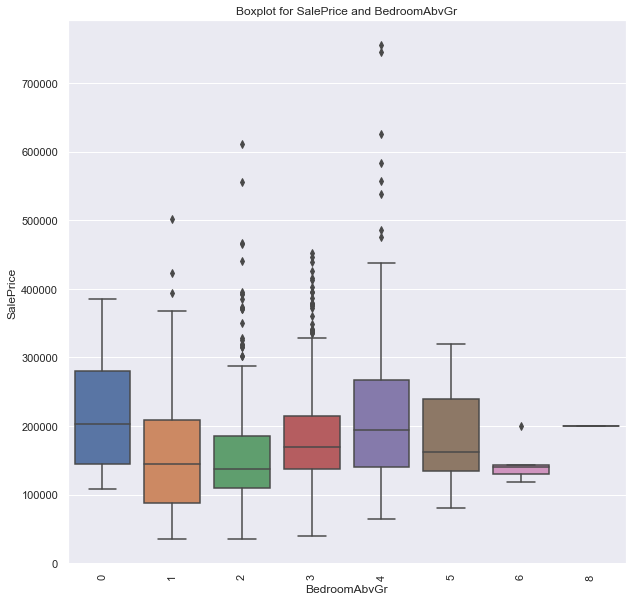

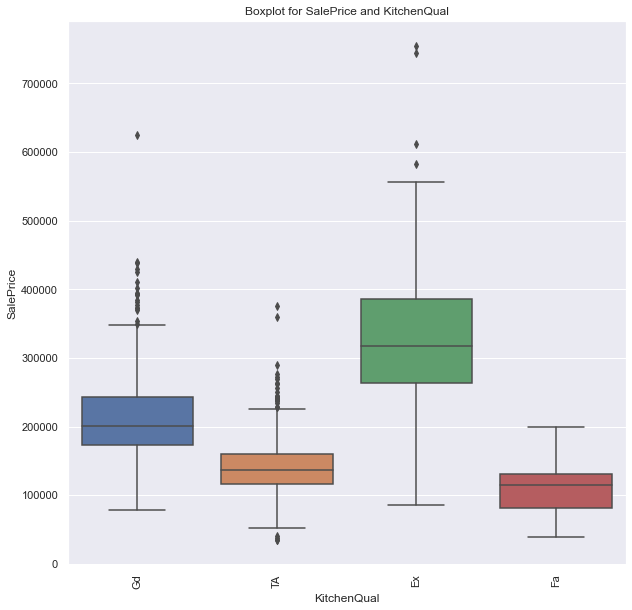

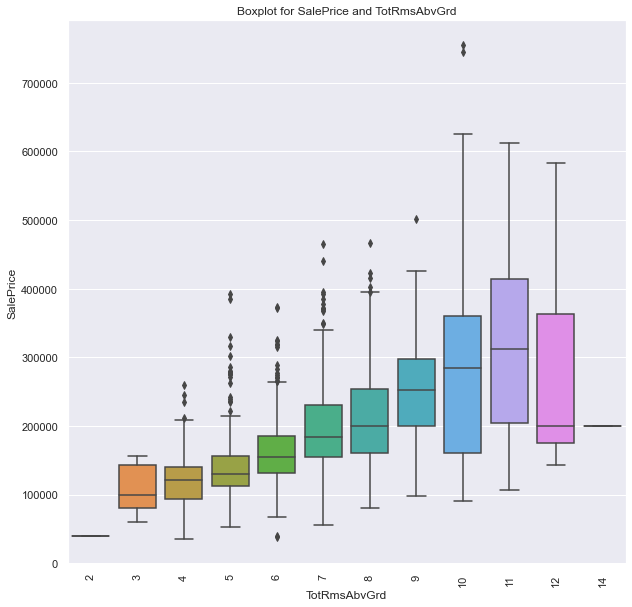

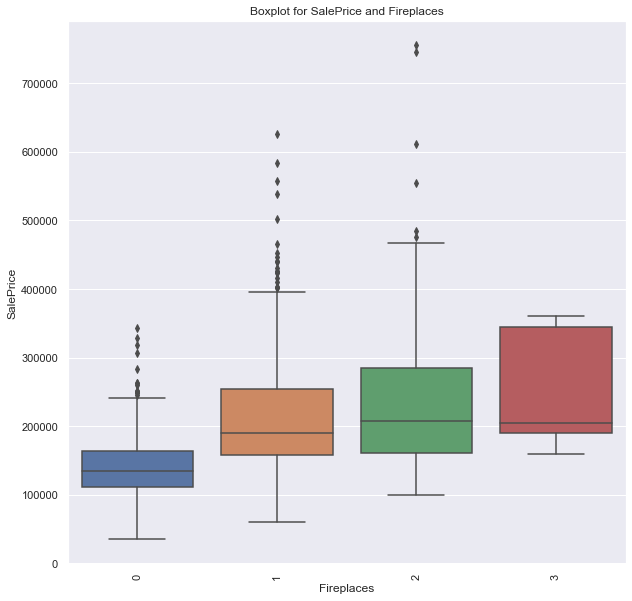

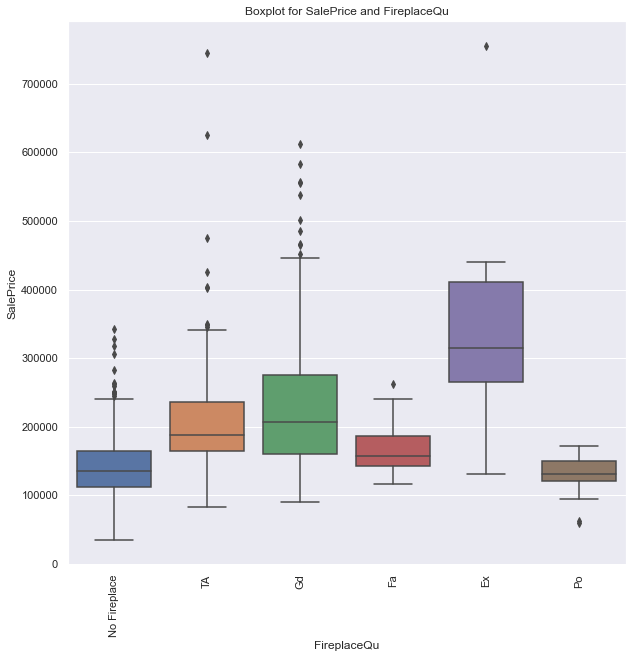

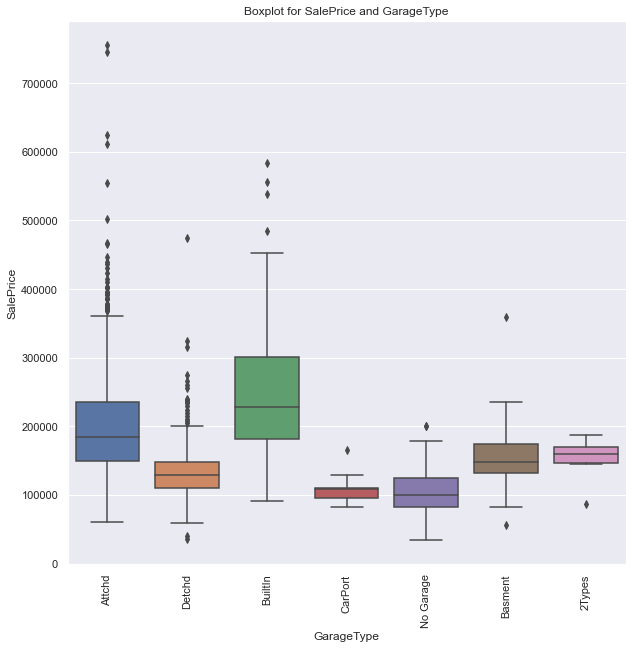

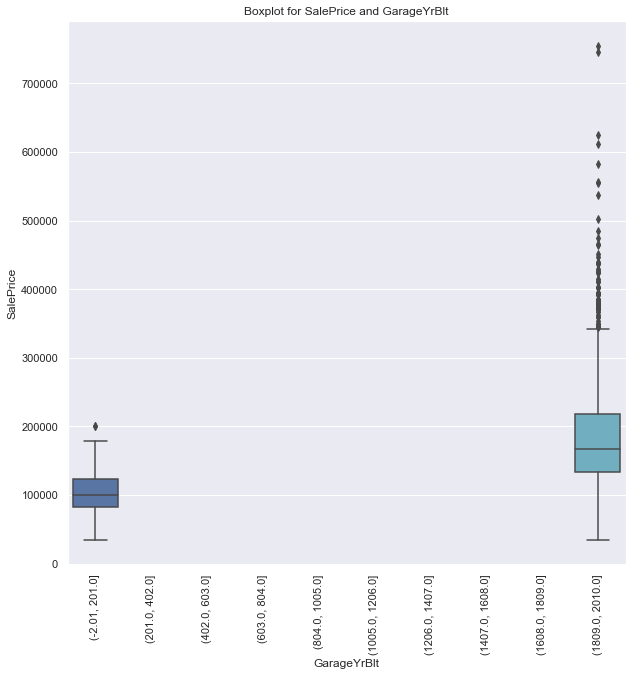

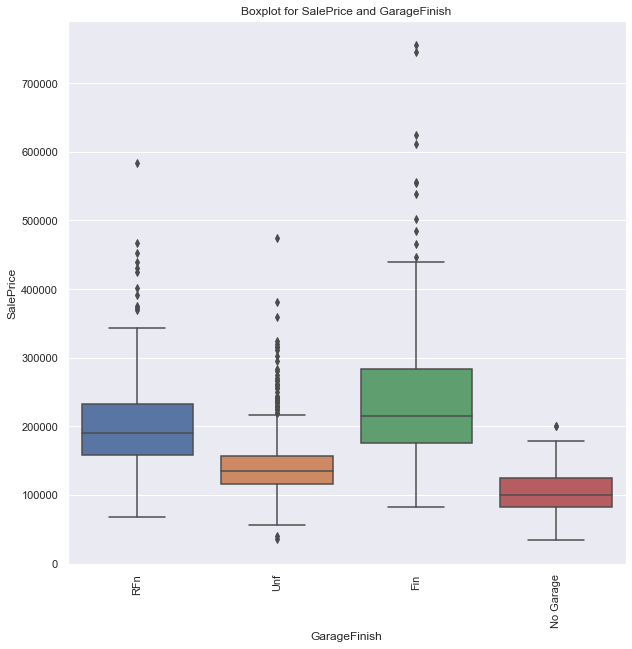

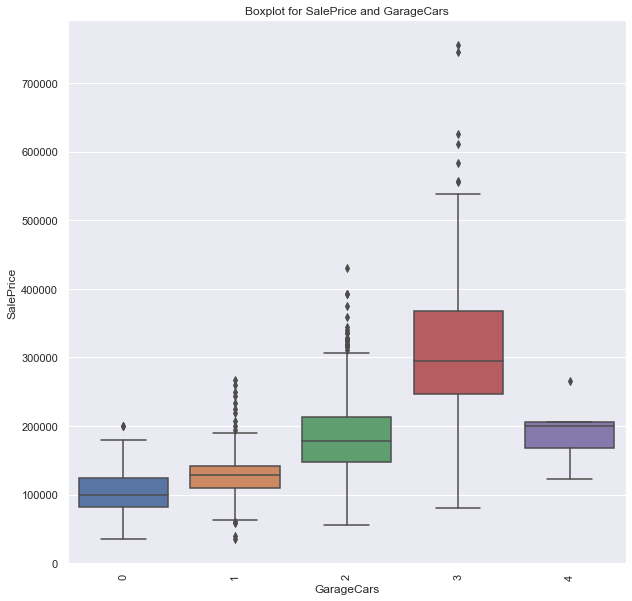

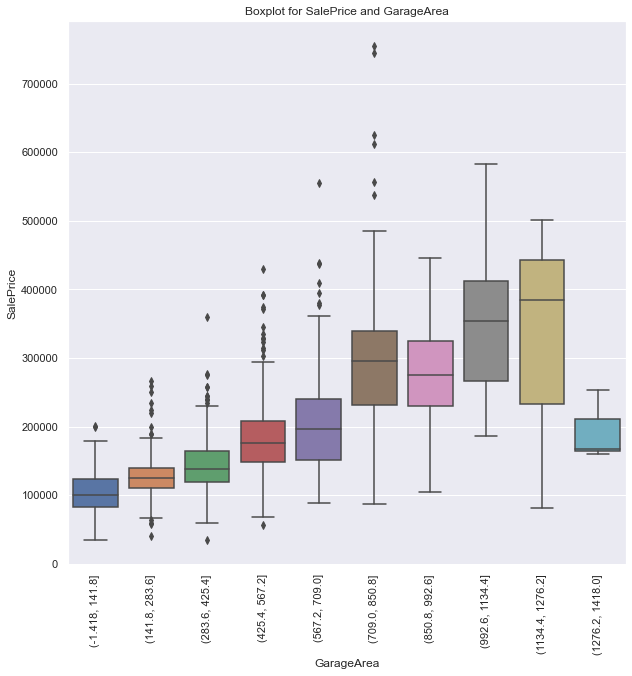

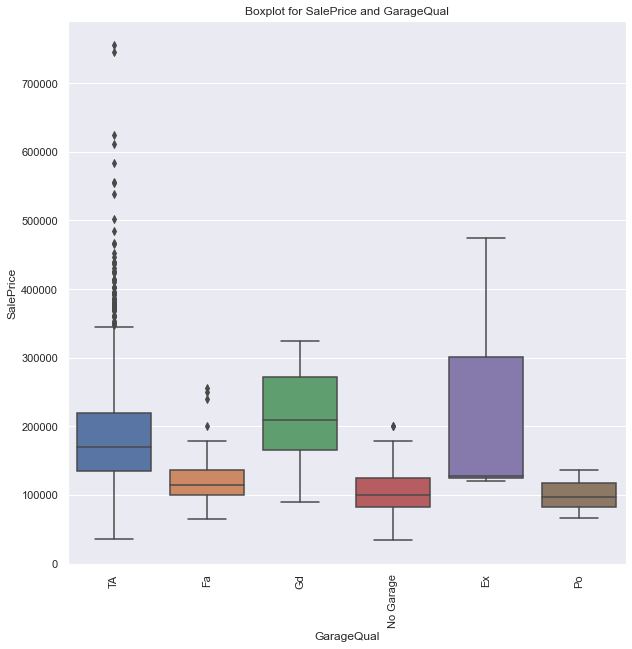

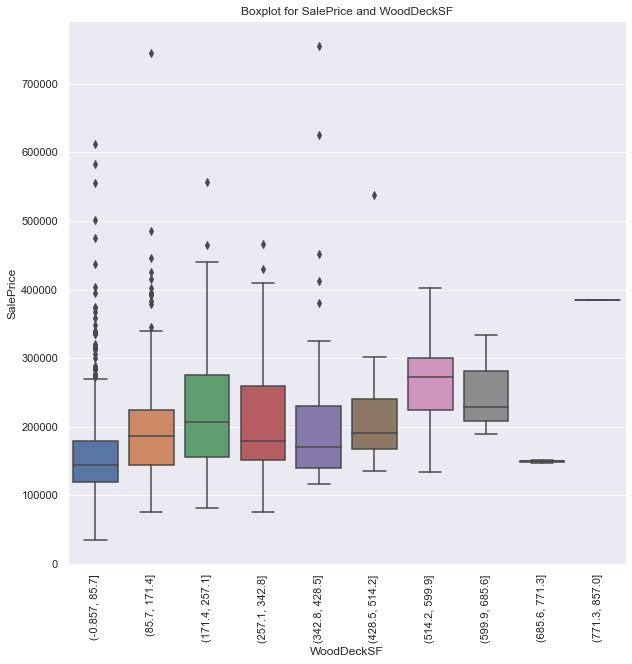

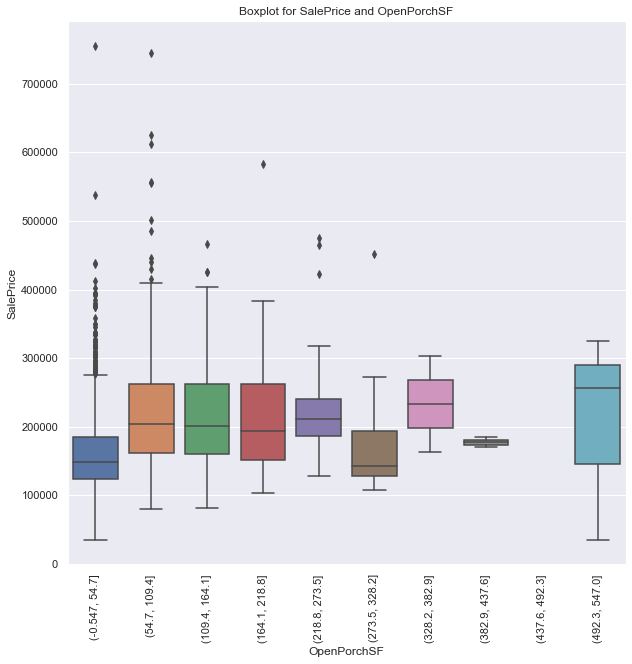

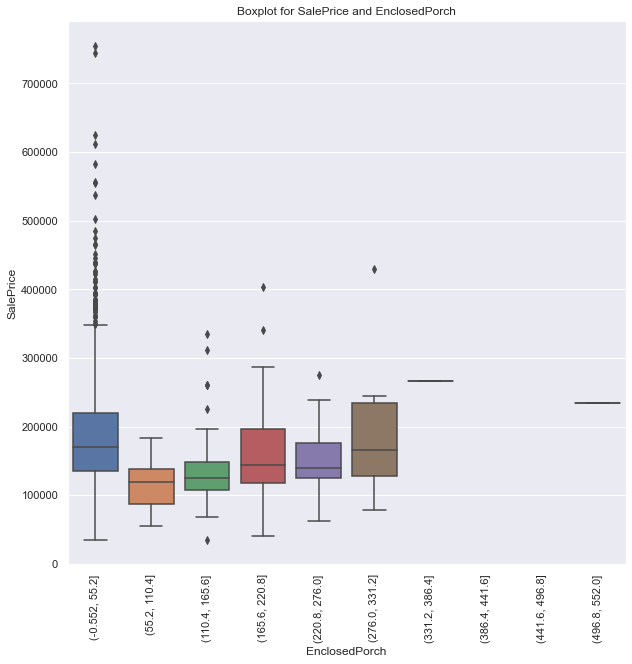

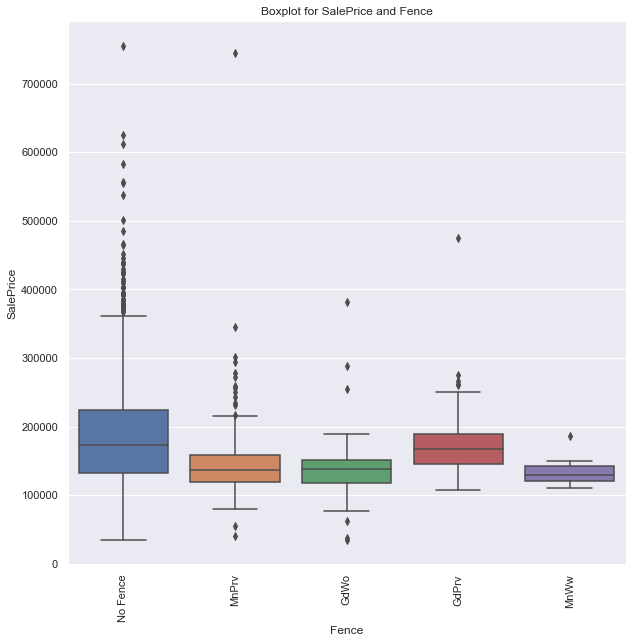

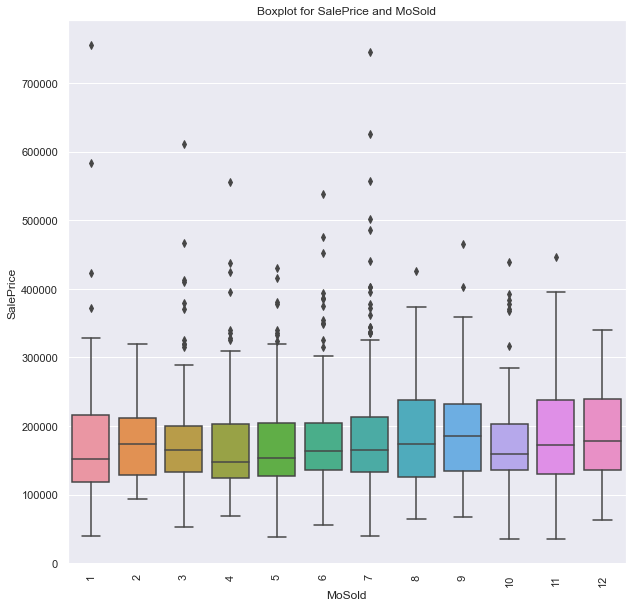

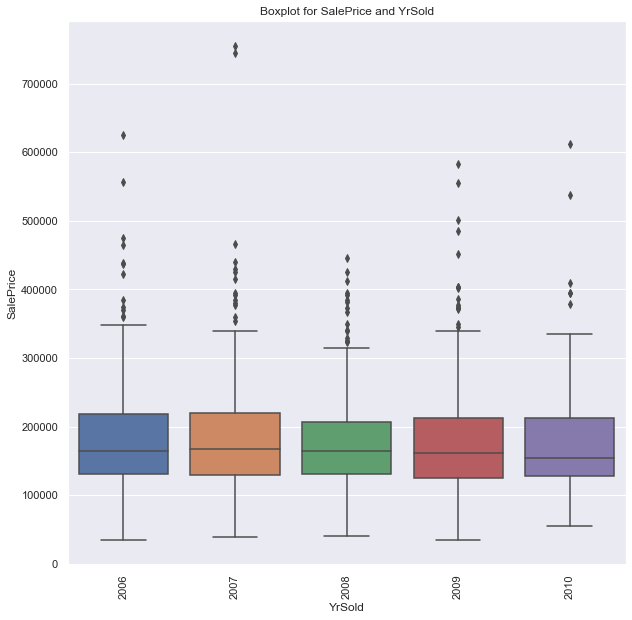

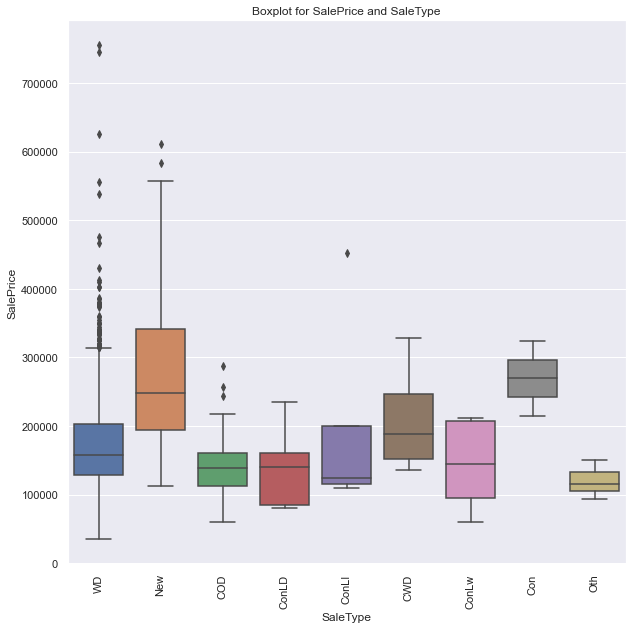

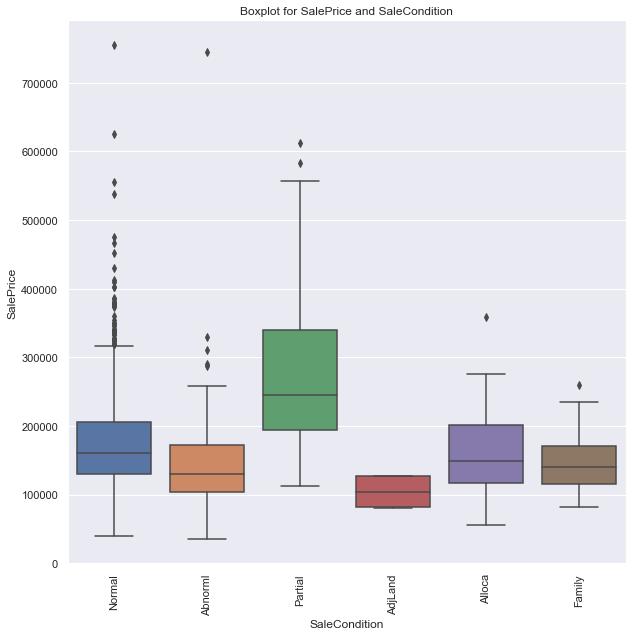

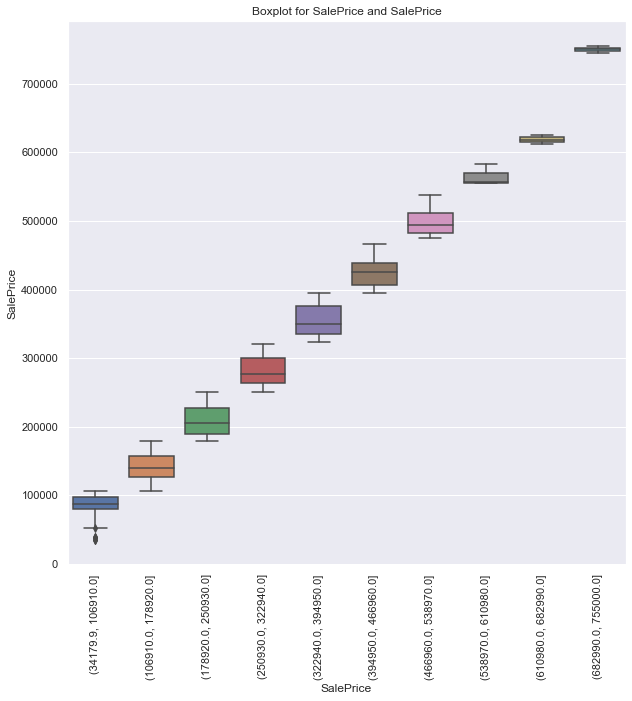

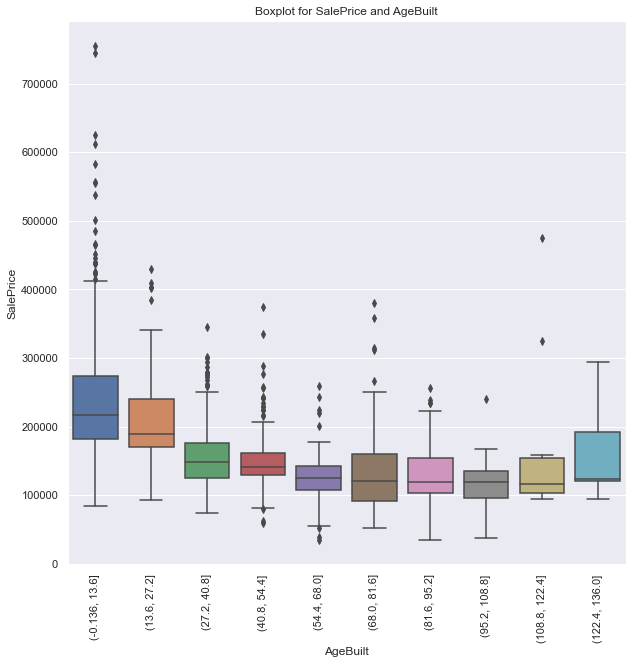

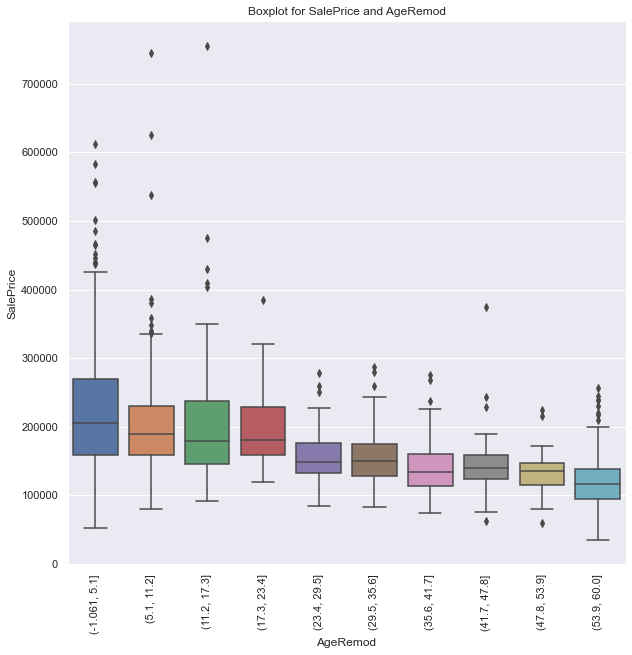

In [40]:
# Iterate through each column
for col in housing_data.columns:
    # Check if the column is continuous
    if col in cont_cols:
        plot_box_conti(housing_data, col)
    # Check if the column is categorical
    elif col in cat_cols:
        plot_box_cat(housing_data, col)

* LotFrontage - As LotFrontage in increases from [20.7 to 196.2] the SalePrice **increases**
* LotArea - As LotArea in increases from [1086 to 65483] the SalePrice **increases**
* MasVnrArea - As MasVnrArea in increases from [0 to 1280] the SalePrice **increases**
* BsmtFinSF1 - As BsmtFinSF1 in increases from [0 to 2257] the SalePrice **increases**
* BsmtFinSF2 - As BsmtFinSF2 in increases thier is not much effect on SalePrice
* BsmtUnfSF - As BsmtUnfSF in increases from [1168 to 2336] the SalePrice **increases**
* TotalBsmtSF - As TotalBsmtSF in increases from [0 to 3666] the SalePrice **increases**
* 1stFlrSF - As 1stFlrSF in increases from [329.64 to 3384] the SalePrice **increases**
* 2ndFlrSF - As 2ndFlrSF in increases from [206.5 to 1858] the SalePrice **increases**
* GrLivArea - As GrLivArea in increases from [328 to 4480] the SalePrice **increases**
* GarageYrBlt - As GarageYrBlt in increases thier is not much effect on SalePrice
* GarageArea - As GarageArea in increases from [0 to 1276] the SalePrice **increases**
* WoodDeckSF - As WoodDeckSF in increases from [0 to 685] the SalePrice **increases**
* OpenPorchSF - As OpenPorchSF in increases thier is not much effect on SalePrice
* EnclosedPorch - As EnclosedPorch in increases thier is not much effect on SalePrice
* AgeBuilt - As AgeBuilt in increases from [0 to 81] the SalePrice **decreases** and from [81 to 136] the SalePrice slightly **increases**
* AgeRemod - As AgeRemod in increases from [0 to 60] the SalePrice **decreases**

## Correlation Matrix

In [41]:

# Calculate the absolute correlation coefficients between 'SalePrice' and all other columns
correlation_with_saleprice = abs(housing_data.corr()['SalePrice'])

# Sort the correlation coefficients in ascending order
sorted_correlation = correlation_with_saleprice.sort_values()

# Display the sorted correlation coefficients
print(sorted_correlation)

BsmtFinSF2       0.011378
YrSold           0.028923
MoSold           0.046432
OverallCond      0.077856
MSSubClass       0.084284
EnclosedPorch    0.128578
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
GarageYrBlt      0.261366
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.334771
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.472614
AgeRemod         0.509079
AgeBuilt         0.523350
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64


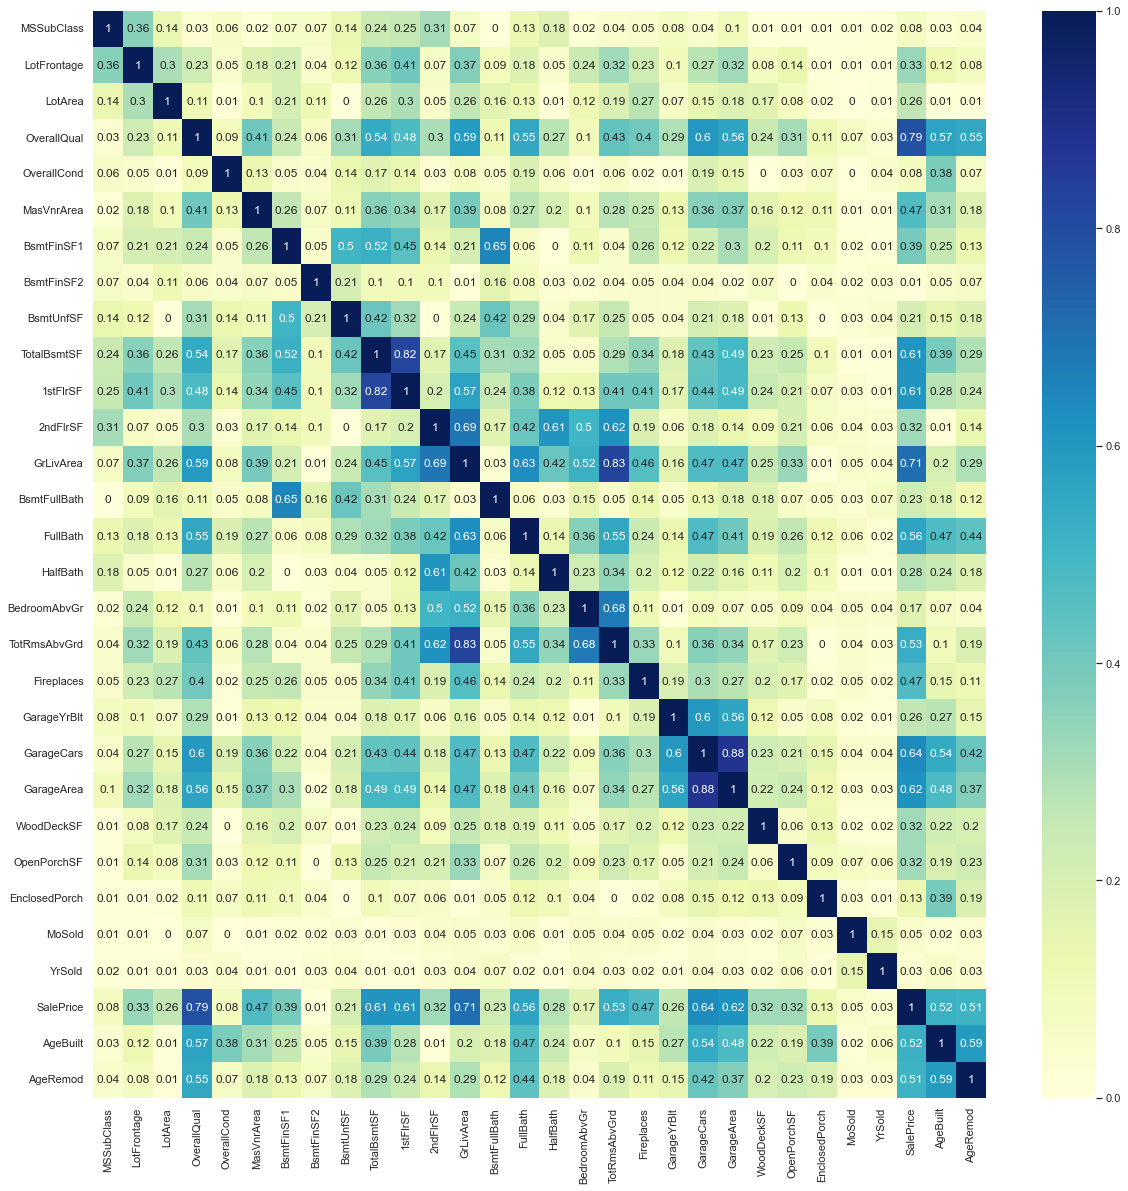

In [42]:
plt.figure(figsize=(20, 20))
sns.heatmap(data=abs(round(housing_data.corr(), 2)), annot=True, cmap="YlGnBu")
plt.show()

***GarageArea, GrLivArea, TotalBsmtSF and BsmtFullBath** have high correlation with other variables and hence dropping these variables 

In [43]:
# Drop specified columns from the DataFrame 'housing'
housing_data.drop(["GarageArea", "GrLivArea", "TotalBsmtSF", "BsmtFullBath"], axis=1, inplace=True)


In [44]:
cont_cols = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","1stFlrSF","2ndFlrSF","GarageYrBlt","WoodDeckSF","OpenPorchSF","EnclosedPorch","SalePrice","AgeBuilt","AgeRemod"]
cat_cols = ["MSSubClass","MSZoning","LotShape","LandContour","LotConfig","Neighborhood","Condition1","BldgType","HouseStyle","OverallQual","OverallCond","RoofStyle","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","HeatingQC","FullBath","HalfBath","BedroomAbvGr","KitchenQual","TotRmsAbvGrd","Fireplaces","FireplaceQu","GarageType","GarageFinish","GarageCars","GarageQual","Fence","MoSold","YrSold","SaleType","SaleCondition"]

## Outlier Removal

In [45]:
def remove_outliers_df(dataframe, cols):
    outlier_df = dataframe.copy()  # Make a copy of the dataframe
    for col in cols:
        Q1 = np.percentile(dataframe[col], 25, interpolation='midpoint')  # First Quartile 25%
        Q3 = np.percentile(dataframe[col], 75, interpolation='midpoint')  # Third Quartile 75%
        IQR = Q3 - Q1  # Interquartile range
        # Determine the upper and lower bounds for outlier detection
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Remove outliers from the dataframe
        outlier_df = outlier_df[(outlier_df[col] >= lower_bound) & (outlier_df[col] <= upper_bound)]
        print("Removing outliers for", col)
    return outlier_df

def remove_outliers_series(series):
    outlier_series = series.copy()  # Make a copy of the series
    Q1 = np.percentile(series, 25, interpolation='midpoint')  # First Quartile 25%
    Q3 = np.percentile(series, 75, interpolation='midpoint')  # Third Quartile 75%
    IQR = Q3 - Q1  # Interquartile range
    # Determine the upper and lower bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Remove outliers from the series
    outlier_series = outlier_series[(outlier_series >= lower_bound) & (outlier_series <= upper_bound)]
    print("Removing outliers")
    return outlier_series

In [46]:
#kepping the outliers as we have too little data
#housing = remove_outliers_df(housing,cont_cols)

In [47]:
housing_data

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0             60       RL           65     8450      Reg         Lvl   
1             20       RL           80     9600      Reg         Lvl   
2             60       RL           68    11250      IR1         Lvl   
3             70       RL           60     9550      IR1         Lvl   
4             60       RL           84    14260      IR1         Lvl   
...          ...      ...          ...      ...      ...         ...   
1455          60       RL           62     7917      Reg         Lvl   
1456          20       RL           85    13175      Reg         Lvl   
1457          70       RL           66     9042      Reg         Lvl   
1458          20       RL           68     9717      Reg         Lvl   
1459          20       RL           75     9937      Reg         Lvl   

     LotConfig Neighborhood Condition1 BldgType  ... OpenPorchSF  \
0       Inside      CollgCr       Norm     1Fam  ...          61   
1          FR2      Veenker      Feedr     1Fam  ...           0   
2       Inside      CollgCr       Norm     1Fam  ...          42   
3       Corner      Crawfor       Norm     1Fam  ...          35   
4          FR2      NoRidge       Norm     1Fam  ...          84   
...        ...          ...        ...      ...  ...         ...   
1455    Inside      Gilbert       Norm     1Fam  ...          40   
1456    Inside       NWAmes       Norm     1Fam  ...           0   
1457    Inside      Crawfor       Norm     1Fam  ...          60   
1458    Inside        NAmes       Norm     1Fam  ...           0   
1459    Inside      Edwards       Norm     1Fam  ...          68   

      EnclosedPorch     Fence MoSold YrSold SaleType SaleCondition  SalePrice  \
0                 0  No Fence      2   2008       WD        Normal     208500   
1                 0  No Fence      5   2007       WD        Normal     181500   
2                 0  No Fence      9   2008       WD        Normal     223500   
3               272  No Fence      2   2006       WD       Abnorml     140000   
4                 0  No Fence     12   2008       WD        Normal     250000   
...             ...       ...    ...    ...      ...           ...        ...   
1455              0  No Fence      8   2007       WD        Normal     175000   
1456              0     MnPrv      2   2010       WD        Normal     210000   
1457              0     GdPrv      5   2010       WD        Normal     266500   
1458            112  No Fence      4   2010       WD        Normal     142125   
1459              0  No Fence      6   2008       WD        Normal     147500   

     AgeBuilt AgeRemod  
0           5        5  
1          31       31  
2           7        6  
3          91       36  
4           8        8  
...       ...      ...  
1455        8        7  
1456       32       22  
1457       69        4  
1458       60       14  
1459       43       43  

[1460 rows x 55 columns]

In [48]:
# subset all categorical variables
housing_data[cat_cols].head()

MSSubClass MSZoning LotShape LandContour LotConfig Neighborhood Condition1  \
0          60       RL      Reg         Lvl    Inside      CollgCr       Norm   
1          20       RL      Reg         Lvl       FR2      Veenker      Feedr   
2          60       RL      IR1         Lvl    Inside      CollgCr       Norm   
3          70       RL      IR1         Lvl    Corner      Crawfor       Norm   
4          60       RL      IR1         Lvl       FR2      NoRidge       Norm   

  BldgType HouseStyle  OverallQual  ...   FireplaceQu GarageType GarageFinish  \
0     1Fam     2Story            7  ...  No Fireplace     Attchd          RFn   
1     1Fam     1Story            6  ...            TA     Attchd          RFn   
2     1Fam     2Story            7  ...            TA     Attchd          RFn   
3     1Fam     2Story            7  ...            Gd     Detchd          Unf   
4     1Fam     2Story            8  ...            TA     Attchd          RFn   

  GarageCars GarageQual     Fence MoSold YrSold SaleType SaleCondition  
0          2         TA  No Fence      2   2008       WD        Normal  
1          2         TA  No Fence      5   2007       WD        Normal  
2          2         TA  No Fence      9   2008       WD        Normal  
3          3         TA  No Fence      2   2006       WD       Abnorml  
4          3         TA  No Fence     12   2008       WD        Normal  

[5 rows x 40 columns]

In [49]:
# Convert categorical variables into dummy variables using one-hot encoding
housing_data = pd.get_dummies(housing_data, columns=cat_cols, drop_first=True)

In [50]:
print(housing_data.columns)

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GarageYrBlt', 'WoodDeckSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=265)


In [51]:
housing_data.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0           65     8450         196         706           0        150   
1           80     9600           0         978           0        284   
2           68    11250         162         486           0        434   
3           60     9550           0         216           0        540   
4           84    14260         350         655           0        490   

   1stFlrSF  2ndFlrSF  GarageYrBlt  WoodDeckSF  ...  SaleType_ConLI  \
0       856       854         2003           0  ...               0   
1      1262         0         1976         298  ...               0   
2       920       866         2001           0  ...               0   
3       961       756         1998           0  ...               0   
4      1145      1053         2000         192  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 265 columns]

In [52]:
# Identify categorical columns
cat_cols = housing_data.select_dtypes(include=['object']).columns

# One-hot encode categorical variables
housing_data_encoded = pd.get_dummies(housing_data, columns=cat_cols, drop_first=True)

In [53]:
from sklearn.preprocessing import OneHotEncoder
# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
housing_encoded = pd.DataFrame(encoder.fit_transform(housing_data[cat_cols]))
housing_encoded.columns = encoder.get_feature_names(cat_cols)

# Concatenate the one-hot encoded dataframe with the original dataframe
housing_data_encoded = pd.concat([housing_data.drop(columns=cat_cols), housing_encoded], axis=1)

# Split data into X and y
X = housing_data_encoded.drop("SalePrice", axis=1)
y = housing_data_encoded["SalePrice"]

In [54]:
X.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0           65     8450         196         706           0        150   
1           80     9600           0         978           0        284   
2           68    11250         162         486           0        434   
3           60     9550           0         216           0        540   
4           84    14260         350         655           0        490   

   1stFlrSF  2ndFlrSF  GarageYrBlt  WoodDeckSF  ...  SaleType_ConLI  \
0       856       854         2003           0  ...               0   
1      1262         0         1976         298  ...               0   
2       920       866         2001           0  ...               0   
3       961       756         1998           0  ...               0   
4      1145      1053         2000         192  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 264 columns]

In [55]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

## Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [56]:
# Splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size=0.3, 
                                                    random_state=100)

## Initial linear regression model with all variables and without scalling

In [57]:
# Instantiate a Linear Regression model
lm = LinearRegression()

# Fit the Linear Regression model to the training data
lm.fit(X_train, y_train)

LinearRegression()

In [58]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

165204.6348574928
[-1.36511436e+02  4.46380940e-01  7.47725563e+00 -4.29586799e+00
  6.37303280e+00 -8.02296271e+00  5.12476641e+01  6.18454257e+01
 -5.90163799e+01  1.06912646e+01  4.39379454e+00  1.05390918e+01
 -2.28235913e+02 -1.11328167e+02 -3.32337926e+03 -1.49210461e+04
 -6.34571179e+02 -6.47828543e+03 -1.41461503e+04 -9.00812249e+03
 -9.73436829e+03  3.93338682e+03 -1.53087729e+04 -1.08399210e+04
 -1.99700290e+04 -3.20107854e+04 -1.57787036e+04 -1.11647835e+04
  2.49361124e+04  2.87563462e+04  3.25453069e+04  3.10946032e+04
  1.82620300e+03 -7.83444088e+03  2.95736413e+03  1.50789321e+04
  1.92466444e+04  1.75170880e+04  7.65904950e+03 -1.18195848e+04
 -8.51105569e+03 -2.18148701e+03  7.04332196e+03  9.60714296e+03
  1.20408637e+04  2.44517581e+04  1.55327535e+04  4.45927049e+04
 -6.02251942e+03  1.84313231e+04  5.87851096e+03  7.00216217e+02
  2.74553456e+03  9.32677440e+03  1.83746579e+04  1.03912460e+04
  5.15450580e+04  4.01363894e+04  1.80847123e+03  1.30647259e+04
  8.915

In [59]:
# Calculate predictions for the training and testing sets
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

# Initialize a list to store metrics
metric = []

# Calculate R-squared for training set
r2_train_lr = r2_score(y_train, y_pred_train)
print("R-squared (Training):", r2_train_lr)
metric.append(r2_train_lr)

# Calculate R-squared for testing set
r2_test_lr = r2_score(y_test, y_pred_test)
print("R-squared (Testing):", r2_test_lr)
metric.append(r2_test_lr)

# Calculate Residual Sum of Squares (RSS) for training set
rss_train_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS (Training):", rss_train_lr)
metric.append(rss_train_lr)

# Calculate Residual Sum of Squares (RSS) for testing set
rss_test_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS (Testing):", rss_test_lr)
metric.append(rss_test_lr)

# Calculate Root Mean Squared Error (RMSE) for training set
rmse_train_lr = mean_squared_error(y_train, y_pred_train, squared=False)
print("RMSE (Training):", rmse_train_lr)
metric.append(rmse_train_lr)

# Calculate Root Mean Squared Error (RMSE) for testing set
rmse_test_lr = mean_squared_error(y_test, y_pred_test, squared=False)
print("RMSE (Testing):", rmse_test_lr)
metric.append(rmse_test_lr)

# The metric list now contains the calculated metrics
print("All Metrics:", metric)

R-squared (Training): 0.9163704216081965
R-squared (Testing): 0.8382765959741092
RSS (Training): 533615150445.3542
RSS (Testing): 455851785378.68567
RMSE (Training): 22861.314844097105
RMSE (Testing): 32260.773407725042
All Metrics: [0.9163704216081965, 0.8382765959741092, 533615150445.3542, 455851785378.68567, 22861.314844097105, 32260.773407725042]


## Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use StandardScaler

In [60]:
for col in X_train.columns:
    if X_train[col].max() > 1 or X_train[col].min() < 0:
        print(col, "----", X_train[col].min(), '||', X_train[col].max())


LotFrontage ---- 21 || 313
LotArea ---- 1477 || 215245
MasVnrArea ---- 0 || 1600
BsmtFinSF1 ---- 0 || 5644
BsmtFinSF2 ---- 0 || 1474
BsmtUnfSF ---- 0 || 2336
1stFlrSF ---- 372 || 4692
2ndFlrSF ---- 0 || 2065
GarageYrBlt ---- 0 || 2010
WoodDeckSF ---- 0 || 857
OpenPorchSF ---- 0 || 523
EnclosedPorch ---- 0 || 552
AgeBuilt ---- 0 || 136
AgeRemod ---- -1 || 60


In [61]:
for col in X_train.columns:
    if X_train[col].max() > 1 or X_train[col].min() <0:
        print('"',col,'",',end="",sep="")

"LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","1stFlrSF","2ndFlrSF","GarageYrBlt","WoodDeckSF","OpenPorchSF","EnclosedPorch","AgeBuilt","AgeRemod",

In [62]:
scalerCol = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","1stFlrSF","2ndFlrSF","GarageYrBlt","WoodDeckSF","OpenPorchSF","EnclosedPorch","AgeBuilt","AgeRemod"]

In [63]:
scalerX = StandardScaler()
scalery = StandardScaler()

In [64]:
# scaling the features - necessary before using Ridge or Lasso
# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
X_train[scalerCol] = scalerX.fit_transform(X_train[scalerCol])

In [65]:
y_train

210      98000
318     260000
239     113000
986     117000
1416    122500
         ...  
1009    102000
802     189000
53      385000
350     318061
79      110000
Name: SalePrice, Length: 1021, dtype: int64

In [66]:
y_train = pd.DataFrame(y_train)

In [67]:
y_train

SalePrice
210       98000
318      260000
239      113000
986      117000
1416     122500
...         ...
1009     102000
802      189000
53       385000
350      318061
79       110000

[1021 rows x 1 columns]

In [68]:
y_train.SalePrice = scalery.fit_transform(y_train)

In [69]:
y_train = y_train.SalePrice

In [70]:
y_train

210    -1.042855
318     1.006390
239    -0.853110
986    -0.802511
1416   -0.732938
          ...   
1009   -0.992256
802     0.108264
53      2.587597
350     1.740841
79     -0.891059
Name: SalePrice, Length: 1021, dtype: float64

In [71]:
X_test[scalerCol] = scalerX.transform(X_test[scalerCol])

In [72]:
y_test = pd.DataFrame(y_test)

In [73]:
y_test.SalePrice = scalery.transform(y_test)

In [74]:
y_test = y_test.SalePrice

In [75]:
X_train

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
210     -0.115302 -0.473765   -0.558025    0.043512   -0.293313  -0.374367   
318      0.926898 -0.056845    0.809137    1.160345   -0.293313  -0.454644   
239     -0.794998 -0.169324   -0.558025   -0.761296   -0.293313   0.171964   
986     -0.477806 -0.502297   -0.558025   -0.963574   -0.293313  -0.175904   
1416    -0.432493  0.082905   -0.558025   -0.963574   -0.293313   0.475233   
...           ...       ...         ...         ...         ...        ...   
1009    -0.432493 -0.435334   -0.558025   -0.963574   -0.293313   0.990346   
802     -0.296554 -0.221924   -0.558025    0.430853   -0.293313  -1.079023   
53      -0.069989  3.861098   -0.558025    2.931352   -0.293313  -1.186059   
350     -0.069989 -0.258706    1.375227   -0.963574   -0.293313   2.910309   
79      -0.432493 -0.004439   -0.558025   -0.963574   -0.293313  -0.276251   

      1stFlrSF  2ndFlrSF  GarageYrBlt  WoodDeckSF  ...  SaleType_ConLI  \
210  -0.765065 -0.787597    -4.069183   -0.743160  ...               0   
318   0.511914  2.140556     0.276109    1.989482  ...               0   
239  -0.930972  0.795996     0.180177   -0.743160  ...               0   
986  -0.420683  0.669584     0.182357    2.423490  ...               0   
1416  0.195183  1.611926     0.228143   -0.743160  ...               0   
...        ...       ...          ...         ...  ...             ...   
1009 -0.403087 -0.787597    -4.069183   -0.743160  ...               0   
802  -1.106933  0.885633     0.302273   -0.453821  ...               0   
53    1.693370 -0.787597     0.249946    6.144704  ...               0   
350   1.761241 -0.787597     0.306633    0.944648  ...               0   
79   -1.222565  0.471923     0.217242   -0.148408  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
210                0             0             0            1   
318                0             0             0            1   
239                0             0             0            1   
986                0             0             0            1   
1416               0             0             0            1   
...              ...           ...           ...          ...   
1009               0             0             0            1   
802                0             0             0            1   
53                 0             0             0            1   
350                0             1             0            0   
79                 0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
210                       0                     0                     0   
318                       0                     0                     0   
239                       0                     0                     0   
986                       0                     0                     0   
1416                      0                     0                     0   
...                     ...                   ...                   ...   
1009                      0                     0                     0   
802                       0                     0                     0   
53                        0                     0                     0   
350                       0                     0                     0   
79                        0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
210                      1                      0  
318                      1                      0  
239                      1                      0  
986                      1                      0  
1416                     1                      0  
...                    ...                    ...  
1009                     1                      0  
802                      1                      0  
53                       1    

In [76]:
X_test

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1436    -0.432493 -0.144189   -0.558025    0.361992   -0.293313  -0.704396   
57       0.881585  0.112505   -0.558025   -0.963574   -0.293313   0.660317   
780     -0.296554 -0.253368   -0.355087   -0.963574   -0.293313   1.500998   
382      0.428455 -0.120412   -0.558025   -0.963574   -0.293313   0.836481   
1170     0.292515 -0.058786   -0.558025    0.159714   -0.293313   0.022559   
...           ...       ...         ...         ...         ...        ...   
509      0.473768 -0.085959    0.146918    1.168952   -0.293313  -1.145920   
555     -0.523119 -0.398455   -0.558025   -0.963574   -0.293313   0.956897   
399     -0.205928 -0.229106   -0.023977    0.783763   -0.293313  -0.633038   
545     -0.024676  0.325235    0.392580    1.192623    0.889608  -1.257417   
266      0.020637  0.069997   -0.558025    0.572878   -0.293313  -1.061183   

      1stFlrSF  2ndFlrSF  GarageYrBlt  WoodDeckSF  ...  SaleType_ConLI  \
1436 -0.765065 -0.787597     0.234684   -0.743160  ...               0   
57   -0.775120  1.189021     0.300092   -0.743160  ...               0   
780   0.212779 -0.787597     0.280470    1.025020  ...               0   
382  -0.576535  1.184425     0.304453    0.414194  ...               0   
1170 -0.126576 -0.787597     0.241225    0.888388  ...               0   
...        ...       ...          ...         ...  ...             ...   
509  -0.320133 -0.787597     0.201980    1.057169  ...               0   
555  -0.302537 -0.787597     0.121310   -0.743160  ...               0   
399  -0.141658  0.219099     0.306633   -0.743160  ...               0   
545   0.524482  1.064908     0.265208   -0.743160  ...               0   
266  -0.920917  0.841964     0.284830    0.020372  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1436               0             0             0            1   
57                 0             0             0            1   
780                0             0             0            1   
382                0             0             0            1   
1170               0             0             0            1   
...              ...           ...           ...          ...   
509                0             0             0            1   
555                0             0             0            1   
399                0             0             0            1   
545                0             0             0            1   
266                0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1436                      0                     0                     0   
57                        0                     0                     0   
780                       0                     0                     0   
382                       0                     0                     0   
1170                      0                     0                     0   
...                     ...                   ...                   ...   
509                       0                     0                     0   
555                       0                     0                     0   
399                       0                     0                     0   
545                       0                     0                     0   
266                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
1436                     1                      0  
57                       1                      0  
780                      1                      0  
382                      1                      0  
1170                     1                      0  
...                    ...                    ...  
509                      1                      0  
555                      1                      0  
399                      1    

In [77]:
y_train

210    -1.042855
318     1.006390
239    -0.853110
986    -0.802511
1416   -0.732938
          ...   
1009   -0.992256
802     0.108264
53      2.587597
350     1.740841
79     -0.891059
Name: SalePrice, Length: 1021, dtype: float64

In [78]:
y_test

1436   -0.758237
57      0.203137
780    -0.056181
382     0.418181
1170   -0.119430
          ...   
509    -0.707639
555    -0.853110
399     0.766046
545     0.614250
266     0.057665
Name: SalePrice, Length: 438, dtype: float64

## 3. Model Building and Evaluation

## Linear Regression

Let's now try predicting car prices, a dataset using linear regression.

In [79]:
def linearRegression(X_train, y_train):
    # Adding a constant variable 
    X_train_rfe = sm.add_constant(X_train)

    # Running the linear model
    lm = sm.OLS(y_train, X_train_rfe).fit()

    # Print the summary of the linear model
    print(lm.summary())
    
    print("*********************************************************\n")

    return X_train_rfe, lm

In [80]:

# # Instantiate a Linear Regression model
# lm = LinearRegression()

# # Fit the Linear Regression model on the training data
# X_train = X_train.to_frame()  # Convert X_train to DataFrame
# lm.fit(X_train, y_train.to_numpy().reshape(-1, 1))


# Iterate through different numbers of features
# for i in range(10, len(X_train.columns), 10):
#     # Instantiate RFE with the current number of features
#     rfe = RFE(lm, i)
    
#     # Run RFE
#     rfe = rfe.fit(X_train, y_train)
    
#     # Get the selected columns
#     col = X_train.columns[rfe.support_]
    
#     # Select the features in X_train
#     X_train_rfe = X_train[col]
    
#     # Fit a new Linear Regression model using selected features
#     rfelm = LinearRegression()
#     rfelm.fit(X_train_rfe, y_train)
    
#     # Predict the target variable on the training set using the model with selected features
#     y_pred_train_rfe = rfelm.predict(X_train_rfe)
    
#     # Calculate R-squared score for the model with selected features
#     r2_train_rfe = r2_score(y_train, y_pred_train_rfe)
    
#     # Print the number of features and the corresponding R-squared score
#     print(i, '--', r2_train_rfe)

In [81]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


We can see no significant increase in r2 values after 120 features

In [82]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

rfe = RFE(lm)# running RFE
rfe = rfe.fit(X_train, y_train)

In [83]:
col = X_train.columns[rfe.support_]

In [84]:
# Creating X_test dataframe with RFE selected variables
X_train = X_train[col]

In [85]:
X_train_rfe,lm = linearRegression(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     73.10
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:55:11   Log-Likelihood:                -258.74
No. Observations:                1021   AIC:                             749.5
Df Residuals:                     905   BIC:                             1321.
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [86]:
lm.params.sum()

3.2749642432545985

In [87]:
X_test_rfe = sm.add_constant(X_test[col])

In [88]:
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.902806006840669
0.8406230469825006
99.23506701567686
71.8842595519443
0.09719399315933092
0.16411931404553493


The model seems to be overfit as the r2 for the test data is less than the r2 for the training data

Lets use L1 and L2 regularizations to reduce the complexity and overfitting in the model

## Lets check for Linear Regrssion Assumptions are true or not

### Assumption of Normally Distributed Error Terms

Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

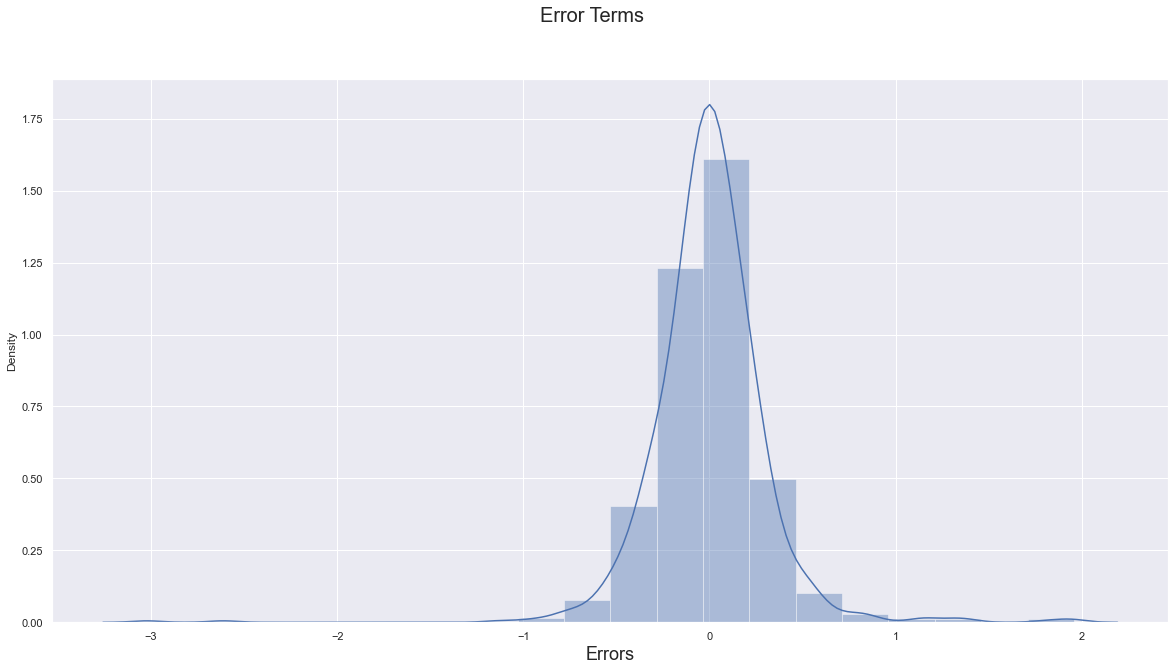

In [89]:
# Plot the histogram of the error terms
sns.set_theme(color_codes=True)
plt.figure(figsize=(20,10))
sns.distplot((y_train - y_pred_train), bins = 20)
plt.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()# X-label

### Assumption of Error Terms Being Independent

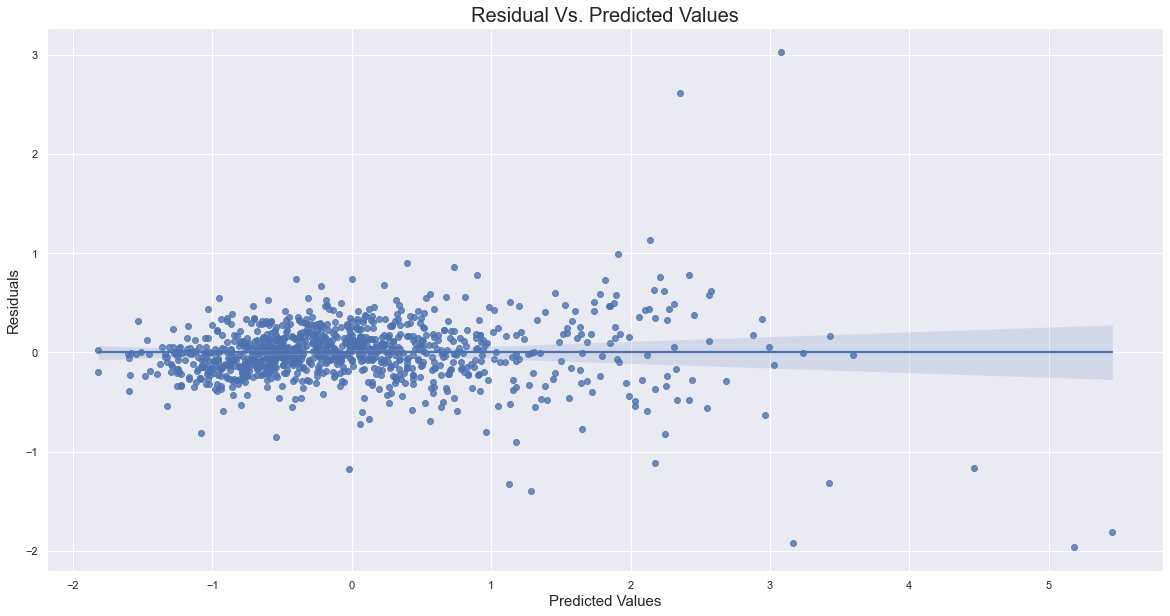

In [90]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(20,10))
sns.regplot(x=y_pred_train, y= y_pred_train - y_train)
plt.title('Residual Vs. Predicted Values', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

#### We can clearly see that as the predected values increase the residual error increases

### Homoscedasticity

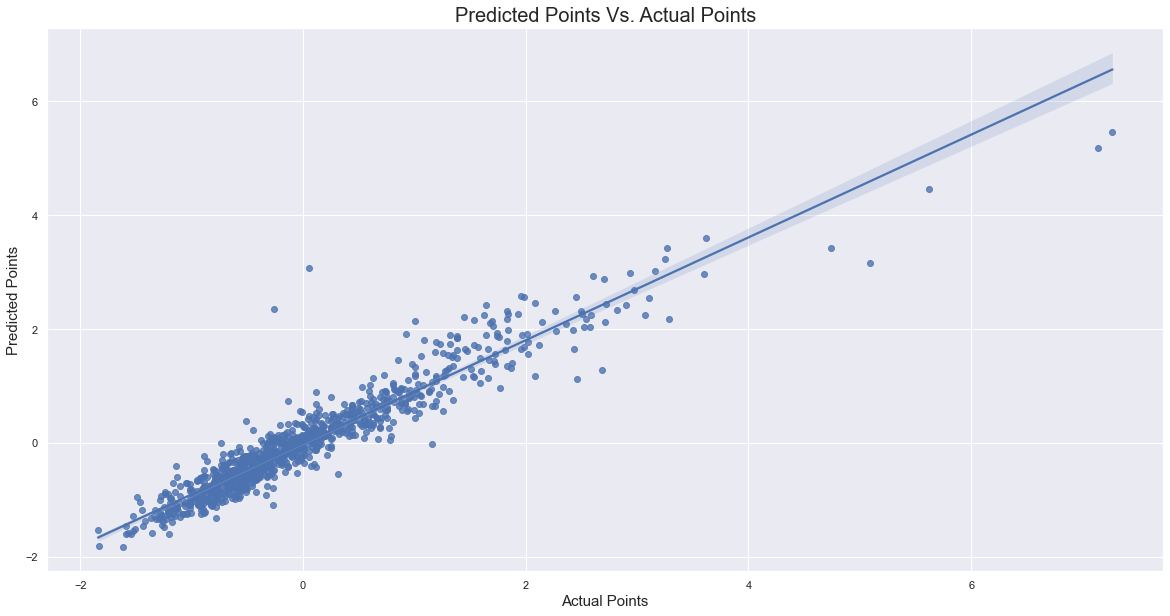

In [91]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(20,10))
sns.regplot(x=y_train, y=y_pred_train)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [92]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [93]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 6.0}


In [94]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 6.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)

Ridge(alpha=6.0)

In [95]:
print(ridge.coef_)

[ 0.          0.26206632  0.3085625  -0.00416399 -0.08649647 -0.08087167
 -0.11768152 -0.12949833 -0.08207451  0.10475552  0.0922427   0.14715015
  0.01475411  0.15355683  0.24401063  0.19649046  0.13462766  0.13180101
  0.2384386  -0.18815732  0.09191679  0.4703994   0.32399251  0.08443023
  0.26935865  0.24364531  0.15478178  0.1647866   0.1307488   0.15078327
  0.09944035 -0.08207451 -0.08087167  0.08331902  0.10096337 -0.07492381
 -0.08584231 -0.17831533 -0.22858129 -0.23636574 -0.1868086  -0.06256502
  0.17232863  0.48612544  0.44629146  0.040491   -0.1768994  -0.13182135
 -0.04361802  0.03306343  0.0898096   0.1325912   0.18265078 -0.0183936
  0.03214078 -0.00134325  0.11172551  0.05018502 -0.00526216  0.13871576
 -0.03469825 -0.04436666 -0.00526216 -0.03469825  0.         -0.05388887
 -0.23473453 -0.12514924  0.          0.10051947  0.0758511   0.04611713
 -0.30792626 -0.26612579 -0.12821624 -0.34526738  0.13577234 -0.12821624
 -0.12626724  0.16923055  0.29843937 -0.12821624 -0.

In [96]:
#sum of the coefficents
ridge.coef_.sum()

1.8867494959741986

lets look at the number of feature eliminated by making the coefficents 0

In [97]:
(ridge.coef_ != 0).sum()

130

In [98]:
len(ridge.coef_)

133

In [99]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8931599265610309
0.8528768334223922
109.0837149811874
66.35739793072517
0.10684007343896905
0.15150090851763737


## Lasso Regularization

In [100]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [101]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [102]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.001)

In [103]:
lasso.coef_

array([ 0.00000000e+00,  2.60468728e-01,  3.00038183e-01, -0.00000000e+00,
       -2.70073574e-02, -7.86293649e-02, -1.24632572e-01, -1.36534947e-01,
       -1.64813571e-02,  0.00000000e+00,  4.46672798e-02,  1.27585676e-01,
       -0.00000000e+00,  1.45674326e-01,  2.62346283e-01,  2.02736782e-01,
        1.50651512e-01,  1.34291906e-01,  2.82017076e-01, -1.85012498e-01,
        1.09254808e-01,  5.43915766e-01,  3.42110556e-01,  8.81188897e-02,
        3.50109675e-01,  2.65021217e-01,  1.53870469e-01,  1.51205494e-01,
        9.90127197e-02,  1.32406627e-01,  0.00000000e+00, -9.20476595e-02,
       -5.68597306e-02,  5.15930202e-03,  9.40866794e-02, -5.98364889e-02,
       -0.00000000e+00, -1.51280173e-02, -7.14932300e-02, -5.83561800e-02,
        0.00000000e+00,  1.42856864e-01,  4.00574665e-01,  8.39337562e-01,
        8.34227884e-01,  0.00000000e+00, -1.91457619e-01, -1.57671636e-01,
       -7.79861888e-02,  0.00000000e+00,  6.09618696e-02,  9.48488604e-02,
        1.20260359e-01, -

In [104]:
#sum of the coefficents
lasso.coef_.sum()

3.4955933253054394

lets look at the number of feature eliminated by making the coefficents 0

In [105]:
(lasso.coef_ != 0).sum()

89

In [106]:
len(lasso.coef_)

133

In [107]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8945308480167351
0.8521788957371617
107.6840041749135
66.67219083375352
0.10546915198326494
0.15221961377569296


In [108]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

round(final_metric,2).T

0                1            2           3  \
Metric             R2 Score (Train)  R2 Score (Test)  RSS (Train)  RSS (Test)   
Linear Regression               0.9             0.84        99.24       71.88   
Ridge Regression               0.89             0.85       109.08       66.36   
Lasso Regression               0.89             0.85       107.68       66.67   

                             4           5  
Metric             MSE (Train)  MSE (Test)  
Linear Regression         0.31        0.41  
Ridge Regression          0.33        0.39  
Lasso Regression          0.32        0.39

In [109]:
betas = pd.DataFrame(index=X_train_rfe.columns)

betas.rows = X.columns

betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

pd.set_option('display.max_rows', None)
betas.head(68)

Linear     Ridge     Lasso
const                -5.830166e-01  0.000000  0.000000
1stFlrSF              2.418079e-01  0.262066  0.260469
2ndFlrSF              3.254671e-01  0.308563  0.300038
MSSubClass_40        -2.803165e-01 -0.004164 -0.000000
MSSubClass_75        -1.756359e-01 -0.086496 -0.027007
MSSubClass_90        -9.464128e-02 -0.080872 -0.078629
MSSubClass_120       -1.780239e-01 -0.117682 -0.124633
MSSubClass_160       -1.701619e-01 -0.129498 -0.136535
MSSubClass_190       -7.300838e-02 -0.082075 -0.016481
MSZoning_FV           4.422338e-01  0.104756  0.000000
MSZoning_RH           5.355671e-01  0.092243  0.044667
MSZoning_RL           5.477155e-01  0.147150  0.127586
MSZoning_RM           4.406010e-01  0.014754 -0.000000
LandContour_HLS       2.589035e-01  0.153557  0.145674
LandContour_Low       4.185734e-01  0.244011  0.262346
LandContour_Lvl       2.958101e-01  0.196490  0.202737
Neighborhood_ClearCr  2.497147e-01  0.134628  0.150652
Neighborhood_CollgCr  2.068677e-01  0.131801  0.134292
Neighborhood_Crawfor  3.573114e-01  0.238439  0.282017
Neighborhood_Edwards -1.620374e-01 -0.188157 -0.185012
Neighborhood_Gilbert  1.759177e-01  0.091917  0.109255
Neighborhood_NoRidge  6.417143e-01  0.470399  0.543916
Neighborhood_NridgHt  3.981016e-01  0.323993  0.342111
Neighborhood_SawyerW  1.635772e-01  0.084430  0.088119
Neighborhood_Somerst  4.119783e-01  0.269359  0.350110
Neighborhood_StoneBr  3.853874e-01  0.243645  0.265021
Neighborhood_Veenker  2.196968e-01  0.154782  0.153870
Condition1_Norm       1.815054e-01  0.164787  0.151205
Condition1_PosA       2.537043e-01  0.130749  0.099013
Condition1_RRAn       2.232401e-01  0.150783  0.132407
Condition1_RRNn       3.206272e-01  0.099440  0.000000
BldgType_2fmCon      -7.300838e-02 -0.082075 -0.092048
BldgType_Duplex      -9.464128e-02 -0.080872 -0.056860
HouseStyle_1.5Unf     1.599828e-01  0.083319  0.005159
HouseStyle_1Story     1.304699e-01  0.100963  0.094087
HouseStyle_2Story    -1.163804e-01 -0.074924 -0.059836
OverallQual_2        -1.539905e-01 -0.085842 -0.000000
OverallQual_3        -2.098801e-01 -0.178315 -0.015128
OverallQual_4        -2.476101e-01 -0.228581 -0.071493
OverallQual_5        -2.450740e-01 -0.236366 -0.058356
OverallQual_6        -1.774853e-01 -0.186809  0.000000
OverallQual_7        -4.652825e-02 -0.062565  0.142857
OverallQual_8         2.045874e-01  0.172329  0.400575
OverallQual_9         6.216201e-01  0.486125  0.839338
OverallQual_10        6.801973e-01  0.446291  0.834228
OverallCond_2         3.686736e-01  0.040491  0.000000
OverallCond_3        -2.121135e-01 -0.176899 -0.191458
OverallCond_4        -1.434263e-01 -0.131821 -0.157672
OverallCond_5        -6.315159e-02 -0.043618 -0.077986
OverallCond_6         2.614617e-02  0.033063  0.000000
OverallCond_7         7.797898e-02  0.089810  0.060962
OverallCond_8         1.189546e-01  0.132591  0.094849
OverallCond_9         2.527745e-01  0.182651  0.120260
RoofStyle_Gable       2.252552e-01 -0.018394 -0.003940
RoofStyle_Gambrel     3.429846e-01  0.032141  0.000000
RoofStyle_Hip         2.213349e-01 -0.001343  0.000000
RoofStyle_Mansard     4.758975e-01  0.111726  0.089854
RoofStyle_Shed        5.394115e-01  0.050185  0.000000
Exterior1st_AsphShn   1.179557e-02 -0.005262 -0.000000
Exterior1st_BrkFace   1.624191e-01  0.138716  0.139205
Exterior1st_CBlock   -1.345229e-01 -0.034698 -0.000000
Exterior1st_ImStucc  -3.184862e-01 -0.044367 -0.000000
Exterior2nd_AsphShn   1.179557e-02 -0.005262 -0.000000
Exterior2nd_CBlock   -1.345229e-01 -0.034698 -0.000000
Exterior2nd_Other     8.442018e-16  0.000000  0.000000
Exterior2nd_Stone    -2.069873e-01 -0.053889 -0.000000
Exterior2nd_Stucco   -3.055332e-01 -0.234735 -0.235530
Exterior2nd_Wd Shng  -1.769942e-01 -0.125149 -0.122771

* ### R2 score on the test data have improved using L1 and L2 regularizations
* ### RSS on the test data have reduced using L1 and L2 regularizations (lower the values better)
* ### MSE on the test data have reduced using L1 and L2 regularizations (lower the values better)

In [110]:
#sum of coefficents
betas.sum()

Linear    3.274964
Ridge     1.886749
Lasso     3.495593
dtype: float64

In [111]:
#Number of variables in model after feature elimination
betas[betas!=0].count()

Linear    133
Ridge     130
Lasso      89
dtype: int64

In [112]:
betas = pd.DataFrame(index=X_train_rfe.columns)

betas.rows = X.columns

betas['Ridge'] = abs(ridge.coef_)
betas['Lasso'] = abs(lasso.coef_)

pd.set_option('display.max_rows', None)
print(betas.sort_values(by="Ridge",ascending=False).head(10))
print(betas.sort_values(by="Ridge",ascending=False).head(10).index)

print(betas.sort_values(by="Lasso",ascending=False).head(10))
print(betas.sort_values(by="Lasso",ascending=False).head(10).index)

                         Ridge     Lasso
OverallQual_9         0.486125  0.839338
Neighborhood_NoRidge  0.470399  0.543916
OverallQual_10        0.446291  0.834228
FullBath_3            0.440665  0.517616
BsmtQual_TA           0.345267  0.361142
TotRmsAbvGrd_11       0.341781  0.539320
Neighborhood_NridgHt  0.323993  0.342111
2ndFlrSF              0.308563  0.300038
BsmtQual_Fa           0.307926  0.360380
BsmtExposure_Gd       0.298439  0.286807
Index(['OverallQual_9', 'Neighborhood_NoRidge', 'OverallQual_10', 'FullBath_3',
       'BsmtQual_TA', 'TotRmsAbvGrd_11', 'Neighborhood_NridgHt', '2ndFlrSF',
       'BsmtQual_Fa', 'BsmtExposure_Gd'],
      dtype='object')
                         Ridge     Lasso
OverallQual_9         0.486125  0.839338
OverallQual_10        0.446291  0.834228
Neighborhood_NoRidge  0.470399  0.543916
TotRmsAbvGrd_11       0.341781  0.539320
FullBath_3            0.440665  0.517616
Fireplaces_3          0.273811  0.417196
OverallQual_8         0.172329  0.400575


In [113]:
Top5_Ridge = ['Neighborhood_NoRidge', 'OverallQual_9', 'OverallQual_10', 'FullBath_3','BsmtQual_TA']
Top5_Lasso = ['OverallQual_10', 'OverallQual_9', 'Neighborhood_NoRidge', 'FullBath_3','TotRmsAbvGrd_11']

# Question : What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 

In [114]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10.0
ridge_double = Ridge(alpha=alpha)

ridge_double.fit(X_train_rfe, y_train)

Ridge(alpha=10.0)

In [115]:
ridge_double.coef_

array([ 0.        ,  0.27214689,  0.30469222,  0.00409077, -0.06285306,
       -0.07881055, -0.09787689, -0.11464178, -0.08234517,  0.09229014,
        0.05353236,  0.11767333, -0.0219337 ,  0.12407716,  0.2034364 ,
        0.16713009,  0.10657159,  0.1075909 ,  0.20017704, -0.19116803,
        0.06441902,  0.40760936,  0.29878566,  0.05934389,  0.22302991,
        0.18924939,  0.12508017,  0.16191432,  0.09898031,  0.12754796,
        0.06714025, -0.08234517, -0.07881055,  0.06602699,  0.09160585,
       -0.05903561, -0.06111286, -0.15482517, -0.21140089, -0.22328654,
       -0.18086556, -0.06068512,  0.16632312,  0.43298637,  0.37459902,
        0.02266429, -0.15701383, -0.12985614, -0.04139363,  0.02894541,
        0.08507432,  0.12550345,  0.14780851, -0.02309304,  0.01797035,
        0.00260092,  0.07630933,  0.02817516, -0.00582538,  0.12338376,
       -0.02356724, -0.02728937, -0.00582538, -0.02356724,  0.        ,
       -0.0339243 , -0.20773798, -0.10969051,  0.        ,  0.11

In [116]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_double.predict(X_train_rfe)
y_pred_test = ridge_double.predict(X_test_rfe)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

0.887298668670795
0.8526010026372445
115.06805928711833
66.48180670738054
0.11270133132920503
0.15178494682050353


In [117]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha = 0.002

lasso_double = Lasso(alpha=alpha)
        
lasso_double.fit(X_train_rfe, y_train) 

Lasso(alpha=0.002)

In [118]:
lasso_double.coef_

array([ 0.00000000e+00,  2.65241200e-01,  2.83830313e-01,  0.00000000e+00,
       -0.00000000e+00, -1.52700026e-02, -7.16740815e-02, -1.03113021e-01,
       -1.87796540e-02,  0.00000000e+00,  0.00000000e+00,  1.21671579e-01,
       -1.74219425e-02,  6.22388585e-02,  2.12375139e-01,  1.44620665e-01,
        4.64531863e-02,  6.79739725e-02,  2.23123239e-01, -2.04999907e-01,
        3.88366264e-02,  4.58626889e-01,  2.75287780e-01,  3.96183250e-03,
        2.61799314e-01,  1.06302304e-01,  3.05777102e-02,  1.40279029e-01,
        0.00000000e+00,  6.93669698e-02,  0.00000000e+00, -6.05020607e-02,
       -1.02013770e-01,  0.00000000e+00,  8.59132665e-02, -2.43547117e-02,
       -0.00000000e+00, -0.00000000e+00, -6.43690057e-02, -5.79746173e-02,
       -0.00000000e+00,  1.40540659e-01,  4.02694785e-01,  8.41914530e-01,
        8.03867238e-01,  0.00000000e+00, -1.33097099e-01, -1.34156415e-01,
       -6.65097245e-02,  0.00000000e+00,  5.79047169e-02,  8.16701433e-02,
        3.26252451e-03, -

In [119]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_double.predict(X_train_rfe)
y_pred_test = lasso_double.predict(X_test_rfe)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric5.append(mse_test_lr**0.5)

0.884133288551581
0.8516022342803125
118.29991238883574
66.93228416000252
0.11586671144841894
0.15281343415525692


In [120]:
betas = pd.DataFrame(index=X_train_rfe.columns)

betas.rows = X.columns

betas['Ridge'] = abs(ridge_double.coef_)
betas['Lasso'] = abs(lasso_double.coef_)

pd.set_option('display.max_rows', None)
print(betas.sort_values(by="Ridge",ascending=False).head(10))
print(betas.sort_values(by="Ridge",ascending=False).head(10).index)
print(betas.sort_values(by="Lasso",ascending=False).head(10))
print(betas.sort_values(by="Lasso",ascending=False).head(10).index)

                         Ridge     Lasso
OverallQual_9         0.432986  0.841915
Neighborhood_NoRidge  0.407609  0.458627
FullBath_3            0.390796  0.494984
OverallQual_10        0.374599  0.803867
BsmtQual_TA           0.317078  0.305687
2ndFlrSF              0.304692  0.283830
Neighborhood_NridgHt  0.298786  0.275288
BsmtExposure_Gd       0.295770  0.286066
1stFlrSF              0.272147  0.265241
KitchenQual_TA        0.266018  0.236105
Index(['OverallQual_9', 'Neighborhood_NoRidge', 'FullBath_3', 'OverallQual_10',
       'BsmtQual_TA', '2ndFlrSF', 'Neighborhood_NridgHt', 'BsmtExposure_Gd',
       '1stFlrSF', 'KitchenQual_TA'],
      dtype='object')
                         Ridge     Lasso
OverallQual_9         0.432986  0.841915
OverallQual_10        0.374599  0.803867
FullBath_3            0.390796  0.494984
Neighborhood_NoRidge  0.407609  0.458627
OverallQual_8         0.166323  0.402695
TotRmsAbvGrd_11       0.265799  0.384384
GarageCars_3          0.241989  0.308073
Bsmt

In [121]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
rg_metric_double = pd.Series(metric4, name = 'Ridge Regression Double Lambda')
ls_metric_double = pd.Series(metric5, name = 'Lasso Regression Double Lambda')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric,rg_metric_double,ls_metric_double], axis = 1)

round(final_metric,2).T

0                1  \
Metric                          R2 Score (Train)  R2 Score (Test)   
Linear Regression                            0.9             0.84   
Ridge Regression                            0.89             0.85   
Lasso Regression                            0.89             0.85   
Ridge Regression Double Lambda              0.89             0.85   
Lasso Regression Double Lambda              0.88             0.85   

                                          2           3            4  \
Metric                          RSS (Train)  RSS (Test)  MSE (Train)   
Linear Regression                     99.24       71.88         0.31   
Ridge Regression                     109.08       66.36         0.33   
Lasso Regression                     107.68       66.67         0.32   
Ridge Regression Double Lambda       115.07       66.48         0.34   
Lasso Regression Double Lambda        118.3       66.93         0.34   

                                         5  
Metric                          MSE (Test)  
Linear Regression                     0.41  
Ridge Regression                      0.39  
Lasso Regression                      0.39  
Ridge Regression Double Lambda        0.39  
Lasso Regression Double Lambda        0.39

# Question : After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [122]:
#Fitting Ridge model for alpha = 5 and printing coefficients which have been penalised
alpha = 5.0
ridge_drop5 = Ridge(alpha=alpha)

ridge_drop5.fit(X_train_rfe.drop(Top5_Ridge,axis=1), y_train)

Ridge(alpha=5.0)

In [123]:
ridge_drop5.coef_

array([ 0.        ,  0.32395233,  0.41577632, -0.00111576, -0.13639136,
       -0.09029731, -0.10825087, -0.14524492, -0.11287703,  0.15223148,
        0.10900637,  0.18147863,  0.04025928,  0.17867628,  0.25351648,
        0.2260198 ,  0.11691373,  0.10748793,  0.21227026, -0.1907927 ,
        0.04171633,  0.34855464,  0.05976049,  0.24295853,  0.25095001,
        0.14866529,  0.21469273,  0.10484552,  0.18576859,  0.17696168,
       -0.11287703, -0.09029731,  0.1249174 ,  0.11544167, -0.11603851,
       -0.1316945 , -0.32096231, -0.44393206, -0.48055232, -0.44400697,
       -0.34170187, -0.10445108,  0.06118647, -0.18343824, -0.16191957,
       -0.02802166,  0.03249122,  0.08380332,  0.14713424,  0.22284173,
        0.00981185,  0.02927618,  0.0537172 ,  0.13321812,  0.04137531,
       -0.00698815,  0.10485801, -0.05440906, -0.00571807, -0.00698815,
       -0.05440906,  0.        , -0.08789129, -0.30539174, -0.12515015,
        0.        ,  0.16774895,  0.08143242,  0.03874101, -0.06

In [124]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_drop5.predict(X_train_rfe.drop(Top5_Ridge,axis=1))
y_pred_test = ridge_drop5.predict(X_test_rfe.drop(Top5_Ridge,axis=1))

metric6 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric6.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric6.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric6.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric6.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric6.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric6.append(mse_test_lr**0.5)

0.8728096008960861
0.8380425676350772
129.86139748509615
73.04814080118766
0.12719039910391394
0.1667765771716613


In [125]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha = 0.001

lasso_drop5 = Lasso(alpha=alpha)
        
lasso_drop5.fit(X_train_rfe.drop(Top5_Ridge,axis=1), y_train) 

Lasso(alpha=0.001)

In [126]:
lasso_drop5.coef_

array([ 0.00000000e+00,  3.17477742e-01,  4.16213376e-01, -0.00000000e+00,
       -1.03670508e-01, -1.15711359e-01, -1.04089075e-01, -1.35710684e-01,
       -9.91277499e-02,  5.30709677e-02,  3.70480203e-02,  1.39026996e-01,
       -0.00000000e+00,  1.50548920e-01,  2.46984870e-01,  2.18646027e-01,
        1.09172625e-01,  7.52729023e-02,  2.24543804e-01, -1.90938549e-01,
        1.85525875e-02,  3.08276237e-01,  2.71671141e-02,  2.51956851e-01,
        2.06242350e-01,  1.04596820e-01,  2.00627400e-01,  3.02682673e-02,
        1.64486175e-01,  6.55724436e-02, -8.08806139e-02, -5.38979318e-02,
        7.52983423e-02,  1.21859088e-01, -1.20550049e-01, -2.30127549e-01,
       -6.63154512e-01, -7.44039573e-01, -7.49238318e-01, -6.94564968e-01,
       -5.65848015e-01, -2.81926223e-01,  0.00000000e+00, -2.04561113e-01,
       -1.73991490e-01, -6.40015755e-02,  0.00000000e+00,  5.26363277e-02,
        1.06045852e-01,  1.74492491e-01, -4.12929033e-03,  0.00000000e+00,
        2.25489092e-02,  

In [127]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_drop5.predict(X_train_rfe.drop(Top5_Ridge,axis=1))
y_pred_test = lasso_drop5.predict(X_test_rfe.drop(Top5_Ridge,axis=1))

metric7 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric7.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric7.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric7.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric7.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric7.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric7.append(mse_test_lr**0.5)

0.8752507202425293
0.8410576354193116
127.36901463237766
71.6882458410625
0.12474927975747077
0.16367179415767694


In [128]:
betas = pd.DataFrame(index=X_train_rfe.drop(Top5_Ridge,axis=1).columns)

betas.rows = X.columns

betas['Ridge'] = abs(ridge_drop5.coef_)
betas['Lasso'] = abs(lasso_drop5.coef_)

pd.set_option('display.max_rows', None)
print(betas.sort_values(by="Ridge",ascending=False).head(10))
print(betas.sort_values(by="Ridge",ascending=False).head(10).index)
print(betas.sort_values(by="Lasso",ascending=False).head(10))
print(betas.sort_values(by="Lasso",ascending=False).head(10).index)

                         Ridge     Lasso
OverallQual_5         0.480552  0.749238
OverallQual_6         0.444007  0.694565
OverallQual_4         0.443932  0.744040
2ndFlrSF              0.415776  0.416213
TotRmsAbvGrd_11       0.383185  0.552921
KitchenQual_TA        0.373876  0.368666
KitchenQual_Fa        0.371202  0.420093
Fireplaces_3          0.355948  0.584520
BsmtExposure_Gd       0.355497  0.347230
Neighborhood_NridgHt  0.348555  0.308276
Index(['OverallQual_5', 'OverallQual_6', 'OverallQual_4', '2ndFlrSF',
       'TotRmsAbvGrd_11', 'KitchenQual_TA', 'KitchenQual_Fa', 'Fireplaces_3',
       'BsmtExposure_Gd', 'Neighborhood_NridgHt'],
      dtype='object')
                    Ridge     Lasso
OverallQual_5    0.480552  0.749238
OverallQual_4    0.443932  0.744040
OverallQual_6    0.444007  0.694565
OverallQual_3    0.320962  0.663155
Fireplaces_3     0.355948  0.584520
OverallQual_7    0.341702  0.565848
TotRmsAbvGrd_11  0.383185  0.552921
KitchenQual_Fa   0.371202  0.420093
2ndF

In [129]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
rg_metric_double = pd.Series(metric4, name = 'Ridge Regression Double Lambda')
ls_metric_double = pd.Series(metric5, name = 'Lasso Regression Double Lambda')
rg_metric_drop5 = pd.Series(metric6, name = 'Ridge Regression Drop Top 5')
ls_metric_drop5 = pd.Series(metric7, name = 'Lasso Regression Drop Top 5')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric,rg_metric_double,ls_metric_double,rg_metric_drop5,ls_metric_drop5], axis = 1)

round(final_metric,2).T

0                1  \
Metric                          R2 Score (Train)  R2 Score (Test)   
Linear Regression                            0.9             0.84   
Ridge Regression                            0.89             0.85   
Lasso Regression                            0.89             0.85   
Ridge Regression Double Lambda              0.89             0.85   
Lasso Regression Double Lambda              0.88             0.85   
Ridge Regression Drop Top 5                 0.87             0.84   
Lasso Regression Drop Top 5                 0.88             0.84   

                                          2           3            4  \
Metric                          RSS (Train)  RSS (Test)  MSE (Train)   
Linear Regression                     99.24       71.88         0.31   
Ridge Regression                     109.08       66.36         0.33   
Lasso Regression                     107.68       66.67         0.32   
Ridge Regression Double Lambda       115.07       66.48         0.34   
Lasso Regression Double Lambda        118.3       66.93         0.34   
Ridge Regression Drop Top 5          129.86       73.05         0.36   
Lasso Regression Drop Top 5          127.37       71.69         0.35   

                                         5  
Metric                          MSE (Test)  
Linear Regression                     0.41  
Ridge Regression                      0.39  
Lasso Regression                      0.39  
Ridge Regression Double Lambda        0.39  
Lasso Regression Double Lambda        0.39  
Ridge Regression Drop Top 5           0.41  
Lasso Regression Drop Top 5            0.4

In [130]:
#lets create a equation for the model
print("SalePrice = ",end='')
for i,coef in enumerate(lasso.coef_):
    if coef !=0:
        print(X_train_rfe.columns[i],"*",round(coef,3),end=' + ')
print(0)

SalePrice = 1stFlrSF * 0.26 + 2ndFlrSF * 0.3 + MSSubClass_75 * -0.027 + MSSubClass_90 * -0.079 + MSSubClass_120 * -0.125 + MSSubClass_160 * -0.137 + MSSubClass_190 * -0.016 + MSZoning_RH * 0.045 + MSZoning_RL * 0.128 + LandContour_HLS * 0.146 + LandContour_Low * 0.262 + LandContour_Lvl * 0.203 + Neighborhood_ClearCr * 0.151 + Neighborhood_CollgCr * 0.134 + Neighborhood_Crawfor * 0.282 + Neighborhood_Edwards * -0.185 + Neighborhood_Gilbert * 0.109 + Neighborhood_NoRidge * 0.544 + Neighborhood_NridgHt * 0.342 + Neighborhood_SawyerW * 0.088 + Neighborhood_Somerst * 0.35 + Neighborhood_StoneBr * 0.265 + Neighborhood_Veenker * 0.154 + Condition1_Norm * 0.151 + Condition1_PosA * 0.099 + Condition1_RRAn * 0.132 + BldgType_2fmCon * -0.092 + BldgType_Duplex * -0.057 + HouseStyle_1.5Unf * 0.005 + HouseStyle_1Story * 0.094 + HouseStyle_2Story * -0.06 + OverallQual_3 * -0.015 + OverallQual_4 * -0.071 + OverallQual_5 * -0.058 + OverallQual_7 * 0.143 + OverallQual_8 * 0.401 + OverallQual_9 * 0.839 +

*Conclusion of Exploratory Data Analysis (EDA):**

**Continuous Variable Insights:**

- LotFrontage: SalePrice tends to increase with an increase in LotFrontage within the range of 20.7 to 196.2.
- LotArea: SalePrice generally increases with larger LotArea within the range of 1086 to 65483.
- MasVnrArea: SalePrice tends to rise with an increase in MasVnrArea within the range of 0 to 1280.
- BsmtFinSF1: SalePrice increases with an increase in BsmtFinSF1 within the range of 0 to 2257.
- BsmtFinSF2: There's minimal effect on SalePrice with an increase in BsmtFinSF2.
- BsmtUnfSF: SalePrice tends to increase with larger BsmtUnfSF within the range of 1168 to 2336.
- TotalBsmtSF: SalePrice generally increases with larger TotalBsmtSF within the range of 0 to 3666.
- 1stFlrSF, 2ndFlrSF, GrLivArea: SalePrice tends to increase with larger values of these variables.
- GarageYrBlt: There's minimal effect of GarageYrBlt on SalePrice.
- GarageArea: SalePrice generally increases with larger GarageArea within the range of 0 to 1276.
- WoodDeckSF: SalePrice tends to increase with an increase in WoodDeckSF within the range of 0 to 685.
- OpenPorchSF, EnclosedPorch: There's minimal effect of these variables on SalePrice.
- AgeBuilt, AgeRemod: SalePrice decreases with an increase in AgeBuilt and AgeRemod initially, then slightly increases.

**Categorical Variable Insights:**

- Various categorical variables such as MSSubClass, MSZoning, LotShape, LandContour, LotConfig, Neighborhood, Condition1, BldgType, HouseStyle, Exterior1st, Exterior2nd, MasVnrType, ExterQual, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, FullBath, HalfBath, BedroomAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, FireplaceQu, GarageType, GarageFinish, GarageCars, GarageQual, SaleType, and SaleCondition show variations in SalePrice across different categories.

**Significant Predictors of House Price:**

- 'OverallQual_10'
- 'OverallQual_9'
- 'Neighborhood_NoRidge'
- 'FullBath_3'
- 'TotRmsAbvGrd_11'
- 'Fireplaces_3'

**Model Evaluation:**

The significance and effectiveness of the predictors in describing the house price are as follows:

- OverallQual_10: 0.833928
- OverallQual_9: 0.830237
- Neighborhood_NoRidge: 0.592742
- FullBath_3: 0.530678
- TotRmsAbvGrd_11: 0.505044
- Fireplaces_3: 0.442772

**Optimal Regularization Values:**

For Ridge Regression: 6.0

For Lasso Regression: 0.001

**Final Model Selection:**

The Lasso Regularized model is chosen as the final model for predicting SalePrice due to the following reasons:

- It offers more feature elimination, leading to a simpler, more robust, and generalized model.
- It demonstrates similar performance compared to Ridge Regularization.

This choice ensures a balance between predictive power and model simplicity, enhancing its utility in real-world applications.
